## Análisis de Información Recopilada - Clase Espejo Logro Académico

### Paso 1: Cargue de librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')

##Librerías importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

##Librerías de ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime

### Cargue de la data

In [2]:
datos = pd.read_csv('./datosFinalesL.csv', sep=';', encoding='latin1')
datos.head()
datos.shape

(103, 26)

### Paso 2: Pre procesamiento de la data

In [3]:
##Renombrar las columnas
datos.columns = ['DemoEstrato','DemoEdad','DemoGenero','DemoSemestre','DemoPadres','DemoLaborando','DemoEsMental','DemoEsFisico','DemoTrabajo','Pedag1','Pedag2','Pedag3','Pedag4','Pedag5','Pedag6','Pedag7','Pedag8','Pedag9','Pedag10','Pedag11','Pedag12','Pedag13','Pedag14','Pedag15','Pedag16','LogroAca']
datos.head()

data = datos.drop(['LogroAca'],axis=1)

In [4]:
##Demográficos
round(datos.DemoEstrato.value_counts()/np.float64(len(datos)),2)*100

##El 63% de la población es de estrato 2, 21% estrato 1 y el restante 16% estrato 3,4 y 5

DemoEstrato
2    63.0
1    21.0
3    10.0
4     4.0
5     2.0
Name: count, dtype: float64

In [5]:
round(datos.DemoEdad.value_counts()/np.float64(len(datos)),2)*100
#El 63% de la población se encuentran en el rango de edad 21 a 25 años
#El 21% entre 17 -20 años y el restante 16% son mayores de 25 años.

DemoEdad
2    63.0
1    21.0
3    16.0
Name: count, dtype: float64

In [6]:
round(datos.DemoGenero.value_counts()/np.float64(len(datos)),2)*100
#El 65% de los encuestados son hombres y el 35% son mujeres

DemoGenero
1    65.0
2    35.0
Name: count, dtype: float64

In [7]:
round(datos.DemoSemestre.value_counts()/np.float64(len(datos)),2)*100
#El 45% de las personas encuestadas pertenecen a decimo semestre, el 21% al noveno semestre, el 18% a septimo semestre y el 16% final a quinto semestre.

DemoSemestre
10    45.0
9     21.0
7     18.0
5     16.0
Name: count, dtype: float64

In [8]:
pd.crosstab(datos.DemoGenero, datos.DemoPadres, margins=True, margins_name="Total")
  #37 estudiantes del género masculino no viven con sus padres actualmente, 30 estudiantes del género masculino si conviven con sus padres
  #En el caso de las mujeres la relación es 17 no viven con sus padres y 19 si lo hacen actualmente.

DemoPadres   0   1  Total
DemoGenero               
1           37  30     67
2           17  19     36
Total       54  49    103

In [9]:
pd.crosstab(datos.DemoEstrato, datos.DemoPadres, margins=True, margins_name="Total")
#54 estudiantes de estratos 1 y 2 es donde se encuentran el mayor número que no vive con los padres.

DemoPadres    0   1  Total
DemoEstrato               
1            14   8     22
2            34  31     65
3             5   5     10
4             1   3      4
5             0   2      2
Total        54  49    103

In [10]:
pd.crosstab(datos.DemoEstrato, datos.DemoLaborando, margins=True, margins_name="Total")
#68 personas de los estratos 1,2,3,4 y5 no se encuentran laborando actualmente. 
# Los estratos 1 y 2 son los que mayor cantidad poblacional tienen en esa situacion

DemoLaborando   0   1  Total
DemoEstrato                 
1              15   7     22
2              40  25     65
3               9   1     10
4               3   1      4
5               1   1      2
Total          68  35    103

In [11]:
pd.crosstab(datos.DemoGenero, datos.DemoEsMental, margins=True, margins_name="Total")
#41 hombres aducen que su trabajo no implica esfuerzo mental de igual manera 27 mujeres confirman la misma tendencia.

DemoEsMental   0  2   3   4  5  Total
DemoGenero                           
1             41  1   9   8  8     67
2             27  1   6   2  0     36
Total         68  2  15  10  8    103

### Paso 3: Gráficas mas Relevantes

In [12]:
colors = ['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F']
def drawChart(dim, column1, column2, texto1, texto2, explod, preguntaC, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, preguntaC), x= 0.5, y =1.05, fontsize=18, weight='bold')
    
    ##Grafica Matplotlib
    datos[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=12, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    ax[0].legend(['4 Siempre', '3 Casi siempre', '2 Algunas Veces','1 Casi Nunca', '0 Nunca'],loc=2, fontsize=10)
    
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    plot = sns.countplot(x= column1, data=datos,hue=column2,  ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    
    plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'], fontsize=10)
    plt.show() 

def drawChart2(dim, column1, column2, texto2, question, sizes):
  f, ax = plt.subplots(figsize=(sizes[0],sizes[1]))
  f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, question), x= 0.5, y =1.05, fontsize=18, weight='bold')

  plot = sns.countplot(x= column2, data=datos,hue=column1, palette=colors)
  for i in plot.patches:
      plot.annotate(i.get_height(),
                    (i.get_x() + i.get_width()/2, i.get_height()),
                    ha='center', va='baseline', fontsize=12, 
                    color='black', xytext=(0,1),
                    textcoords='offset points')
  ax.set_title(texto2,fontsize=14)
  ax.set_xlabel('', fontsize=12)
  ax.set_ylabel('', fontsize=12)
  ax.tick_params(labelsize=14)
  
  plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'],fontsize=10)
  plt.show() 


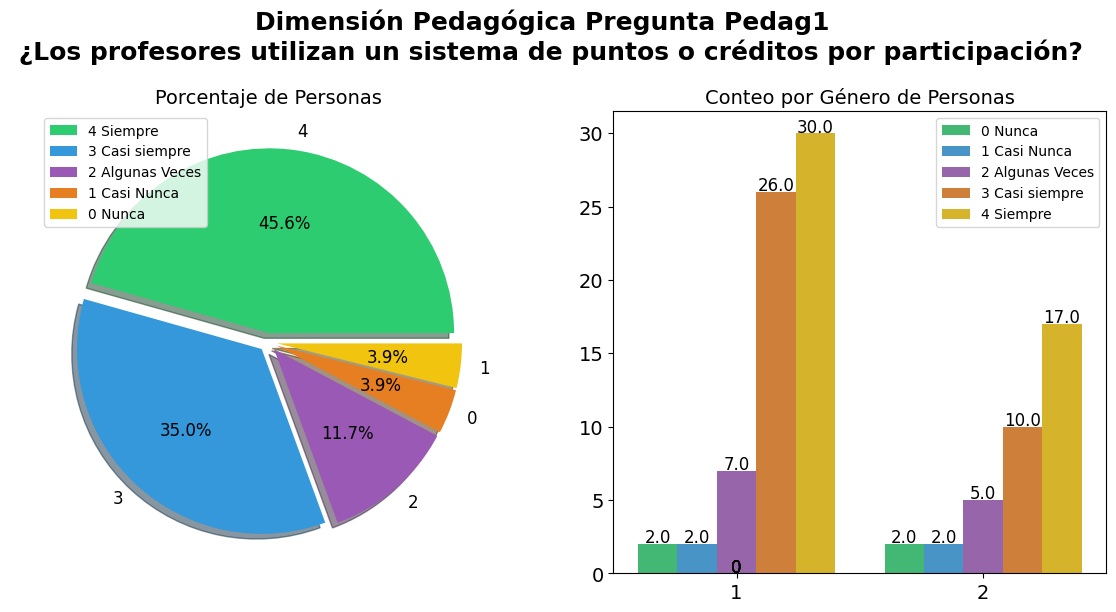

In [13]:
drawChart('Pedagógica','DemoGenero','Pedag1', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05, 0.05, 0.05,0.05), 
          '¿Los profesores utilizan un sistema de puntos o créditos por participación?', sizes=[14,6])
#0 Nunca 
#1 Casi nunca 
#2 Algunas veces  
#3 Casi siempre 
#4 Siempre 
#el 45,6% de los encuestados aducen que los docentes si utilizan un sistema de puntos o créditos por participación en la clase espejo.
#Un 8% aduce que nunca se utiliza dicho sistema.

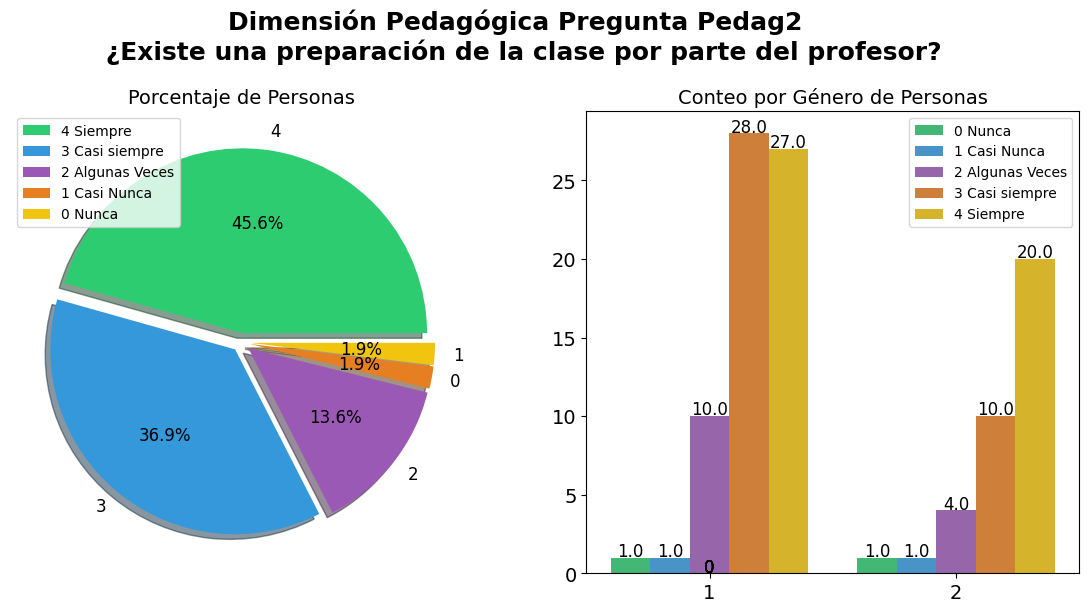

In [14]:
drawChart('Pedagógica','DemoGenero','Pedag2', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Existe una preparación de la clase por parte del profesor?', sizes=[14,6])
          #el 45,6% de los encuestados aducen que los docentes casi siempre preparan la clase espejo a impartir. Un 4% reconoce que no existe preparación 
          #para dicho encuentro.

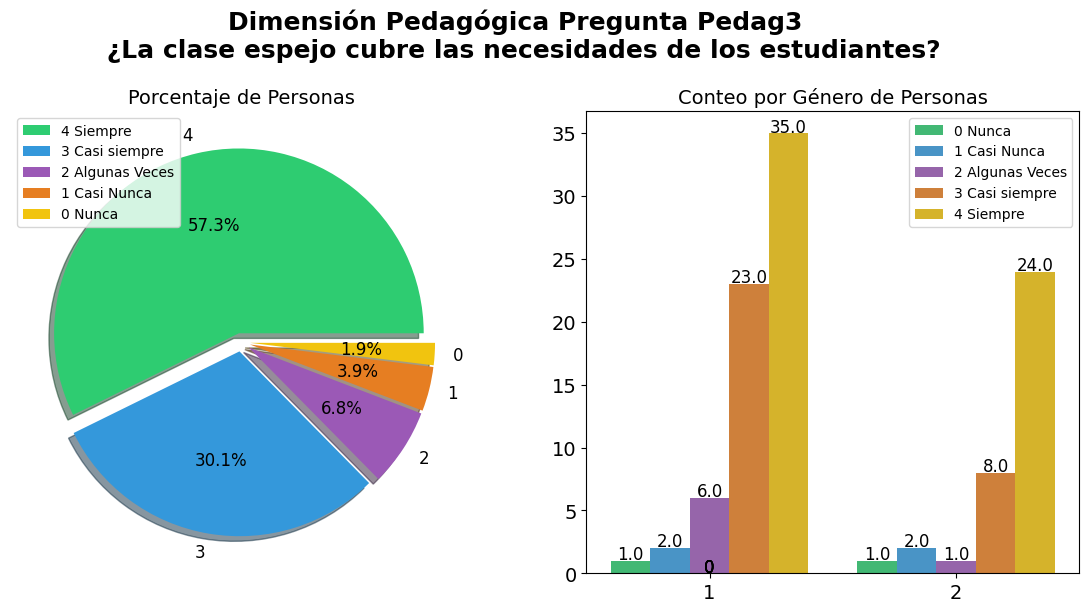

In [15]:
drawChart('Pedagógica','DemoGenero','Pedag3', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La clase espejo cubre las necesidades de los estudiantes?', sizes=[14,6])
          #El 57.3% de las personas aducen que casi siempre se cubre con las necesidades de los estudiantes en la clase espejo.

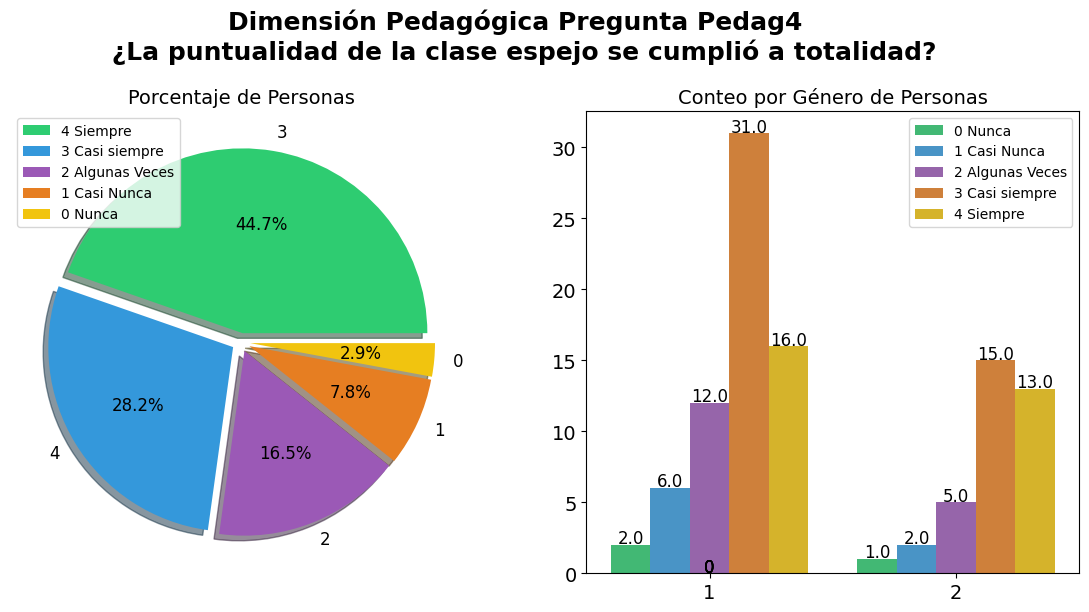

In [16]:
drawChart('Pedagógica','DemoGenero','Pedag4', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La puntualidad de la clase espejo se cumplió a totalidad?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que casi siempre se cumple con el horario de la clase espejo. Un 11% aduce que no se cumple con los horarios
#pactados

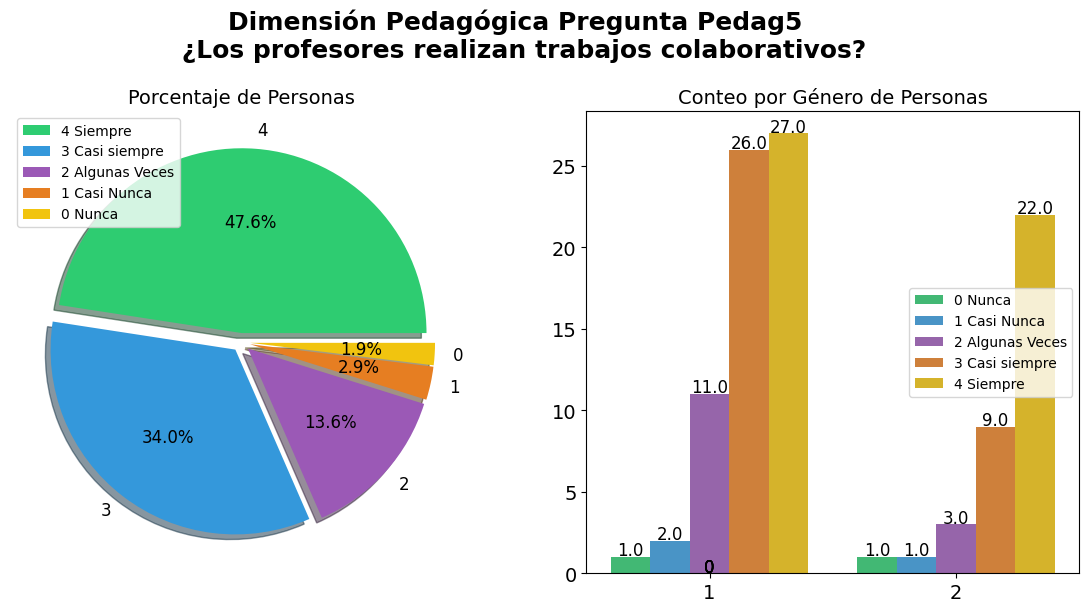

In [17]:
drawChart('Pedagógica','DemoGenero','Pedag5', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores realizan trabajos colaborativos?', sizes=[14,6])
#Algunas veces los profesores realizan trabajos colaborativos durante la clase espejo con un 13,6% de los estudiantes lo afirman

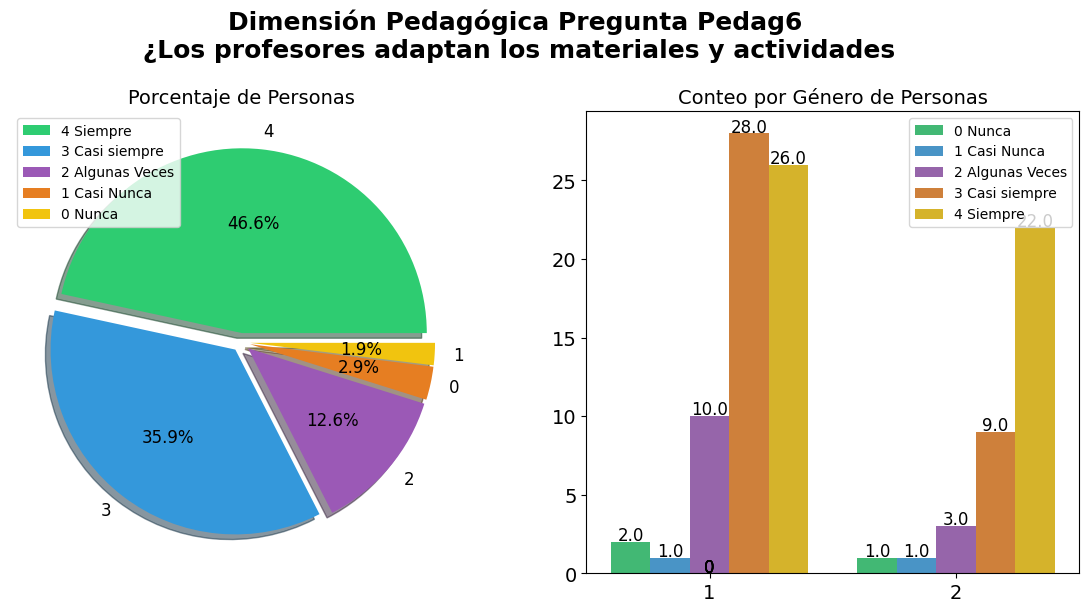

In [18]:
drawChart('Pedagógica','DemoGenero','Pedag6', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores adaptan los materiales y actividades ', sizes=[14,6])
# 

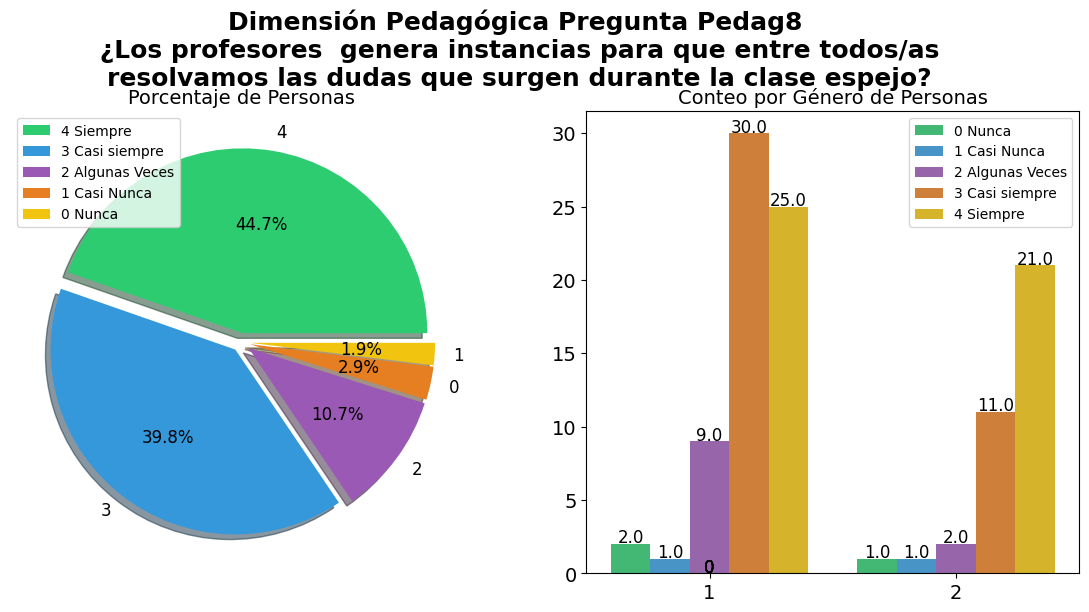

In [19]:
drawChart('Pedagógica','DemoGenero','Pedag8', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  genera instancias para que entre todos/as \nresolvamos las dudas que surgen durante la clase espejo?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que siempre los profesores generan espacios para aclarar dudas.

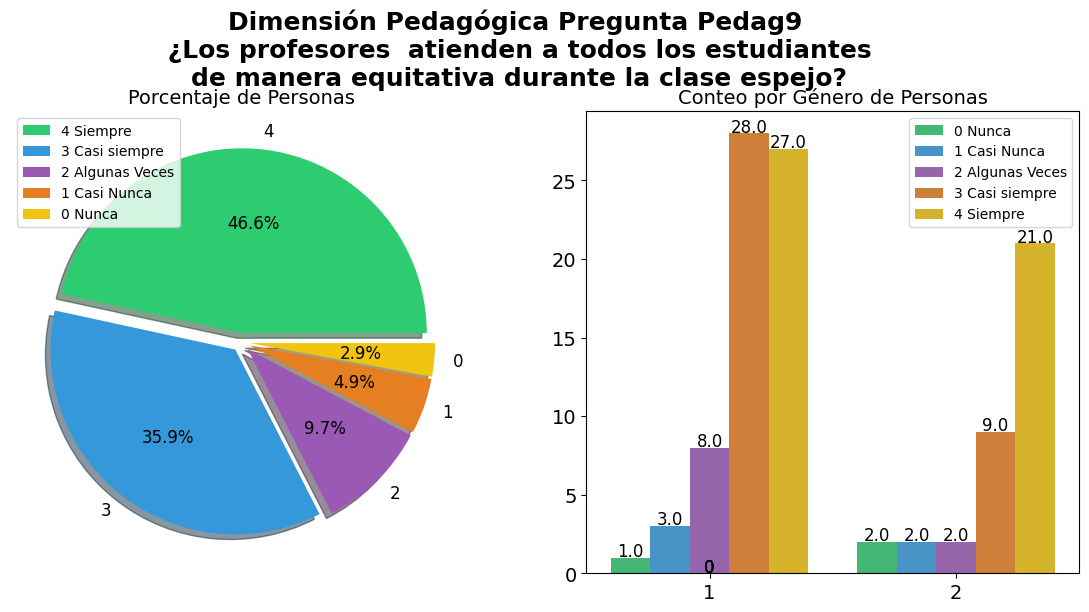

In [20]:
drawChart('Pedagógica','DemoGenero','Pedag9', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  atienden a todos los estudiantes \nde manera equitativa durante la clase espejo?', sizes=[14,6])
          #9,7% de los estudiantes evidencian que no son atendidas sus dudas en las clases espejo.

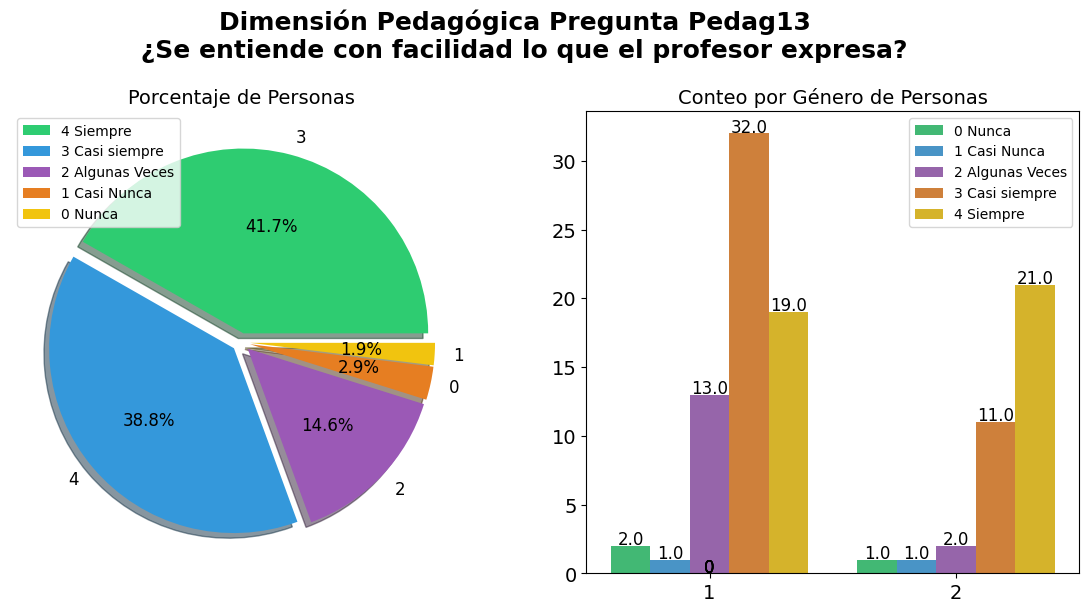

In [21]:
drawChart('Pedagógica','DemoGenero','Pedag13', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Se entiende con facilidad lo que el profesor expresa?', sizes=[14,6])
    #41,7% aducen que casi siempre se entiende lo que el profesor expresa.un 18% reconoce que no se entiende lo explicado por el docente.

In [22]:
datos['LogroAca'].value_counts()

LogroAca
Se cumple Aceptable     70
Se cumple Alto Grado    26
Se cumple Bajo Grado     7
Name: count, dtype: int64

### Paso 4: Normalización, Test de Normalidad, Correlación de Pearson y Alpha de Cronbach

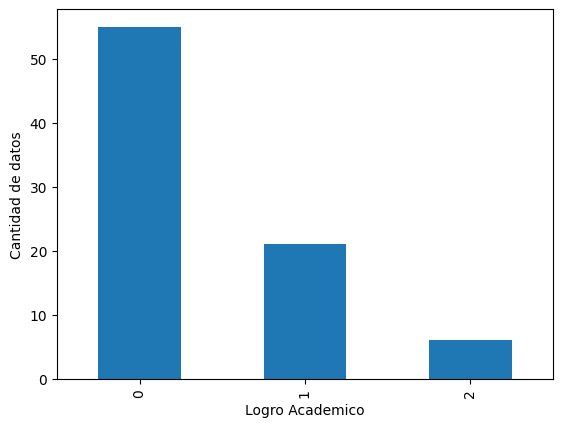

In [23]:

#!pip install scikit-plot
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
datos['LogroAca']= label_encoder.fit_transform(datos['LogroAca']) 

## Balance de carga de variables
features = []
for feature in datos.columns:
    if feature != 'LogroAca':
        features.append(feature)
X = datos[features]
y = datos['LogroAca']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Academico')
plt.show()

## Balanceo de datos con RESAMPLE Clase MAYORITARIA

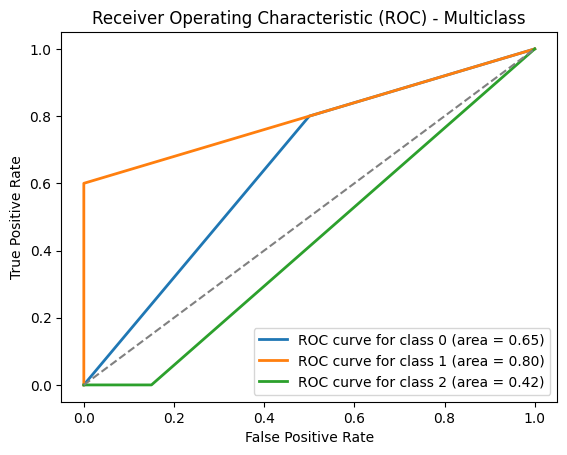

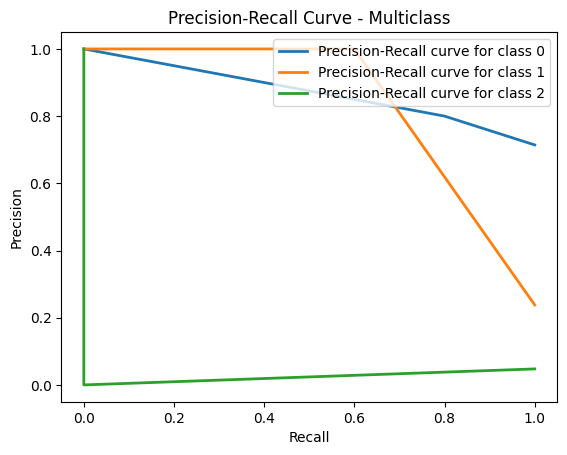

In [24]:
#!pip install scikit-plot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve

from sklearn.preprocessing import label_binarize
import numpy as np

# Binariza las etiquetas
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Entrena el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

# Graficar curva ROC y Precision-Recall para cada clase
for i in range(n_classes):
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Graficar curva Precision-Recall para cada clase
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve for class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multiclass')
plt.legend(loc="upper right")
plt.show()

In [25]:
#!pip install -U imbalanced-learn
from sklearn.utils import resample
import pandas as pd

def balance_data(X_train, y_train, strategy='oversample', reference_counts=None):
    """
    Balancea los datos de entrenamiento utilizando resample para oversampling o undersampling.
    
    Args:
    X_train (pd.DataFrame o np.ndarray): Conjunto de características de entrenamiento.
    y_train (pd.Series o np.ndarray): Conjunto de etiquetas de entrenamiento.
    strategy (str): Método de balanceo a utilizar ('oversample' o 'undersample').
    reference_counts (dict, opcional): Número de muestras de referencia para cada categoría. Debe ser un diccionario
                                        con claves como 0, 1 y 2, y valores correspondientes al número de muestras deseadas.
    
    Returns:
    X_res (pd.DataFrame), y_res (pd.Series): Conjuntos de datos balanceados en formato DataFrame y Series.
    """
    if strategy not in ['oversample', 'undersample']:
        raise ValueError("El método debe ser uno de los siguientes: 'oversample' o 'undersample'")
    
    if reference_counts is None:
        raise ValueError("Debe proporcionar un diccionario 'reference_counts' con el número de muestras deseadas para cada categoría")
    
    # Convertir X_train y y_train a DataFrame y Series si no lo son
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    
    # Crear listas para almacenar los datos balanceados
    X_resampled = []
    y_resampled = []
    
    # Aplicar oversampling o undersampling según la estrategia especificada
    for category, count in reference_counts.items():
        X_category = X_train[y_train == category]
        y_category = y_train[y_train == category]
        
        if strategy == 'oversample':
            X_resampled_category, y_resampled_category = resample(X_category, 
                                                                  y_category,
                                                                  replace=True,     # muestra con reemplazo
                                                                  n_samples=count,  # número de muestras deseadas
                                                                  random_state=42)  # para reproducibilidad
        
        elif strategy == 'undersample':
            X_resampled_category, y_resampled_category = resample(X_category, 
                                                                  y_category,
                                                                  replace=False,    # muestra sin reemplazo
                                                                  n_samples=count,  # número de muestras deseadas
                                                                  random_state=42)  # para reproducibilidad
        
        X_resampled.append(X_resampled_category)
        y_resampled.append(y_resampled_category)
    
    # Concatenar todas las muestras resampleadas
    X_res = pd.concat(X_resampled)
    y_res = pd.concat(y_resampled)
    
    return X_res, y_res


# Balancear los datos usando oversampling con referencia a las siguientes cantidades por categoría
reference_counts = {0: 70, 1: 70, 2: 70}
X_res_train_over, y_res_train_over = balance_data(X_train, y_train, strategy='oversample', reference_counts=reference_counts)
print("Oversampling results:\n", y_res_train_over.value_counts())

reference_counts_d = {0: 15, 1: 15, 2: 15}
X_res_test_over, y_res_test_over = balance_data(X_test, y_test, strategy='oversample', reference_counts=reference_counts_d)
print("Oversampling results:\n", y_res_test_over.value_counts())

# Balancear los datos usando undersampling con referencia a las siguientes cantidades por categoría
#reference_counts = {0: 7, 1: 7, 2: 7}
#X_res_under, y_res_under = balance_data(X_train, y_train, strategy='undersample', reference_counts=reference_counts)
#print("Undersampling results:\n", y_res_under.value_counts())



Oversampling results:
 LogroAca
0    70
1    70
2    70
Name: count, dtype: int64
Oversampling results:
 LogroAca
0    15
1    15
2    15
Name: count, dtype: int64


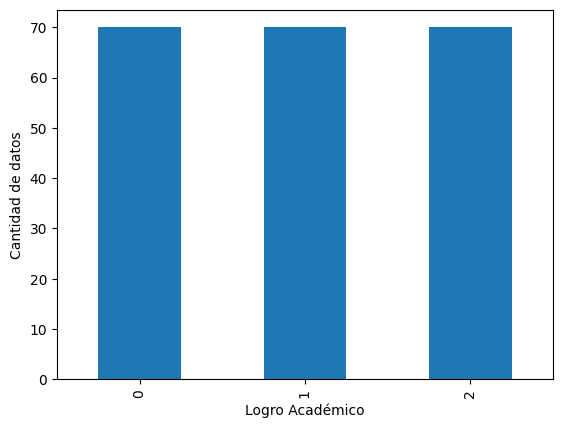

In [26]:
count = y_res_train_over.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Académico')
plt.show()

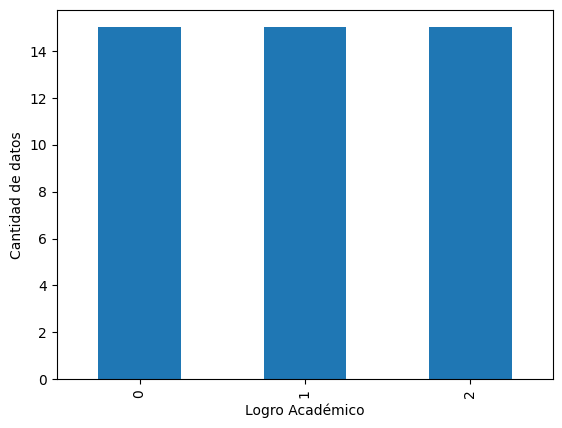

In [27]:
count = y_res_test_over.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Académico')
plt.show()

In [28]:
from sklearn.utils import class_weight
clases = np.unique(y_res_train_over)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=clases, y=y_res_train_over)
weights = dict(zip(clases,cw))

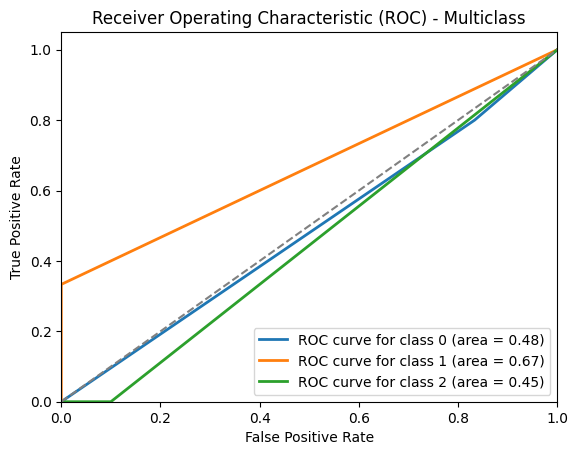

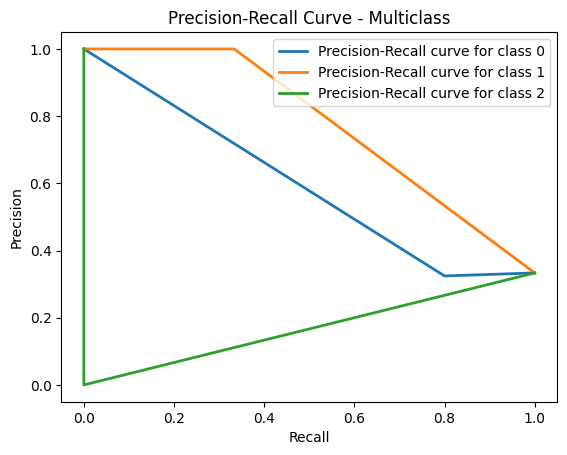

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar las etiquetas en formato One-vs-Rest (OvR)
y_res_test_binarized = label_binarize(y_res_test_over, classes=np.unique(y_res_test_over))
n_classes = y_res_test_binarized.shape[1]

# Entrenar el modelo
model = DecisionTreeClassifier(class_weight=weights)
model.fit(X_res_train_over, y_res_train_over)

# Obtener las probabilidades de predicción
y_score = model.predict_proba(X_res_test_over)

# Graficar la curva ROC para cada clase
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_res_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Graficar la curva de Precisión-Recall para cada clase
plt.figure()
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_res_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve for class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multiclass')
plt.legend(loc="upper right")
plt.show()

### Balanceo de datos con clase mayoritaria SVMSMOTE

In [31]:
from imblearn.over_sampling import SVMSMOTE
import pandas as pd
import numpy as np

def svmsmote_oversample(X_train, y_train, reference_counts):
    """
    Balancea los datos de entrenamiento utilizando SVMSMOTE para oversampling.

    Args:
    X_train (pd.DataFrame o np.ndarray): Conjunto de características de entrenamiento.
    y_train (pd.Series o np.ndarray): Conjunto de etiquetas de entrenamiento.
    reference_counts (dict): Número de muestras de referencia para cada categoría. Debe ser un diccionario
                           con claves como 0, 1 y 2, y valores correspondientes al número de muestras deseadas.

    Returns:
    X_res (pd.DataFrame), y_res (pd.Series): Conjuntos de datos balanceados en formato DataFrame y Series.
    """
    # Convertir X_train y y_train a DataFrame y Series si no lo son
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)

    # Definir la estrategia de SVMSMOTE basada en los valores de reference_counts
    svmsmote = SVMSMOTE(
        sampling_strategy=reference_counts,
        random_state=42,
        k_neighbors=5,
        m_neighbors=10,
        svm_estimator=None,  # Usa el estimador SVM por defecto
        out_step=0.5  # Control de la generación de muestras sintéticas
    )

    # Aplicar SVMSMOTE para generar el oversampling
    X_res, y_res = svmsmote.fit_resample(X_train, y_train)

    # Convertir X_res y y_res a DataFrame y Series si no lo son
    if not isinstance(X_res, pd.DataFrame):
        X_res = pd.DataFrame(X_res, columns=X_train.columns)
    if not isinstance(y_res, pd.Series):
        y_res = pd.Series(y_res, name='target')

    return X_res, y_res

# Balancear los datos usando oversampling con referencia a las siguientes cantidades por categoría
reference_counts = {0: 70, 1: 70, 2: 70}
X_train_res_svmsmote, y_train_res_svmsmote = svmsmote_oversample(X_train, y_train, reference_counts)
print("Oversampling results:\n", y_train_res_svmsmote.value_counts())


Oversampling results:
 LogroAca
0    70
1    70
2    42
Name: count, dtype: int64


In [32]:
from sklearn.utils import class_weight
clases = np.unique(y_train_res_svmsmote)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=clases, y=y_train_res_svmsmote)
weights = dict(zip(clases,cw))

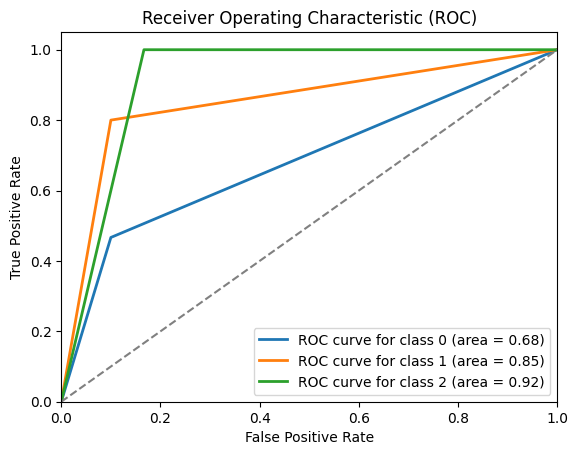

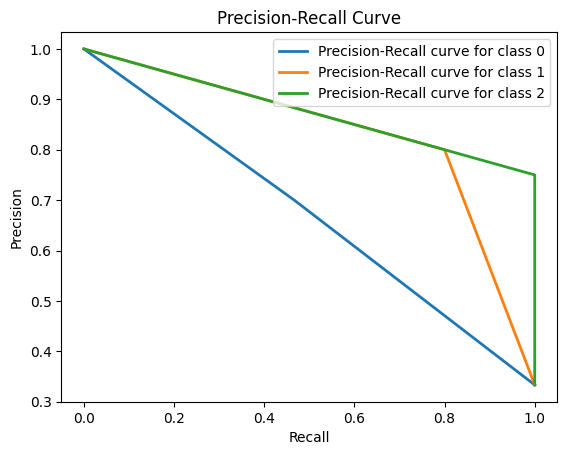

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Entrenar el modelo
model = DecisionTreeClassifier(class_weight=weights)
model.fit(X_train_res_svmsmote, y_train_res_svmsmote)

# Obtener las probabilidades de predicción
y_score = model.predict_proba(X_res_test_over)

# Verificar si el problema es multiclase
n_classes = len(np.unique(y_res_test_over))

if n_classes > 2:
    # Para problemas multiclase, binarizamos las etiquetas para aplicar One-vs-Rest
    y_res_test_binarized = label_binarize(y_res_test_over, classes=np.unique(y_res_test_over))
else:
    y_res_test_binarized = y_res_test_over

# Graficar la curva ROC para cada clase (en caso de multiclase)
plt.figure()
for i in range(n_classes):
    if n_classes > 2:
        fpr, tpr, _ = roc_curve(y_res_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')
    else:
        fpr, tpr, _ = roc_curve(y_res_test_binarized, y_score[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        break

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Graficar la curva de Precisión-Recall para cada clase (en caso de multiclase)
plt.figure()
for i in range(n_classes):
    if n_classes > 2:
        precision, recall, _ = precision_recall_curve(y_res_test_binarized[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve for class {i}')
    else:
        precision, recall, _ = precision_recall_curve(y_res_test_binarized, y_score[:, 1])
        plt.plot(recall, precision, color='purple', lw=2, label='Precision-Recall curve')
        break

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


## Resumen
mejoría de SMOTE por encima de imbalanced learn, pero faltán escoger las mejores características y crear los modelos.

    SMOTE (Synthetic Minority Over-sampling Technique):
        Pros:
            Genera muestras sintéticas que se asemejan a las muestras reales, lo que puede mejorar la calidad de los datos.
            Útil para conjuntos de datos desbalanceados donde las clases minoritarias están subrepresentadas.
        Contras:
            Puede generar muestras sintéticas que no reflejan fielmente la distribución de las clases minoritarias reales, lo que puede llevar a un sobreajuste.
            Requiere ajustar parámetros como k_neighbors, lo que puede ser un proceso de prueba y error.

    resample (de la librería sklearn.utils):
        Pros:
            Es más simple de usar y no requiere ajuste de parámetros.
            Puede ser más adecuado para conjuntos de datos pequeños o cuando se necesita un control más fino sobre el proceso de balanceo.
        Contras:
            No genera muestras sintéticas, lo que puede resultar en una pérdida de información si las clases minoritarias son muy escasas.

En general, si tienes un conjunto de datos desbalanceado y necesitas generar más muestras para las clases minoritarias, SMOTE podría ser una buena opción. Sin embargo, si prefieres una solución más simple o si tus clases minoritarias ya tienen suficientes muestras representativas, resample podría ser más adecuado.

SMOTE: X_train_res_Smote, y_train_res_Smote
RESAMPLE: X_res_train_over, y_res_train_over
TEST: X_res_test_over, y_res_test_over


#### Normalizar datos trabajados con SMOTE

In [35]:
datosVie = data
dataLista = X_train_res_svmsmote

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_train_norm_SVMSMOTE = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [36]:
datosVie = data
dataLista = X_res_test_over

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_test_norm_SVMSMOTE = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [37]:
#Shapiro Wilk 
from scipy.stats import shapiro
valoresP=[]
concepto=[]
variable=[]

def iterarCol(df):
    for column in df:
        stat, p = shapiro(df[column].values)
        valoresP.append(p)
        variable.append(column)
        if (p < 0.05):
            #print(f'No es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('No es una variable Normal')
        else:
            #print(f'Es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('Es una variable Normal')
       
iterarCol(X_train_norm_SVMSMOTE)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

Variable     Valores P                   Concepto
0     DemoEstrato  3.446375e-13  No es una variable Normal
1        DemoEdad  5.241027e-16  No es una variable Normal
2      DemoGenero  1.700232e-18  No es una variable Normal
3    DemoSemestre  3.646122e-14  No es una variable Normal
4      DemoPadres  1.634377e-19  No es una variable Normal
5   DemoLaborando  4.219176e-23  No es una variable Normal
6    DemoEsMental  3.188609e-20  No es una variable Normal
7    DemoEsFisico  3.931621e-20  No es una variable Normal
8     DemoTrabajo  1.104002e-19  No es una variable Normal
9          Pedag1  3.211377e-11  No es una variable Normal
10         Pedag2  1.812490e-14  No es una variable Normal
11         Pedag3  6.202983e-15  No es una variable Normal
12         Pedag4  2.281191e-10  No es una variable Normal
13         Pedag5  1.598035e-14  No es una variable Normal
14         Pedag6  4.306980e-15  No es una variable Normal
15         Pedag7  2.450214e-11  No es una variable Normal
16         Pedag8  2.357757e-14  No es una variable Normal
17         Pedag9  3.963383e-14  No es una variable Normal
18        Pedag10  1.828007e-14  No es una variable Normal
19        Pedag11  7.319409e-14  No es una variable Normal
20        Pedag12  1.346641e-12  No es una variable Normal
21        Pedag13  1.840789e-13  No es una variable Normal
22        Pedag14  8.424167e-13  No es una variable Normal
23        Pedag15  1.205229e-14  No es una variable Normal
24        Pedag16  2.637332e-15  No es una variable Normal

In [38]:
iterarCol(X_test_norm_SVMSMOTE)

df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

Variable     Valores P                   Concepto
0     DemoEstrato  3.446375e-13  No es una variable Normal
1        DemoEdad  5.241027e-16  No es una variable Normal
2      DemoGenero  1.700232e-18  No es una variable Normal
3    DemoSemestre  3.646122e-14  No es una variable Normal
4      DemoPadres  1.634377e-19  No es una variable Normal
5   DemoLaborando  4.219176e-23  No es una variable Normal
6    DemoEsMental  3.188609e-20  No es una variable Normal
7    DemoEsFisico  3.931621e-20  No es una variable Normal
8     DemoTrabajo  1.104002e-19  No es una variable Normal
9          Pedag1  3.211377e-11  No es una variable Normal
10         Pedag2  1.812490e-14  No es una variable Normal
11         Pedag3  6.202983e-15  No es una variable Normal
12         Pedag4  2.281191e-10  No es una variable Normal
13         Pedag5  1.598035e-14  No es una variable Normal
14         Pedag6  4.306980e-15  No es una variable Normal
15         Pedag7  2.450214e-11  No es una variable Normal
16         Pedag8  2.357757e-14  No es una variable Normal
17         Pedag9  3.963383e-14  No es una variable Normal
18        Pedag10  1.828007e-14  No es una variable Normal
19        Pedag11  7.319409e-14  No es una variable Normal
20        Pedag12  1.346641e-12  No es una variable Normal
21        Pedag13  1.840789e-13  No es una variable Normal
22        Pedag14  8.424167e-13  No es una variable Normal
23        Pedag15  1.205229e-14  No es una variable Normal
24        Pedag16  2.637332e-15  No es una variable Normal
25    DemoEstrato  2.541344e-07  No es una variable Normal
26       DemoEdad  4.738506e-09  No es una variable Normal
27     DemoGenero  4.322573e-10  No es una variable Normal
28   DemoSemestre  9.592923e-07  No es una variable Normal
29     DemoPadres  1.583706e-09  No es una variable Normal
30  DemoLaborando  2.249768e-09  No es una variable Normal
31   DemoEsMental  7.057170e-09  No es una variable Normal
32   DemoEsFisico  1.616202e-08  No es una variable Normal
33    DemoTrabajo  3.553241e-09  No es una variable Normal
34         Pedag1  2.286911e-09  No es una variable Normal
35         Pedag2  1.823539e-05  No es una variable Normal
36         Pedag3  8.030743e-08  No es una variable Normal
37         Pedag4  3.811314e-06  No es una variable Normal
38         Pedag5  5.094644e-06  No es una variable Normal
39         Pedag6  1.763759e-08  No es una variable Normal
40         Pedag7  5.589188e-07  No es una variable Normal
41         Pedag8  1.084515e-10  No es una variable Normal
42         Pedag9  9.710358e-09  No es una variable Normal
43        Pedag10  1.922745e-07  No es una variable Normal
44        Pedag11  1.763759e-08  No es una variable Normal
45        Pedag12  4.174338e-07  No es una variable Normal
46        Pedag13  4.929528e-08  No es una variable Normal
47        Pedag14  1.494289e-06  No es una variable Normal
48        Pedag15  4.240353e-10  No es una variable Normal
49        Pedag16  1.531093e-07  No es una variable Normal

In [39]:

corr_matrix = X_train_norm_SVMSMOTE.corr(method='spearman')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

variable_1     variable_2         r     abs_r
181   DemoEsFisico   DemoEsMental  0.985534  0.985534
157   DemoEsMental   DemoEsFisico  0.985534  0.985534
158   DemoEsMental    DemoTrabajo  0.973526  0.973526
206    DemoTrabajo   DemoEsMental  0.973526  0.973526
183   DemoEsFisico    DemoTrabajo  0.971002  0.971002
207    DemoTrabajo   DemoEsFisico  0.971002  0.971002
623        Pedag16        Pedag15  0.893823  0.893823
599        Pedag15        Pedag16  0.893823  0.893823
521        Pedag12        Pedag13  0.845648  0.845648
545        Pedag13        Pedag12  0.845648  0.845648
346         Pedag5        Pedag13  0.845611  0.845611
538        Pedag13         Pedag5  0.845611  0.845611
547        Pedag13        Pedag14  0.832600  0.832600
571        Pedag14        Pedag13  0.832600  0.832600
469        Pedag10        Pedag11  0.830033  0.830033
493        Pedag11        Pedag10  0.830033  0.830033
387         Pedag7         Pedag4  0.829585  0.829585
315         Pedag4         Pedag7  0.829585  0.829585
155   DemoEsMental  DemoLaborando  0.828062  0.828062
131  DemoLaborando   DemoEsMental  0.828062  0.828062
132  DemoLaborando   DemoEsFisico  0.822002  0.822002
180   DemoEsFisico  DemoLaborando  0.822002  0.822002
373         Pedag6        Pedag15  0.815808  0.815808
589        Pedag15         Pedag6  0.815808  0.815808
561        Pedag14         Pedag3  0.814066  0.814066
297         Pedag3        Pedag14  0.814066  0.814066
596        Pedag15        Pedag13  0.812492  0.812492
548        Pedag13        Pedag15  0.812492  0.812492
371         Pedag6        Pedag13  0.810981  0.810981
539        Pedag13         Pedag6  0.810981  0.810981

Text(0.5, 1.0, 'Mapa de Correlación')

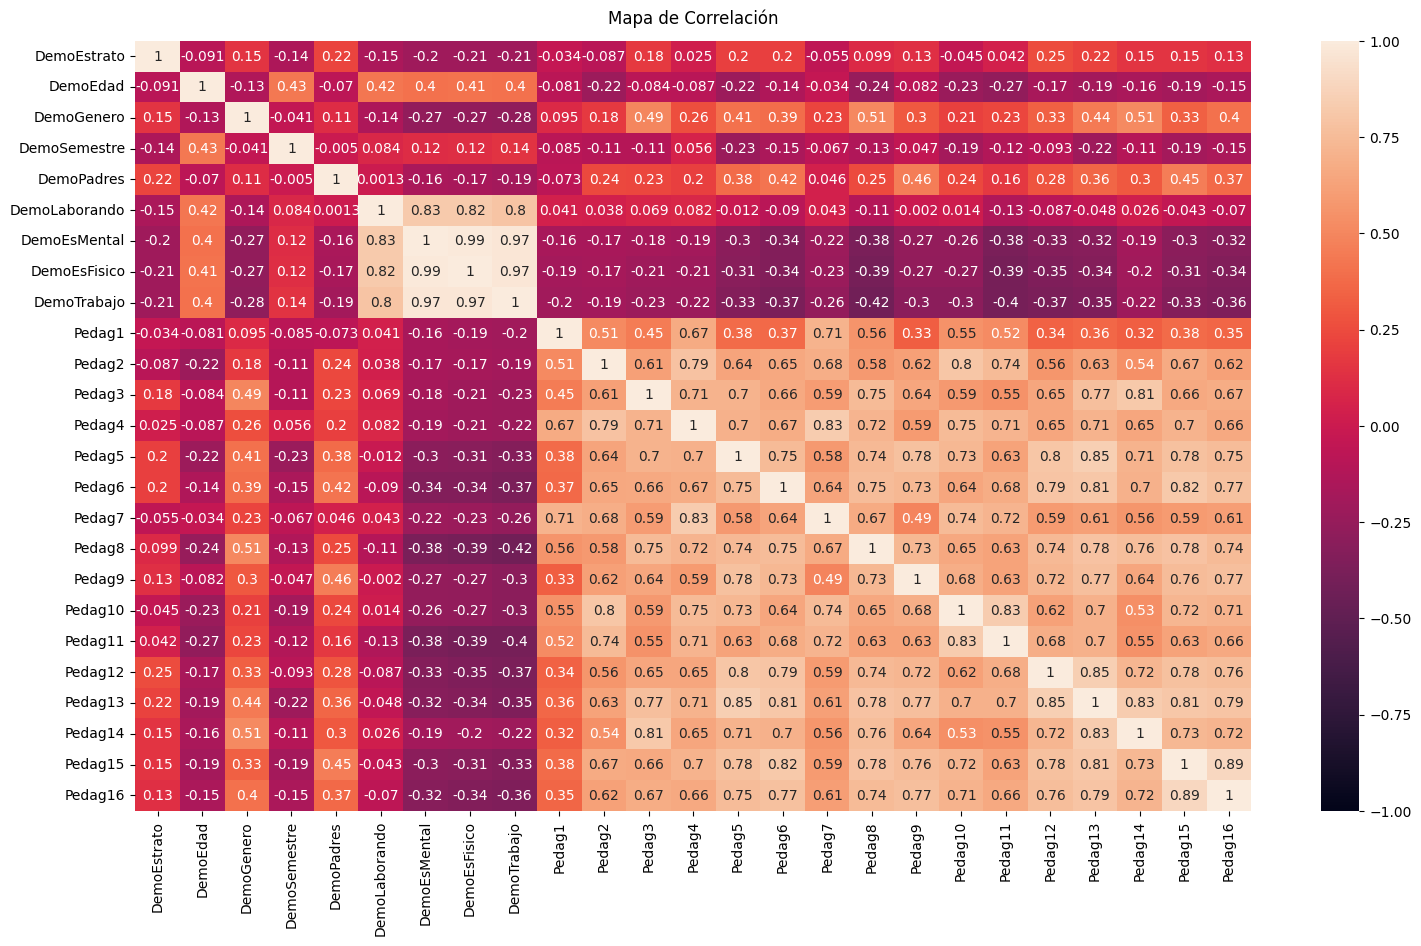

In [40]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [41]:
corr_matrix = X_test_norm_SVMSMOTE.corr(method='spearman')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

variable_1     variable_2         r     abs_r
489        Pedag11         Pedag6  1.000000  1.000000
369         Pedag6        Pedag11  1.000000  1.000000
158   DemoEsMental    DemoTrabajo  1.000000  1.000000
206    DemoTrabajo   DemoEsMental  1.000000  1.000000
183   DemoEsFisico    DemoTrabajo  0.981964  0.981964
157   DemoEsMental   DemoEsFisico  0.981964  0.981964
181   DemoEsFisico   DemoEsMental  0.981964  0.981964
207    DemoTrabajo   DemoEsFisico  0.981964  0.981964
133  DemoLaborando    DemoTrabajo  0.978076  0.978076
205    DemoTrabajo  DemoLaborando  0.978076  0.978076
155   DemoEsMental  DemoLaborando  0.978076  0.978076
131  DemoLaborando   DemoEsMental  0.978076  0.978076
132  DemoLaborando   DemoEsFisico  0.967843  0.967843
180   DemoEsFisico  DemoLaborando  0.967843  0.967843
335         Pedag5         Pedag2  0.929855  0.929855
263         Pedag2         Pedag5  0.929855  0.929855
262         Pedag2         Pedag4  0.923226  0.923226
310         Pedag4         Pedag2  0.923226  0.923226
521        Pedag12        Pedag13  0.884931  0.884931
545        Pedag13        Pedag12  0.884931  0.884931
386         Pedag7         Pedag3  0.851492  0.851492
290         Pedag3         Pedag7  0.851492  0.851492
622        Pedag16        Pedag14  0.829983  0.829983
574        Pedag14        Pedag16  0.829983  0.829983
371         Pedag6        Pedag13  0.828154  0.828154
539        Pedag13         Pedag6  0.828154  0.828154
544        Pedag13        Pedag11  0.828154  0.828154
496        Pedag11        Pedag13  0.828154  0.828154
337         Pedag5         Pedag4  0.825281  0.825281
313         Pedag4         Pedag5  0.825281  0.825281

Text(0.5, 1.0, 'Mapa de Correlación')

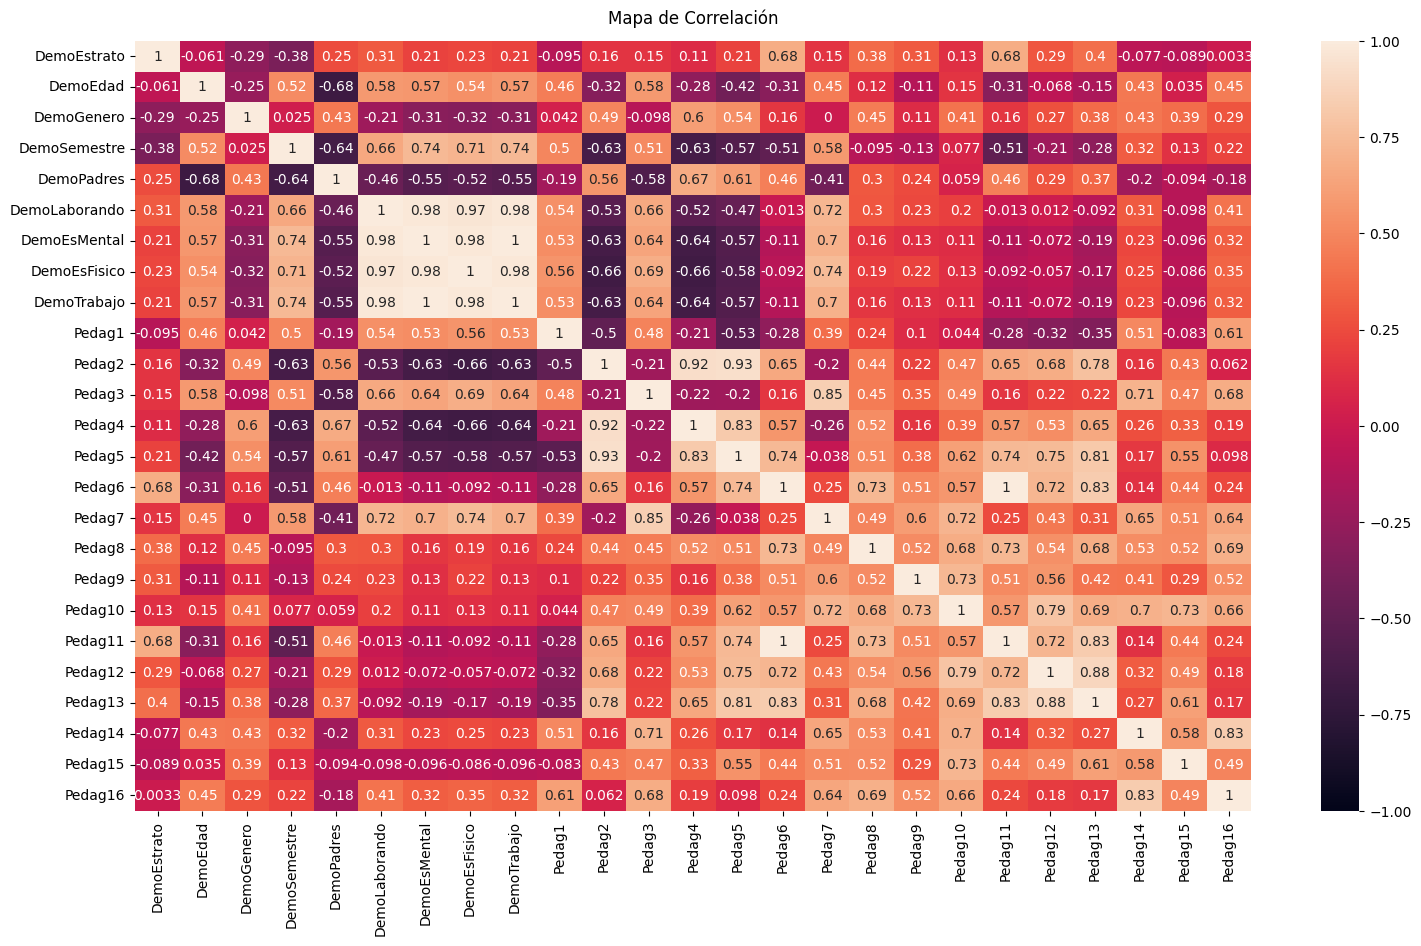

In [42]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [43]:
#!pip install pingouin
import pingouin as pg

pg.cronbach_alpha(data=X_train_norm_SVMSMOTE)

datosOrg = X_train_norm_SVMSMOTE[list(X_train_norm_SVMSMOTE.columns)]

pg.cronbach_alpha(data=datosOrg)
##Instrumento super confiable con 0.89

(np.float64(0.8957927381858652), array([0.873, 0.916]))

#### Selección de Características

In [44]:
selected_features=['DemoEstrato',
 'DemoEdad',
 'DemoGenero',
 'DemoSemestre',
 'DemoPadres',
 'DemoEsMental',
 'Pedag1',
 'Pedag2',
 'Pedag3',
 'Pedag6',
 'Pedag12',
 'Pedag14',
 'Pedag16']

In [45]:
##Filtrar por selección de características con base en la varianza
X_train_norm_SVMSMOTE_ori = X_train_norm_SVMSMOTE.copy()
X_test_norm_SVMSMOTE_ori = X_test_norm_SVMSMOTE.copy()

X_train_norm_SVMSMOTE = X_train_norm_SVMSMOTE[selected_features]
X_test_norm_SVMSMOTE = X_test_norm_SVMSMOTE[selected_features]

### Paso 5: Modelos Clasificacion sin y con Hiperparámetros, balanceado y sin mejores características

##### 1. Linear Discriminat Analysis: 80% train y 20% test

In [46]:
y_train_res_svmsmote.value_counts()

LogroAca
0    70
1    70
2    42
Name: count, dtype: int64

Fold 1/50 - Accuracy: 0.8378
Fold 2/50 - Accuracy: 0.7568
Fold 3/50 - Accuracy: 0.6944
Fold 4/50 - Accuracy: 0.8056
Fold 5/50 - Accuracy: 0.8611
Fold 6/50 - Accuracy: 0.6757
Fold 7/50 - Accuracy: 0.8378
Fold 8/50 - Accuracy: 0.8056
Fold 9/50 - Accuracy: 0.8333
Fold 10/50 - Accuracy: 0.8611
Fold 11/50 - Accuracy: 0.7297
Fold 12/50 - Accuracy: 0.9189
Fold 13/50 - Accuracy: 0.8611
Fold 14/50 - Accuracy: 0.7778
Fold 15/50 - Accuracy: 0.7778
Fold 16/50 - Accuracy: 0.8378
Fold 17/50 - Accuracy: 0.8919
Fold 18/50 - Accuracy: 0.8333
Fold 19/50 - Accuracy: 0.7222
Fold 20/50 - Accuracy: 0.8889
Fold 21/50 - Accuracy: 0.8649
Fold 22/50 - Accuracy: 0.8108
Fold 23/50 - Accuracy: 0.7500
Fold 24/50 - Accuracy: 0.8333
Fold 25/50 - Accuracy: 0.8889
Fold 26/50 - Accuracy: 0.8378
Fold 27/50 - Accuracy: 0.8378
Fold 28/50 - Accuracy: 0.8611
Fold 29/50 - Accuracy: 0.7500
Fold 30/50 - Accuracy: 0.7500
Fold 31/50 - Accuracy: 0.8378
Fold 32/50 - Accuracy: 0.8378
Fold 33/50 - Accuracy: 0.6944
Fold 34/50 - Accura

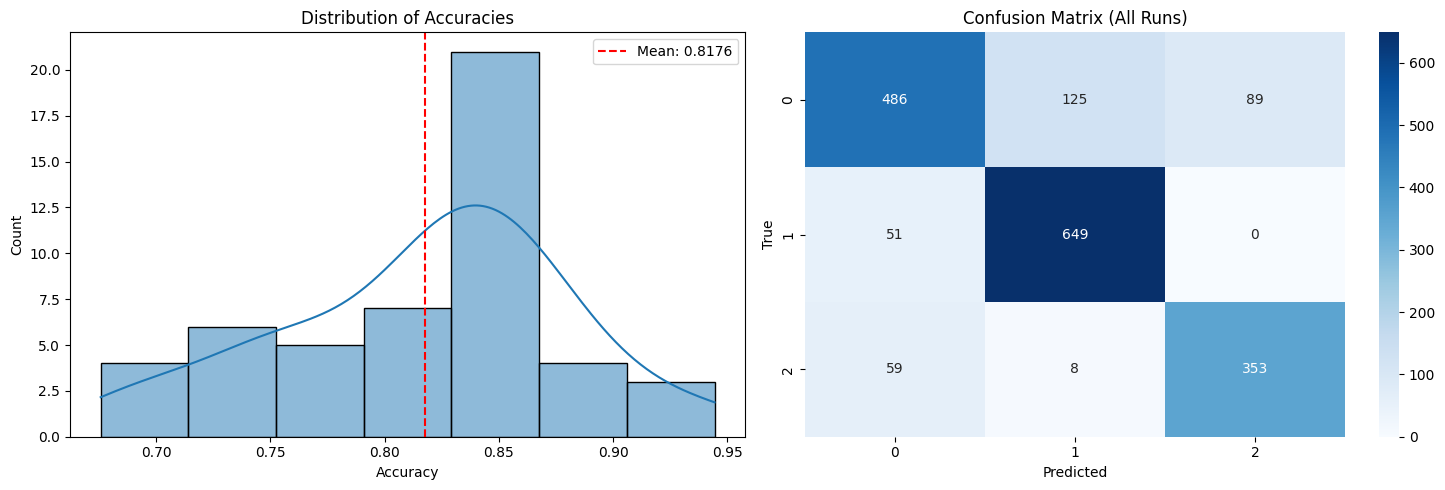


Resumen de Resultados:
Accuracy Media: 0.8176
Desviación Estándar: 0.0630
Intervalo de Confianza (95%): [0.6944, 0.9387]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       700
           1       0.83      0.93      0.88       700
           2       0.80      0.84      0.82       420

    accuracy                           0.82      1820
   macro avg       0.81      0.82      0.81      1820
weighted avg       0.82      0.82      0.81      1820


Resultados guardados en 'lda_multiple_runs_result_SVMSMOTE.csv'


In [47]:
import numpy as np  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.model_selection import RepeatedKFold  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

def train_evaluate_lda_multiple_times(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo LDA múltiples veces usando validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(  
        n_splits=n_splits,  
        n_repeats=n_repeats,  
        random_state=42  
    )  

    # Listas para almacenar resultados  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  

    # Para cada fold en la validación cruzada  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        # Dividir los datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear y entrenar el modelo  
        lda = LinearDiscriminantAnalysis()  
        lda.fit(X_train, y_train)  

        # Predecir  
        y_pred = lda.predict(X_test)  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  

        # Imprimir progreso  
        print(f'Fold {fold+1}/{n_splits*n_repeats} - Accuracy: {accuracy:.4f}')  

    return accuracies, all_predictions, all_true_values  

def plot_results(accuracies, all_predictions, all_true_values):  
    """  
    Visualiza los resultados de las múltiples ejecuciones  
    """  
    # Crear una figura con subplots  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  

    # 1. Distribución de accuracies  
    sns.histplot(accuracies, kde=True, ax=ax1)  
    ax1.axvline(np.mean(accuracies), color='r', linestyle='--',   
                label=f'Mean: {np.mean(accuracies):.4f}')  
    ax1.set_title('Distribution of Accuracies')  
    ax1.set_xlabel('Accuracy')  
    ax1.set_ylabel('Count')  
    ax1.legend()  

    # 2. Matriz de confusión promedio  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', ax=ax2, cmap='Blues')  
    ax2.set_title('Confusion Matrix (All Runs)')  
    ax2.set_xlabel('Predicted')  
    ax2.set_ylabel('True')  

    plt.tight_layout()  
    plt.show()  

    # Imprimir estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  
    
# Ejecutar el análisis  
X = X_train_norm_SVMSMOTE  # Tus datos de entrenamiento  
y = y_train_res_svmsmote  # Tus etiquetas de entrenamiento  

# Convertir a numpy arrays si no lo están ya  
X = np.array(X)  
y = np.array(y)  

# Realizar múltiples ejecuciones  
accuracies, all_predictions, all_true_values = train_evaluate_lda_multiple_times(  
    X, y, n_splits=5, n_repeats=10  
)  

# Visualizar resultados  
plot_results(accuracies, all_predictions, all_true_values)  

# Guardar resultados en un DataFrame  
results_df = pd.DataFrame({  
    'Accuracy': accuracies,  
    'Fold': range(1, len(accuracies) + 1)  
})  

# Guardar resultados en CSV  
results_df.to_csv('lda_multiple_runs_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'lda_multiple_runs_result_SVMSMOTE.csv'")  


#### 1.1. Hiperparámetros LDA


Procesando fold 1/50
Accuracy del fold: 0.8378
Mejores parámetros: {'n_components': 1, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.0001}

Procesando fold 2/50
Accuracy del fold: 0.7297
Mejores parámetros: {'n_components': 1, 'shrinkage': 0.1, 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}

Procesando fold 3/50
Accuracy del fold: 0.8056
Mejores parámetros: {'n_components': 1, 'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}

Procesando fold 4/50
Accuracy del fold: 0.8333
Mejores parámetros: {'n_components': 1, 'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}

Procesando fold 5/50
Accuracy del fold: 0.8889
Mejores parámetros: {'n_components': 1, 'shrinkage': 0.1, 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}

Procesando fold 6/50
Accuracy del fold: 0.6757
Mejores parámetros: {'n_components': 1, 'shrinkage': None, 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}

Pr

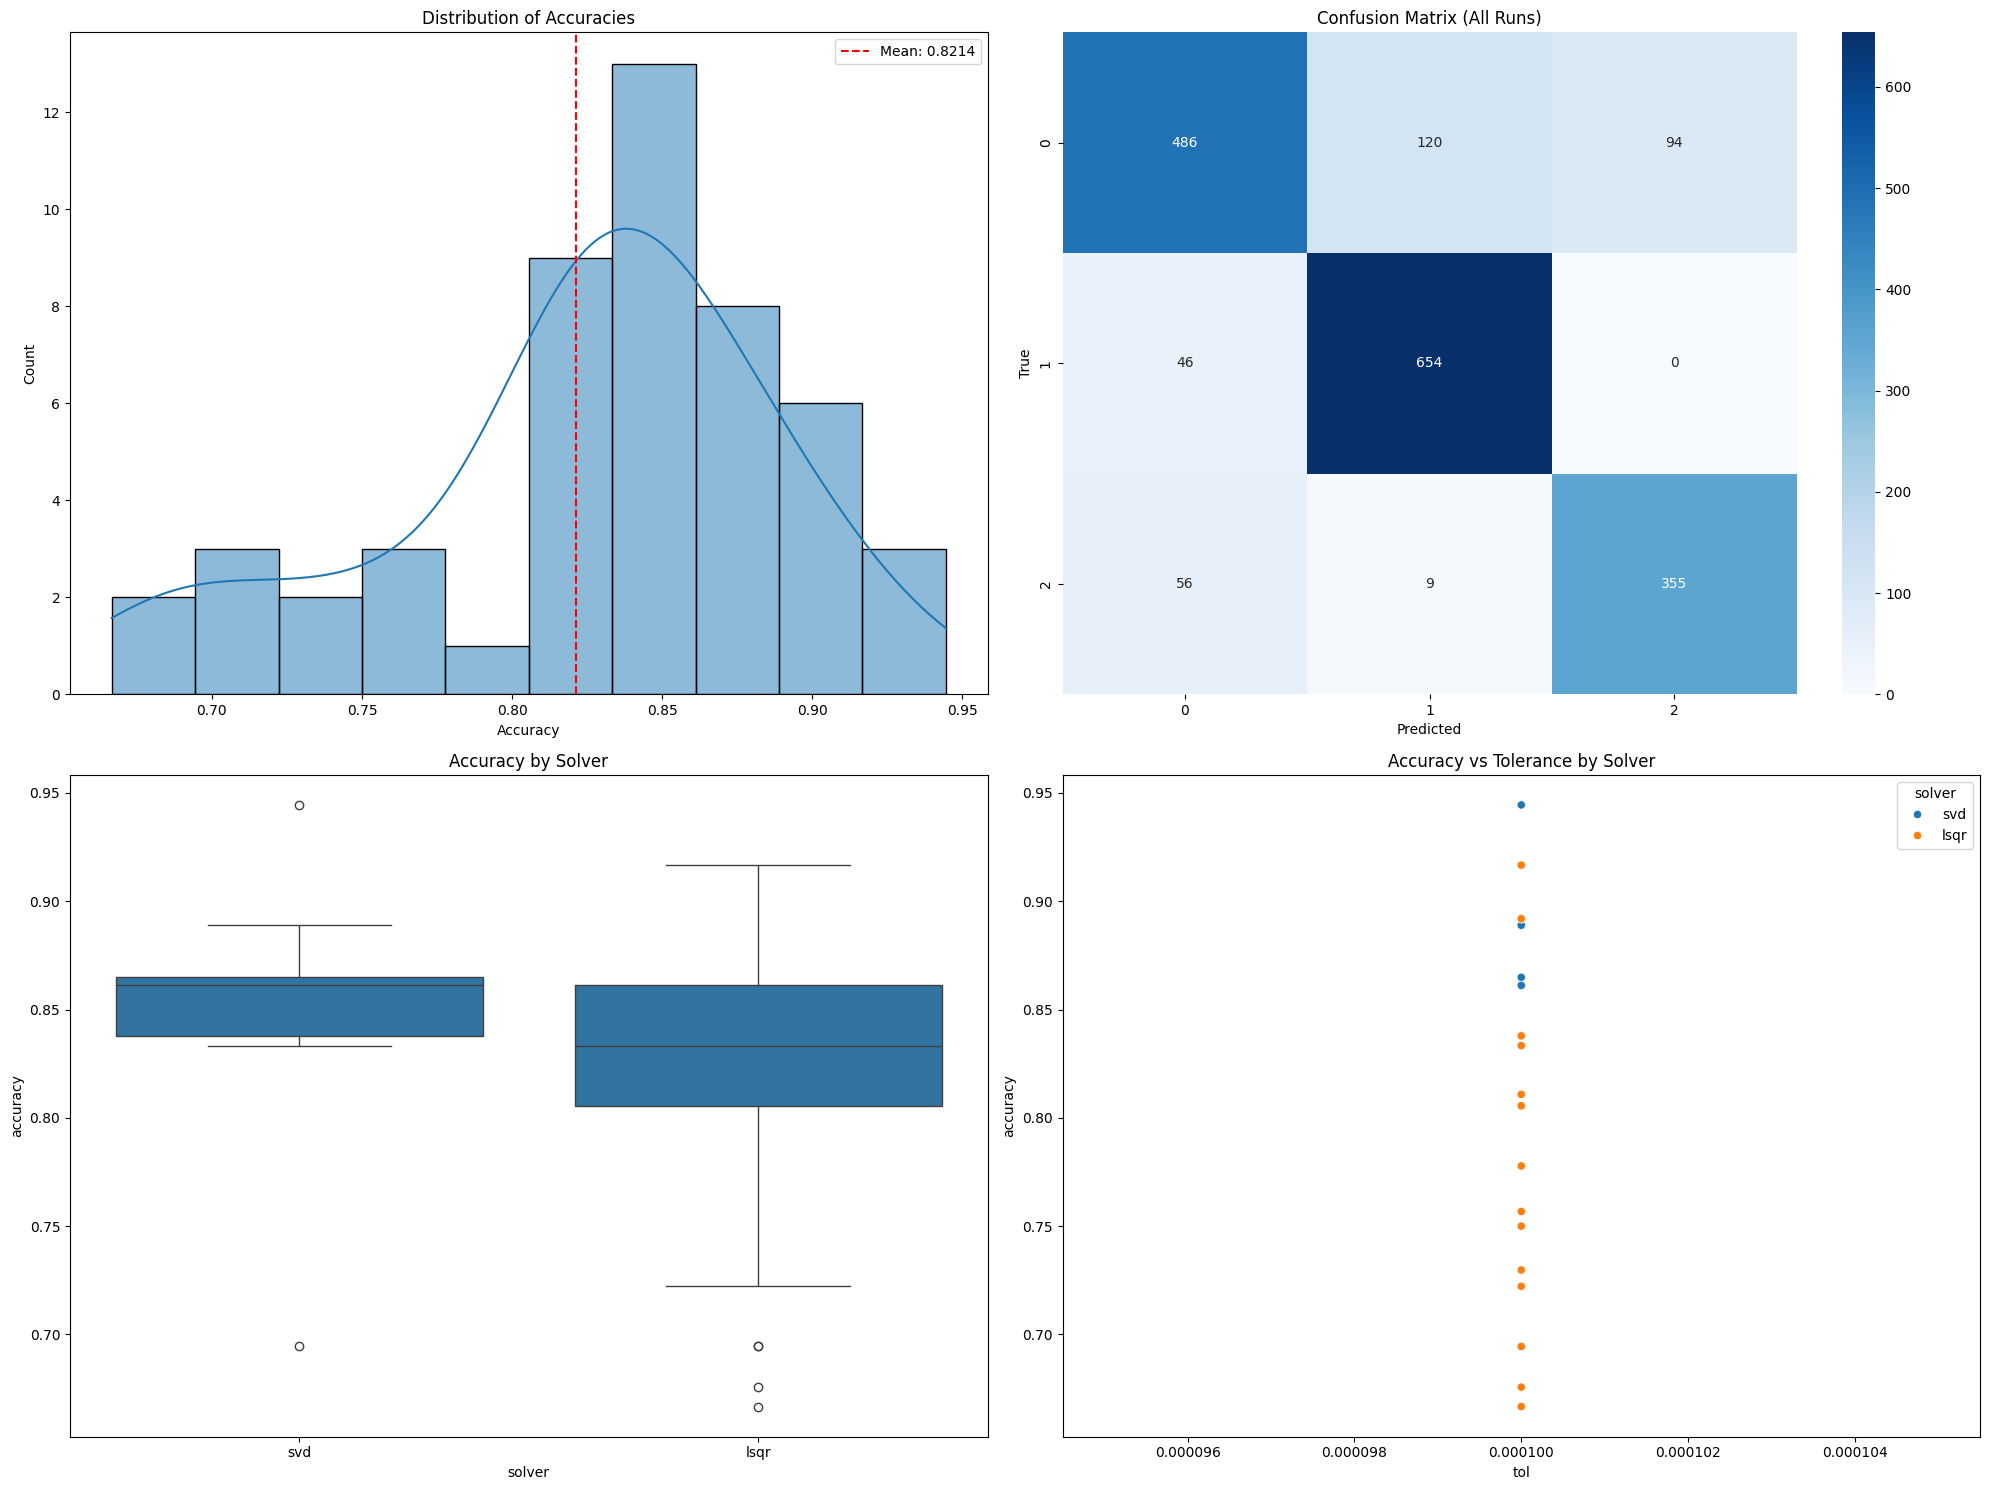


Análisis de Hiperparámetros más Frecuentes:

n_components:
1    50
Name: count, dtype: int64

shrinkage:
auto    21
0.1     18
Name: count, dtype: int64

solver:
lsqr    41
svd      9
Name: count, dtype: int64

store_covariance:
True    50
Name: count, dtype: int64

tol:
0.0001    50
Name: count, dtype: int64

Resumen de Resultados:
Accuracy Media: 0.8214
Desviación Estándar: 0.0643
Intervalo de Confianza (95%): [0.6799, 0.9167]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       700
           1       0.84      0.93      0.88       700
           2       0.79      0.85      0.82       420

    accuracy                           0.82      1820
   macro avg       0.82      0.82      0.82      1820
weighted avg       0.82      0.82      0.82      1820


Resultados guardados en 'lda_hyperparameter_results_SVMSMOTE.csv'

Tiempo total de ejecución: 0.78 minutos


In [48]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.model_selection import GridSearchCV, RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.exceptions import ConvergenceWarning  
import warnings  
import time  
  
def create_param_grid():  
    """  
    Define el grid de hiperparámetros  
    """  
    return {  
        'solver': ['svd', 'lsqr', 'eigen'],  
        'shrinkage': [None, 'auto', 0.1, 0.5, 1.0],  
        'n_components': [1, 2],  
        'store_covariance': [True, False],  
        'tol': [0.0001, 0.001, 0.01]  
    }  
  
def train_evaluate_lda_with_hyperparams(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo LDA con búsqueda de hiperparámetros y validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  
      
    # Listas para almacenar resultados  
    all_results = []  
    best_params_list = []  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
      
    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  
          
        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  
          
        # Crear y configurar GridSearchCV  
        lda = LinearDiscriminantAnalysis()  
        param_grid = create_param_grid()  
          
        with warnings.catch_warnings():  
            warnings.filterwarnings('ignore', category=ConvergenceWarning)  
              
            grid_search = GridSearchCV(  
                lda,  
                param_grid,  
                cv=5,  
                n_jobs=-1,  
                verbose=0,  
                scoring='accuracy'  
            )  
              
            # Entrenar  
            grid_search.fit(X_train, y_train)  
              
            # Predecir  
            y_pred = grid_search.predict(X_test)  
              
            # Guardar resultados  
            accuracy = accuracy_score(y_test, y_pred)  
            accuracies.append(accuracy)  
            all_predictions.extend(y_pred)  
            all_true_values.extend(y_test)  
            best_params_list.append(grid_search.best_params_)  
              
            # Guardar resultados detallados  
            fold_results = {  
                'fold': fold + 1,  
                'accuracy': accuracy,  
                **grid_search.best_params_  
            }  
            all_results.append(fold_results)  
              
            print(f"Accuracy del fold: {accuracy:.4f}")  
            print(f"Mejores parámetros: {grid_search.best_params_}")  
      
    return pd.DataFrame(all_results), accuracies, all_predictions, all_true_values, best_params_list  
  
def plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list):  
    """  
    Visualiza los resultados del análisis  
    """  
      
    fig = plt.figure(figsize=(20, 15))  
      
    # 1. Distribución de accuracies  
    plt.subplot(2, 2, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  
      
    # 2. Matriz de confusión  
    plt.subplot(2, 2, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  
      
    # 3. Boxplot de accuracies por solver  
    plt.subplot(2, 2, 3)  
    sns.boxplot(data=results_df, x='solver', y='accuracy')  
    plt.title('Accuracy by Solver')  
      
    # 4. Scatter plot de accuracy vs tolerance  
    plt.subplot(2, 2, 4)  
    sns.scatterplot(data=results_df, x='tol', y='accuracy', hue='solver')  
    plt.title('Accuracy vs Tolerance by Solver')  
      
    plt.tight_layout()  
    plt.show()  
      
    # Análisis de hiperparámetros más frecuentes  
    print("\nAnálisis de Hiperparámetros más Frecuentes:")  
    for param in best_params_list[0].keys():  
        values = [params[param] for params in best_params_list]  
        value_counts = pd.Series(values).value_counts()  
        print(f"\n{param}:")  
        print(value_counts)  
      
    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  
      
    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  
  
# Ejecutar el análisis  
start_time = time.time()  
  
# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  
  
# Realizar el análisis  
results_df, accuracies, all_predictions, all_true_values, best_params_list = train_evaluate_lda_with_hyperparams(X, y, n_splits=5, n_repeats=10)  
  
# Visualizar resultados  
plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list)  
  
# Guardar resultados  
results_df.to_csv('lda_hyperparameter_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'lda_hyperparameter_results_SVMSMOTE.csv'")  
  
# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  


#### 2. Maquina de Soporte Vectorial SIN HIPERPARÁMETROS

Fold 1/50 - Accuracy: 0.8378 - Training time: 0.01s - Prediction time: 0.00s
Fold 2/50 - Accuracy: 0.9189 - Training time: 0.00s - Prediction time: 0.00s
Fold 3/50 - Accuracy: 0.8333 - Training time: 0.00s - Prediction time: 0.00s
Fold 4/50 - Accuracy: 0.8889 - Training time: 0.00s - Prediction time: 0.00s
Fold 5/50 - Accuracy: 0.9167 - Training time: 0.00s - Prediction time: 0.00s
Fold 6/50 - Accuracy: 0.8378 - Training time: 0.00s - Prediction time: 0.00s
Fold 7/50 - Accuracy: 0.8649 - Training time: 0.00s - Prediction time: 0.00s
Fold 8/50 - Accuracy: 0.8056 - Training time: 0.00s - Prediction time: 0.00s
Fold 9/50 - Accuracy: 0.9444 - Training time: 0.00s - Prediction time: 0.00s
Fold 10/50 - Accuracy: 0.9167 - Training time: 0.00s - Prediction time: 0.00s
Fold 11/50 - Accuracy: 0.8649 - Training time: 0.00s - Prediction time: 0.00s
Fold 12/50 - Accuracy: 0.9459 - Training time: 0.00s - Prediction time: 0.00s
Fold 13/50 - Accuracy: 0.9444 - Training time: 0.00s - Prediction time: 0

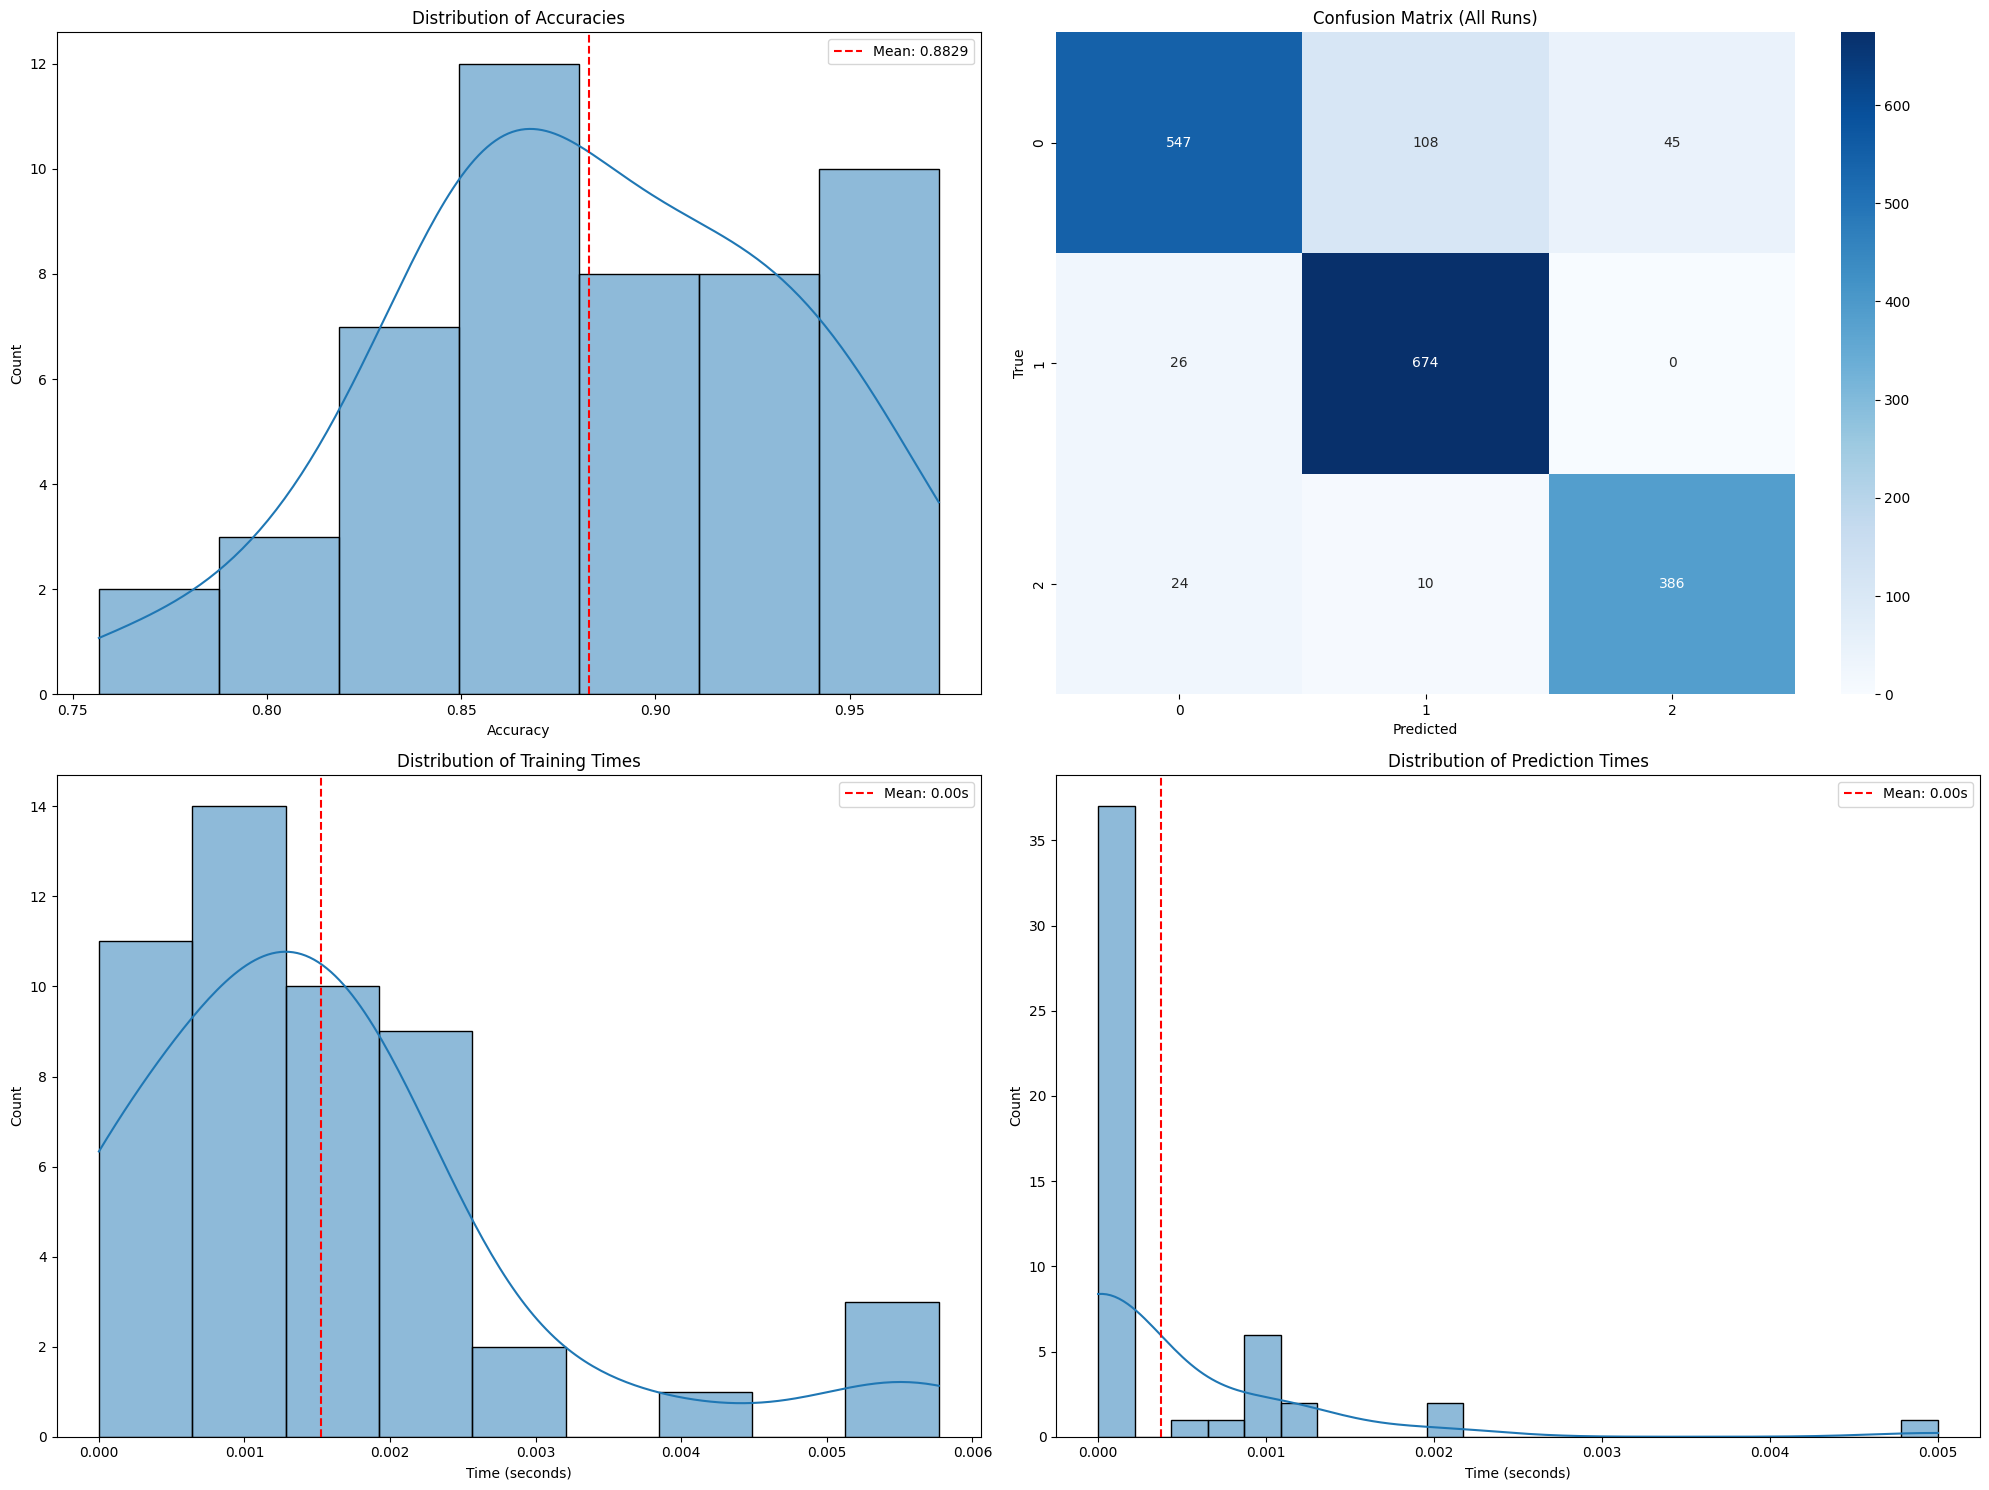


Resumen de Resultados:
Accuracy Media: 0.8829
Desviación Estándar de Accuracy: 0.0503
Intervalo de Confianza (95%): [0.7840, 0.9722]

Tiempo Medio de Entrenamiento: 0.00s
Tiempo Medio de Predicción: 0.00s

Matriz de Confusión Normalizada:
           Pred 0    Pred 1    Pred 2
Clase 0  0.781429  0.154286  0.064286
Clase 1  0.037143  0.962857  0.000000
Clase 2  0.057143  0.023810  0.919048

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       700
           1       0.85      0.96      0.90       700
           2       0.90      0.92      0.91       420

    accuracy                           0.88      1820
   macro avg       0.89      0.89      0.88      1820
weighted avg       0.89      0.88      0.88      1820


Resultados guardados en 'svc_multiple_runs_results_SVMSMOTE.csv'

Tiempo total de ejecución: 0.01 minutos


In [49]:
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.model_selection import RepeatedKFold  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import time  

def train_evaluate_svc_multiple_times(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo SVC múltiples veces usando validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(  
        n_splits=n_splits,  
        n_repeats=n_repeats,  
        random_state=42  
    )  

    # Listas para almacenar resultados  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  

    # Para cada fold en la validación cruzada  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        # Dividir los datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear y entrenar el modelo  
        svc = SVC(kernel='rbf', random_state=42)  

        # Medir tiempo de entrenamiento  
        train_start = time.time()  
        svc.fit(X_train, y_train)  
        train_time = time.time() - train_start  
        training_times.append(train_time)  

        # Medir tiempo de predicción  
        pred_start = time.time()  
        y_pred = svc.predict(X_test)  
        pred_time = time.time() - pred_start  
        prediction_times.append(pred_time)  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  

        # Imprimir progreso  
        print(f'Fold {fold+1}/{n_splits*n_repeats} - Accuracy: {accuracy:.4f} - '  
              f'Training time: {train_time:.2f}s - Prediction time: {pred_time:.2f}s')  

    return accuracies, all_predictions, all_true_values, training_times, prediction_times  

def plot_results(accuracies, all_predictions, all_true_values, training_times, prediction_times):  
    """  
    Visualiza los resultados de las múltiples ejecuciones  
    """  
    fig = plt.figure(figsize=(20, 15))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 2, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 2, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Training times  
    plt.subplot(2, 2, 3)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    # 4. Prediction times  
    plt.subplot(2, 2, 4)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    plt.tight_layout()  
    plt.show()  

    # Imprimir estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar de Accuracy: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  
    print(f"\nTiempo Medio de Entrenamiento: {np.mean(training_times):.2f}s")  
    print(f"Tiempo Medio de Predicción: {np.mean(prediction_times):.2f}s")  

    print("\nMatriz de Confusión Normalizada:")  
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  
    print(pd.DataFrame(cm_normalized,   
                      index=['Clase '+str(i) for i in range(len(np.unique(y)))],  
                      columns=['Pred '+str(i) for i in range(len(np.unique(y)))]))  

    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  

# Realizar múltiples ejecuciones  
accuracies, all_predictions, all_true_values, training_times, prediction_times = train_evaluate_svc_multiple_times(X, y, n_splits=5, n_repeats=10)  

# Visualizar resultados  
plot_results(accuracies, all_predictions, all_true_values, training_times, prediction_times)  

# Guardar resultados en un DataFrame  
results_df = pd.DataFrame({  
    'Fold': range(1, len(accuracies) + 1),  
    'Accuracy': accuracies,  
    'Training_Time': training_times,  
    'Prediction_Time': prediction_times  
})  

# Guardar resultados en CSV  
results_df.to_csv('svc_multiple_runs_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'svc_multiple_runs_results_SVMSMOTE.csv'")  

# Tiempo total de ejecución  
total_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {total_time/60:.2f} minutos")  

#### 2.1. Maquina de Soporte Vectorial CON HIPERPARÁMETROS


Procesando fold 1/50
Accuracy del fold: 0.8919
Mejores parámetros: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Tiempo del fold: 3.72s

Procesando fold 2/50
Accuracy del fold: 0.8649
Mejores parámetros: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Tiempo del fold: 0.39s

Procesando fold 3/50
Accuracy del fold: 0.8333
Mejores parámetros: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Tiempo del fold: 0.38s

Procesando fold 4/50
Accuracy del fold: 0.9167
Mejores parámetros: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Tiempo del fold: 0.41s

Procesando fold 5/50
Accuracy del fold: 0.9722
Mejores parámetros: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Tiempo del fold: 0.40s

Procesando fold 6/50
Accuracy del fold: 0.8649
Mejores parámetros: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Tiempo del fold: 0.41s

Procesando fold 7/50
Accuracy del fold: 0.8919
Mejores parámetros: {'C': 10, 'degree': 2, 'gamma': 'scale

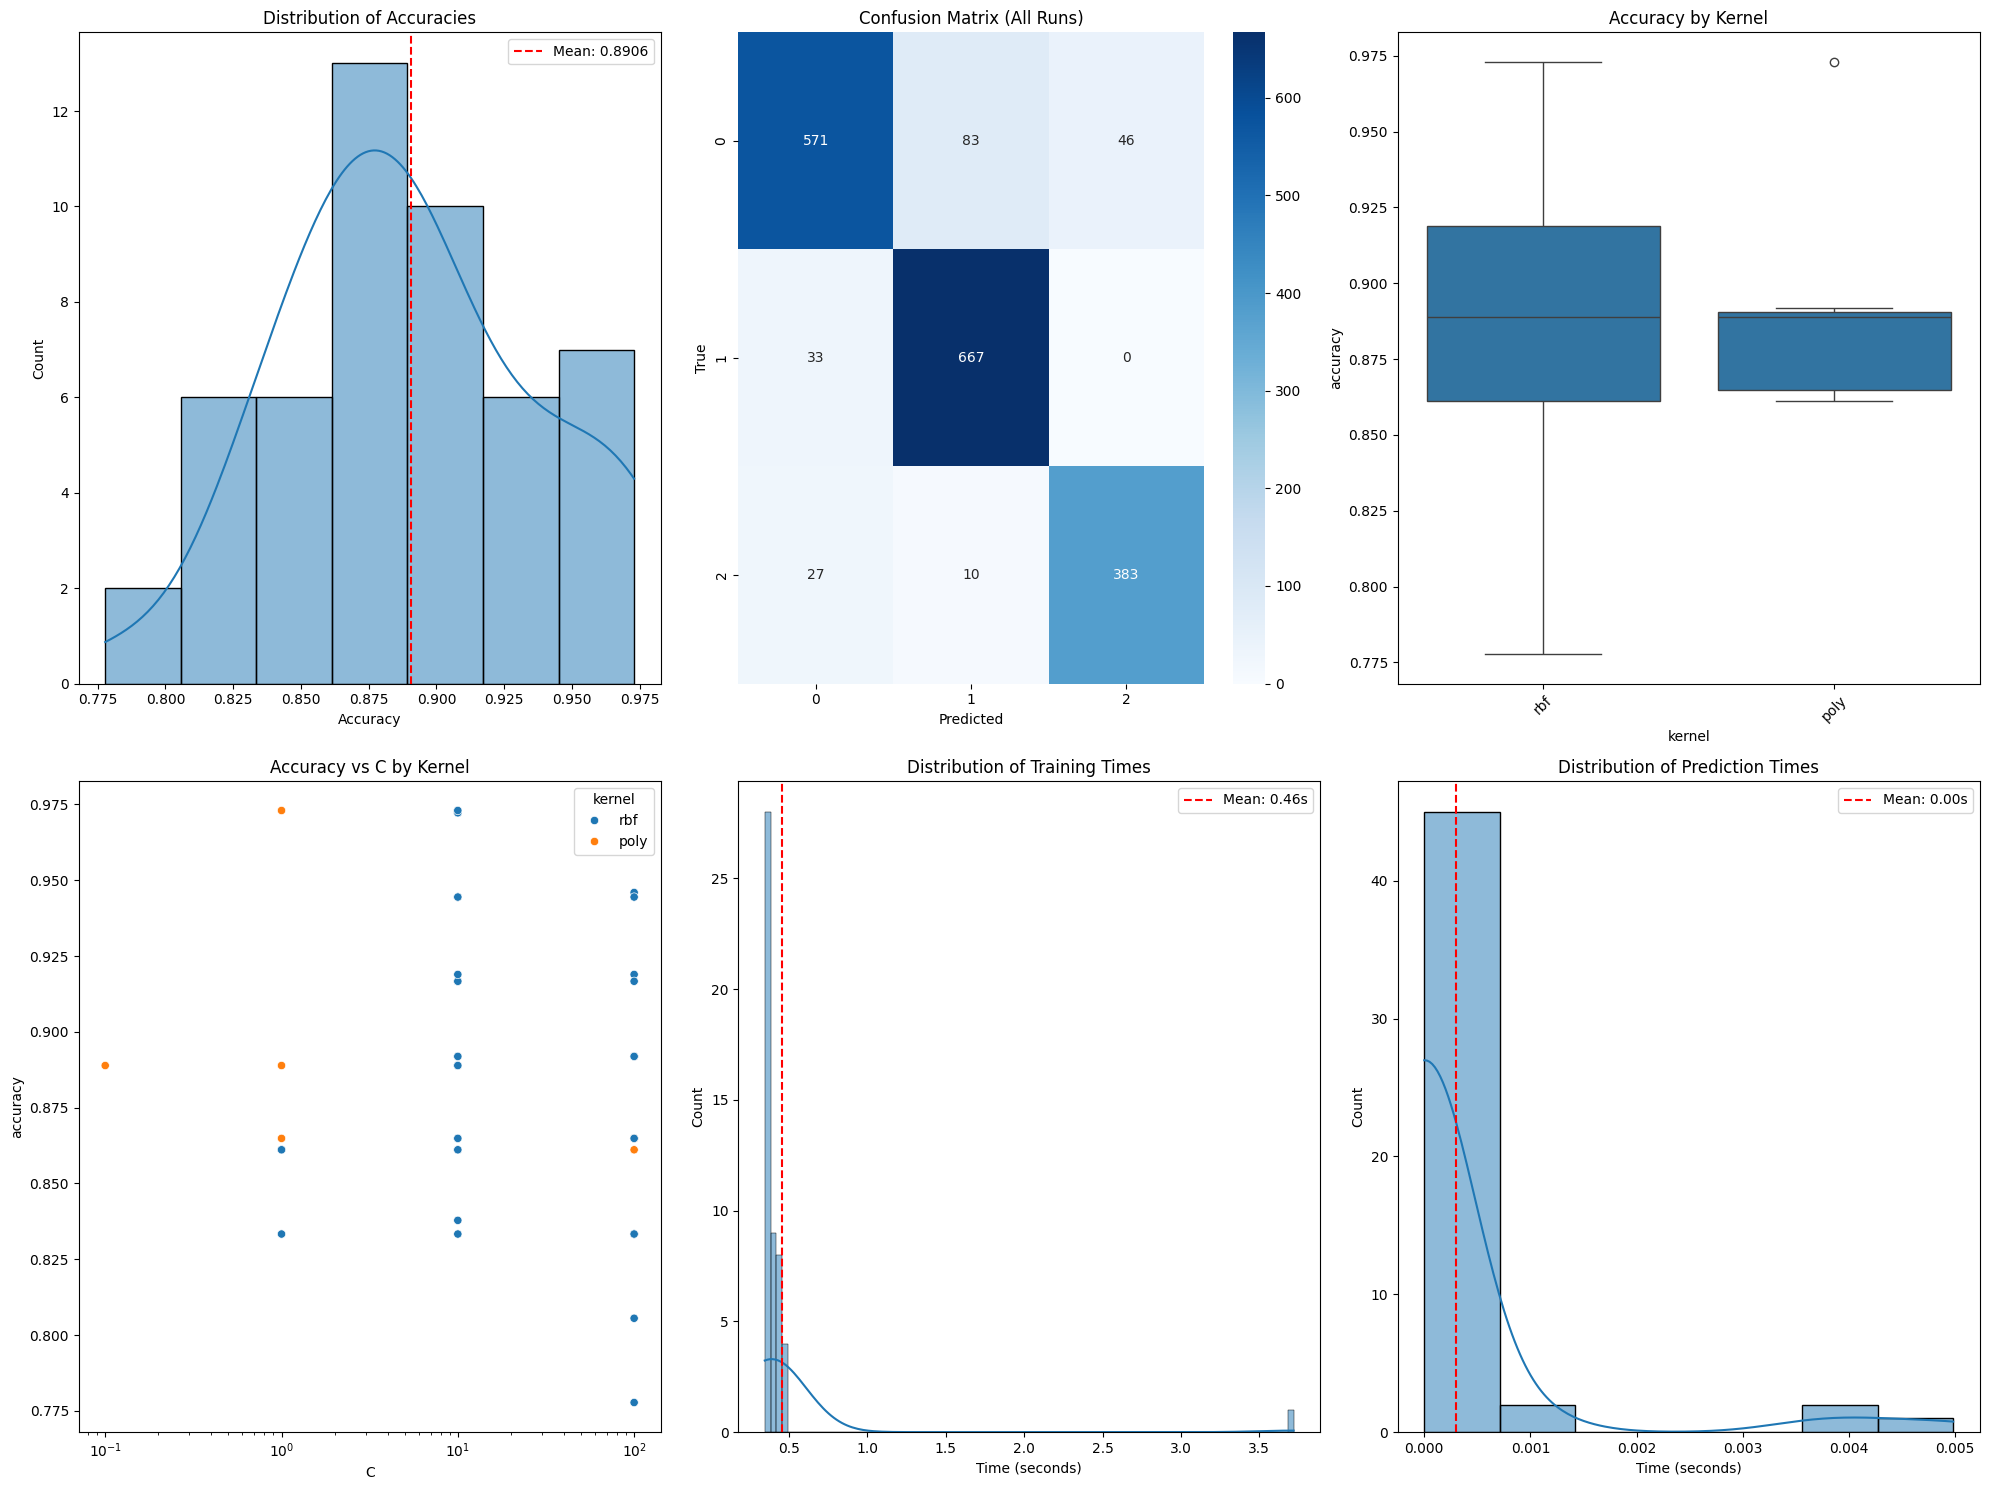


Análisis de Hiperparámetros más Frecuentes:

C:
10.0     24
100.0    19
1.0       6
0.1       1
Name: count, dtype: int64

degree:
2    49
4     1
Name: count, dtype: int64

gamma:
scale    32
auto     18
Name: count, dtype: int64

kernel:
rbf     43
poly     7
Name: count, dtype: int64

Resumen de Resultados:
Accuracy Media: 0.8906
Desviación Estándar: 0.0471
Intervalo de Confianza (95%): [0.8118, 0.9730]

Tiempo Medio de Entrenamiento: 0.46s
Tiempo Medio de Predicción: 0.00s

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       700
           1       0.88      0.95      0.91       700
           2       0.89      0.91      0.90       420

    accuracy                           0.89      1820
   macro avg       0.89      0.89      0.89      1820
weighted avg       0.89      0.89      0.89      1820


Resultados guardados en 'svc_hyperparameter_results_SVMSMOTE.csv'

Tiempo total de ejecución: 0.40 minutos


In [50]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV, RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
import warnings  
  
def create_param_grid():  
    """  
    Define el grid de hiperparámetros para SVC  
    """  
    return {  
        'C': [0.1, 1, 10, 100],  
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
        'gamma': ['scale', 'auto'],  
        'degree': [2, 3, 4]  
    }  
  
def train_evaluate_svc_with_hyperparams(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo SVC con búsqueda de hiperparámetros y validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  
      
    # Listas para almacenar resultados  
    all_results = []  
    best_params_list = []  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
      
    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  
          
        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  
          
        # Crear y configurar GridSearchCV  
        svc = SVC(random_state=42)  
        param_grid = create_param_grid()  
          
        with warnings.catch_warnings():  
            warnings.simplefilter('ignore')  
              
            grid_search = GridSearchCV(  
                svc,  
                param_grid,  
                cv=5,  
                n_jobs=-1,  
                verbose=0,  
                scoring='accuracy'  
            )  
              
            # Entrenar  
            train_start = time.time()  
            grid_search.fit(X_train, y_train)  
            train_time = time.time() - train_start  
              
            # Predecir  
            pred_start = time.time()  
            y_pred = grid_search.predict(X_test)  
            pred_time = time.time() - pred_start  
              
            # Guardar resultados  
            accuracy = accuracy_score(y_test, y_pred)  
            accuracies.append(accuracy)  
            all_predictions.extend(y_pred)  
            all_true_values.extend(y_test)  
            best_params_list.append(grid_search.best_params_)  
            training_times.append(train_time)  
            prediction_times.append(pred_time)  
              
            # Guardar resultados detallados  
            fold_results = {  
                'fold': fold + 1,  
                'accuracy': accuracy,  
                'training_time': train_time,  
                'prediction_time': pred_time,  
                **grid_search.best_params_  
            }  
            all_results.append(fold_results)  
              
            fold_time = time.time() - fold_start_time  
            print(f"Accuracy del fold: {accuracy:.4f}")  
            print(f"Mejores parámetros: {grid_search.best_params_}")  
            print(f"Tiempo del fold: {fold_time:.2f}s")  
      
    return pd.DataFrame(all_results), accuracies, all_predictions, all_true_values, best_params_list, training_times, prediction_times  
  
def plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list, training_times, prediction_times):  
    """  
    Visualiza los resultados del análisis  
    """   
    fig = plt.figure(figsize=(20, 15))  
      
    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  
      
    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  
      
    # 3. Boxplot de accuracies por kernel  
    plt.subplot(2, 3, 3)  
    sns.boxplot(data=results_df, x='kernel', y='accuracy')  
    plt.title('Accuracy by Kernel')  
    plt.xticks(rotation=45)  
      
    # 4. Scatter plot de accuracy vs C  
    plt.subplot(2, 3, 4)  
    sns.scatterplot(data=results_df, x='C', y='accuracy', hue='kernel')  
    plt.title('Accuracy vs C by Kernel')  
    plt.xscale('log')  
      
    # 5. Training times  
    plt.subplot(2, 3, 5)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  
      
    # 6. Prediction times  
    plt.subplot(2, 3, 6)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  
      
    plt.tight_layout()  
    plt.show()  
      
    # Análisis de hiperparámetros más frecuentes  
    print("\nAnálisis de Hiperparámetros más Frecuentes:")  
    for param in best_params_list[0].keys():  
        values = [params[param] for params in best_params_list]  
        value_counts = pd.Series(values).value_counts()  
        print(f"\n{param}:")  
        print(value_counts)  
      
    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  
    print(f"\nTiempo Medio de Entrenamiento: {np.mean(training_times):.2f}s")  
    print(f"Tiempo Medio de Predicción: {np.mean(prediction_times):.2f}s")  
      
    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  
  
# Ejecutar el análisis  
start_time = time.time()  
  
# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  
  
# Realizar el análisis  
results_df, accuracies, all_predictions, all_true_values, best_params_list, training_times, prediction_times = train_evaluate_svc_with_hyperparams(  
        X, y, n_splits=5, n_repeats=10  
    )  
  
# Visualizar resultados  
plot_results(results_df, accuracies, all_predictions, all_true_values,   
            best_params_list, training_times, prediction_times)  
  
# Guardar resultados  
results_df.to_csv('svc_hyperparameter_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'svc_hyperparameter_results_SVMSMOTE.csv'")  
  
# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 3. Regresión Logistica Multinomial sin hiperparámetros

Fold 1/50 - Accuracy: 0.8378 - Training time: 0.01s - Prediction time: 0.00s
Fold 2/50 - Accuracy: 0.7838 - Training time: 0.01s - Prediction time: 0.00s
Fold 3/50 - Accuracy: 0.7778 - Training time: 0.01s - Prediction time: 0.00s
Fold 4/50 - Accuracy: 0.8611 - Training time: 0.01s - Prediction time: 0.00s
Fold 5/50 - Accuracy: 0.8333 - Training time: 0.00s - Prediction time: 0.00s
Fold 6/50 - Accuracy: 0.6757 - Training time: 0.00s - Prediction time: 0.00s
Fold 7/50 - Accuracy: 0.8108 - Training time: 0.01s - Prediction time: 0.00s
Fold 8/50 - Accuracy: 0.8056 - Training time: 0.01s - Prediction time: 0.00s
Fold 9/50 - Accuracy: 0.8611 - Training time: 0.00s - Prediction time: 0.00s
Fold 10/50 - Accuracy: 0.8889 - Training time: 0.00s - Prediction time: 0.00s
Fold 11/50 - Accuracy: 0.7027 - Training time: 0.00s - Prediction time: 0.00s
Fold 12/50 - Accuracy: 0.9459 - Training time: 0.00s - Prediction time: 0.00s
Fold 13/50 - Accuracy: 0.7778 - Training time: 0.00s - Prediction time: 0

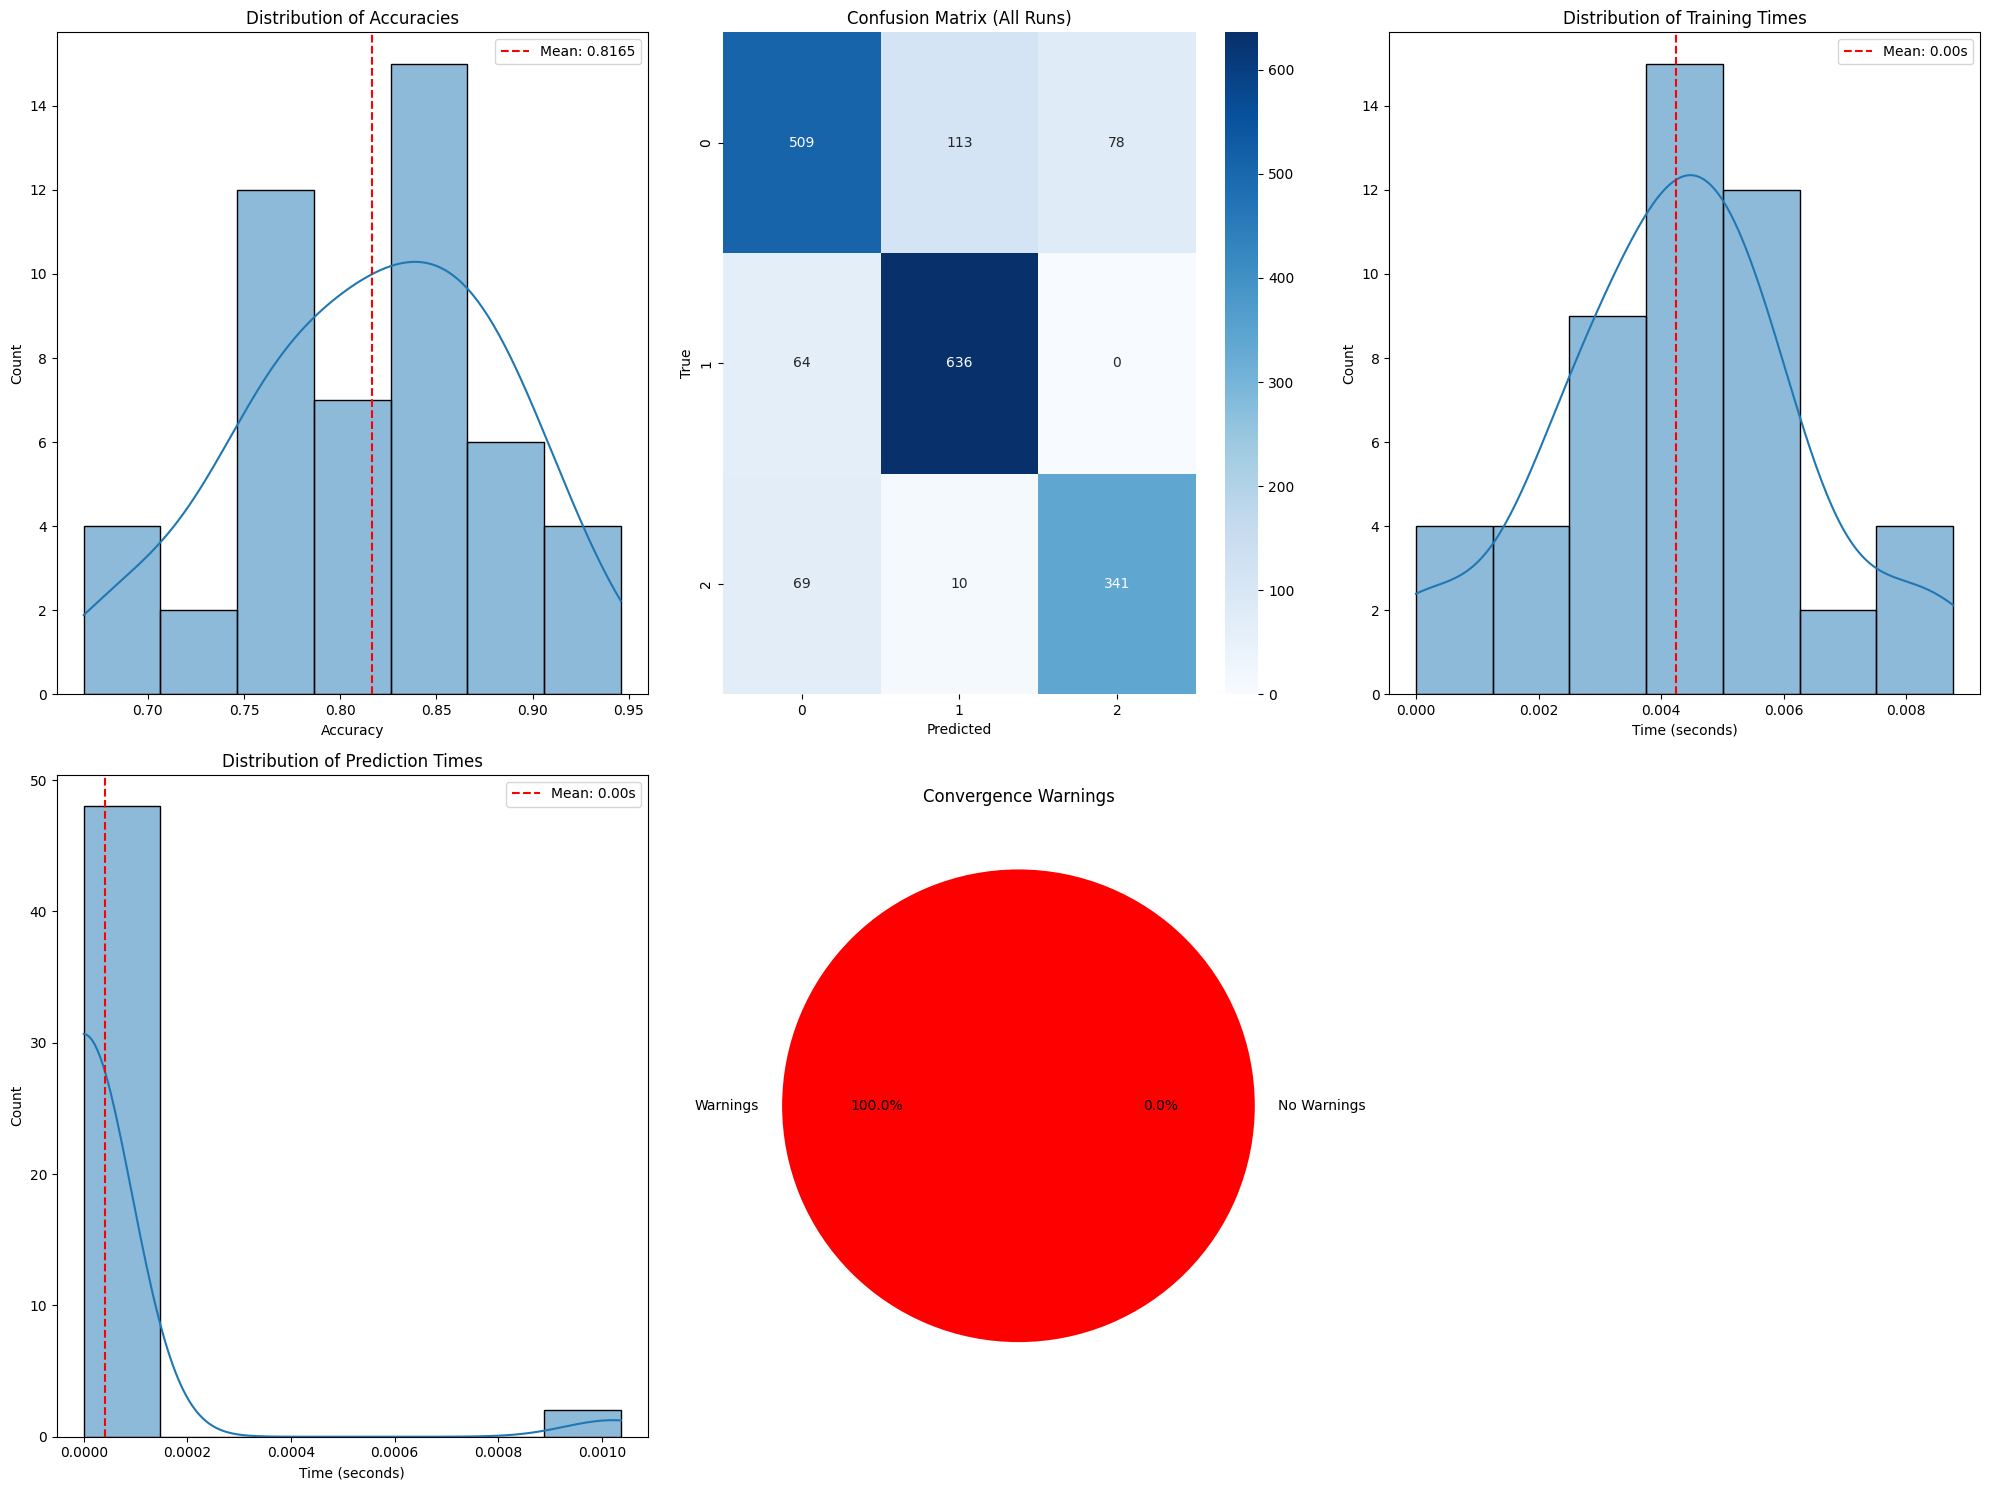


Resumen de Resultados:
Accuracy Media: 0.8165
Desviación Estándar: 0.0662
Intervalo de Confianza (95%): [0.6799, 0.9167]

Tiempo Medio de Entrenamiento: 0.00s
Tiempo Medio de Predicción: 0.00s

Porcentaje de Advertencias de Convergencia: 100.0%

Matriz de Confusión Normalizada:
          Pred 0    Pred 1    Pred 2
True 0  0.727143  0.161429  0.111429
True 1  0.091429  0.908571  0.000000
True 2  0.164286  0.023810  0.811905

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       700
           1       0.84      0.91      0.87       700
           2       0.81      0.81      0.81       420

    accuracy                           0.82      1820
   macro avg       0.81      0.82      0.81      1820
weighted avg       0.82      0.82      0.81      1820


Resultados guardados en 'logreg_multiple_runs_results_SVMSMOTE.csv'

Tiempo total de ejecución: 0.01 minutos


In [51]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
import warnings  

def train_evaluate_logreg_multiple_times(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo de Regresión Logística múltiples veces usando validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(  
        n_splits=n_splits,  
        n_repeats=n_repeats,  
        random_state=42  
    )  

    # Listas para almacenar resultados  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
    convergence_warnings = []  

    # Para cada fold en la validación cruzada  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        # Dividir los datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear y entrenar el modelo  
        with warnings.catch_warnings(record=True) as w:  
            warnings.simplefilter("always")  

            logreg = LogisticRegression(  
                multi_class='multinomial',  
                solver='lbfgs',  
                max_iter=1000,  
                random_state=42  
            )  

            # Medir tiempo de entrenamiento  
            train_start = time.time()  
            logreg.fit(X_train, y_train)  
            train_time = time.time() - train_start  

            # Registrar advertencias de convergencia  
            convergence_warnings.append(len(w) > 0)  

        # Medir tiempo de predicción  
        pred_start = time.time()  
        y_pred = logreg.predict(X_test)  
        pred_time = time.time() - pred_start  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  

        # Imprimir progreso  
        print(f'Fold {fold+1}/{n_splits*n_repeats} - Accuracy: {accuracy:.4f} - '  
              f'Training time: {train_time:.2f}s - Prediction time: {pred_time:.2f}s')  

    return (accuracies, all_predictions, all_true_values, training_times,   
            prediction_times, convergence_warnings)  

def plot_results(accuracies, all_predictions, all_true_values, training_times,   
                prediction_times, convergence_warnings):  
    """  
    Visualiza los resultados de las múltiples ejecuciones  
    """    
    fig = plt.figure(figsize=(20, 15))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Training times  
    plt.subplot(2, 3, 3)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    # 4. Prediction times  
    plt.subplot(2, 3, 4)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    # 5. Convergence warnings  
    plt.subplot(2, 3, 5)  
    convergence_rate = np.mean(convergence_warnings) * 100  
    plt.pie([convergence_rate, 100-convergence_rate],   
            labels=['Warnings', 'No Warnings'],  
            autopct='%1.1f%%',  
            colors=['red', 'green'])  
    plt.title('Convergence Warnings')  

    plt.tight_layout()  
    plt.show()  

    # Imprimir estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  
    print(f"\nTiempo Medio de Entrenamiento: {np.mean(training_times):.2f}s")  
    print(f"Tiempo Medio de Predicción: {np.mean(prediction_times):.2f}s")  
    print(f"\nPorcentaje de Advertencias de Convergencia: {convergence_rate:.1f}%")  

    # Matriz de confusión normalizada  
    print("\nMatriz de Confusión Normalizada:")  
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  
    print(pd.DataFrame(  
        cm_normalized,  
        index=[f'True {i}' for i in range(len(np.unique(all_true_values)))],  
        columns=[f'Pred {i}' for i in range(len(np.unique(all_predictions)))]  
    ))  

    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  

# Realizar múltiples ejecuciones  
results = train_evaluate_logreg_multiple_times(X, y, n_splits=5, n_repeats=10)  
accuracies, all_predictions, all_true_values, training_times, prediction_times, convergence_warnings = results  

# Visualizar resultados  
plot_results(accuracies, all_predictions, all_true_values, training_times,   
            prediction_times, convergence_warnings)  

# Guardar resultados en un DataFrame  
results_df = pd.DataFrame({  
    'Fold': range(1, len(accuracies) + 1),  
    'Accuracy': accuracies,  
    'Training_Time': training_times,  
    'Prediction_Time': prediction_times,  
    'Convergence_Warning': convergence_warnings  
})  

# Guardar resultados en CSV  
results_df.to_csv('logreg_multiple_runs_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'logreg_multiple_runs_results_SVMSMOTE.csv'")  

# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 3.1. Regresión Logistica Multinomial con hiperparámetros


Procesando fold 1/50
Accuracy del fold: 0.8649
Mejores parámetros: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Tiempo del fold: 3.62s

Procesando fold 2/50
Accuracy del fold: 0.8108
Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Tiempo del fold: 0.21s

Procesando fold 3/50
Accuracy del fold: 0.8611
Mejores parámetros: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Tiempo del fold: 0.23s

Procesando fold 4/50
Accuracy del fold: 0.8056
Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Tiempo del fold: 0.23s

Procesando fold 5/50
Accuracy del fold: 0.7222
Mejores parámetros: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Tiempo del fold: 0.20s

Procesando fold 6/50
Accuracy del fold: 0.7568
Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Tiempo del fold: 0.21s

Procesando fold 7/50
Accuracy del fold: 0.8108
Mejores parámetros: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Tiempo del fold: 0.22s

Procesan

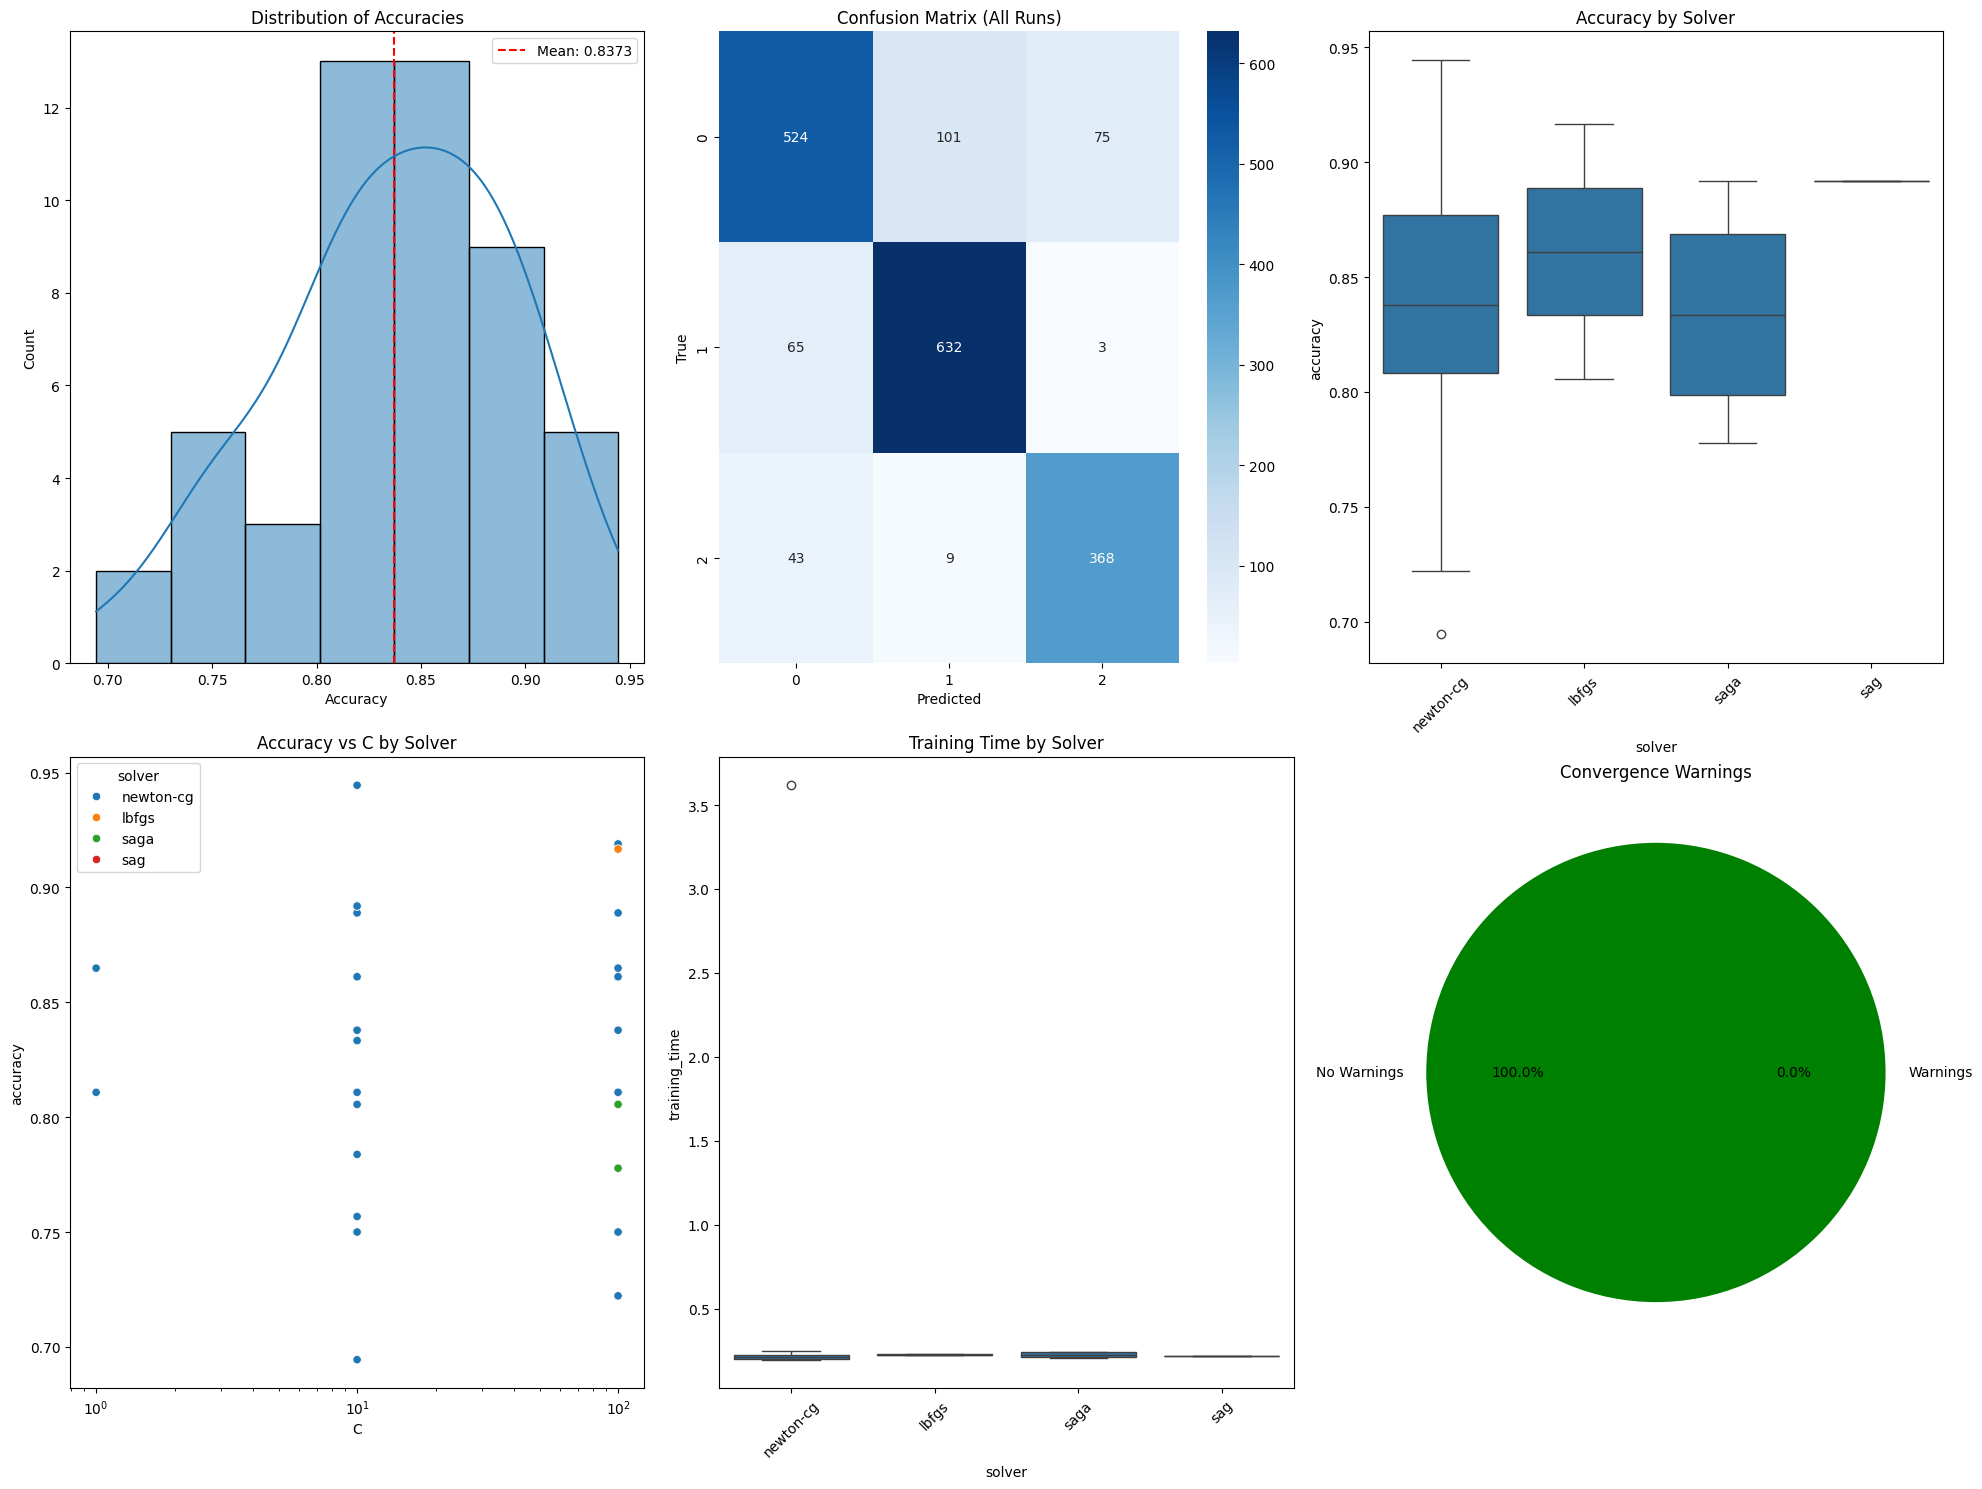


Análisis de Hiperparámetros más Frecuentes:

C:
10     27
100    21
1       2
Name: count, dtype: int64

penalty:
l2    50
Name: count, dtype: int64

solver:
newton-cg    43
saga          4
lbfgs         2
sag           1
Name: count, dtype: int64

Resumen de Resultados:
Accuracy Media: 0.8373
Desviación Estándar: 0.0560
Intervalo de Confianza (95%): [0.7285, 0.9184]

Tiempo Medio de Entrenamiento: 0.28s
Tiempo Medio de Predicción: 0.00s

Porcentaje de Advertencias de Convergencia: 0.0%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       700
           1       0.85      0.90      0.88       700
           2       0.83      0.88      0.85       420

    accuracy                           0.84      1820
   macro avg       0.84      0.84      0.84      1820
weighted avg       0.84      0.84      0.84      1820


Resultados guardados en 'logreg_hyperparameter_results_SVMSMOTE.csv'

Tiempo total de ejecución: 0

In [52]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV, RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
import warnings  

def create_param_grid():  
    """  
    Define el grid de hiperparámetros para Regresión Logística  
    """  
    return {  
        'C': [0.01, 0.1, 1, 10, 100],  
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  
        'penalty': ['l2', 'none']  
    }  

def train_evaluate_logreg_with_hyperparams(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo de Regresión Logística con búsqueda de hiperparámetros   
    y validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  

    # Listas para almacenar resultados  
    all_results = []  
    best_params_list = []  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
    convergence_warnings = []  

    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  

        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear y configurar GridSearchCV  
        logreg = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)  
        param_grid = create_param_grid()  

        with warnings.catch_warnings(record=True) as w:  
            warnings.simplefilter("always")  

            grid_search = GridSearchCV(  
                logreg,  
                param_grid,  
                cv=5,  
                n_jobs=-1,  
                verbose=0,  
                scoring='accuracy'  
            )  

            # Entrenar  
            train_start = time.time()  
            grid_search.fit(X_train, y_train)  
            train_time = time.time() - train_start  

            # Registrar advertencias de convergencia  
            convergence_warnings.append(any('convergence' in str(warn.message) for warn in w))  

        # Predecir  
        pred_start = time.time()  
        y_pred = grid_search.predict(X_test)  
        pred_time = time.time() - pred_start  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        best_params_list.append(grid_search.best_params_)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  

        # Guardar resultados detallados  
        fold_results = {  
            'fold': fold + 1,  
            'accuracy': accuracy,  
            'training_time': train_time,  
            'prediction_time': pred_time,  
            **grid_search.best_params_  
        }  
        all_results.append(fold_results)  

        fold_time = time.time() - fold_start_time  
        print(f"Accuracy del fold: {accuracy:.4f}")  
        print(f"Mejores parámetros: {grid_search.best_params_}")  
        print(f"Tiempo del fold: {fold_time:.2f}s")  

    return (pd.DataFrame(all_results), accuracies, all_predictions, all_true_values,   
            best_params_list, training_times, prediction_times, convergence_warnings)  

def plot_results(results_df, accuracies, all_predictions, all_true_values,   
                best_params_list, training_times, prediction_times, convergence_warnings):  
    """  
    Visualiza los resultados del análisis  
    """   
    fig = plt.figure(figsize=(20, 15))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Boxplot de accuracies por solver  
    plt.subplot(2, 3, 3)  
    sns.boxplot(data=results_df, x='solver', y='accuracy')  
    plt.title('Accuracy by Solver')  
    plt.xticks(rotation=45)  

    # 4. Scatter plot de accuracy vs C  
    plt.subplot(2, 3, 4)  
    sns.scatterplot(data=results_df, x='C', y='accuracy', hue='solver')  
    plt.title('Accuracy vs C by Solver')  
    plt.xscale('log')  

    # 5. Training times por solver  
    plt.subplot(2, 3, 5)  
    sns.boxplot(data=results_df, x='solver', y='training_time')  
    plt.title('Training Time by Solver')  
    plt.xticks(rotation=45)  

    # 6. Convergence warnings  
    plt.subplot(2, 3, 6)  
    convergence_rate = np.mean(convergence_warnings) * 100  
    plt.pie([convergence_rate, 100-convergence_rate],   
            labels=['Warnings', 'No Warnings'],  
            autopct='%1.1f%%',  
            colors=['red', 'green'])  
    plt.title('Convergence Warnings')  

    plt.tight_layout()  
    plt.show()  

    # Análisis de hiperparámetros más frecuentes  
    print("\nAnálisis de Hiperparámetros más Frecuentes:")  
    for param in best_params_list[0].keys():  
        values = [params[param] for params in best_params_list]  
        value_counts = pd.Series(values).value_counts()  
        print(f"\n{param}:")  
        print(value_counts)  

    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  
    print(f"\nTiempo Medio de Entrenamiento: {np.mean(training_times):.2f}s")  
    print(f"Tiempo Medio de Predicción: {np.mean(prediction_times):.2f}s")  
    print(f"\nPorcentaje de Advertencias de Convergencia: {convergence_rate:.1f}%")  

    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  

# Realizar el análisis  
results = train_evaluate_logreg_with_hyperparams(X, y, n_splits=5, n_repeats=10)  
results_df, accuracies, all_predictions, all_true_values, best_params_list, training_times, prediction_times, convergence_warnings = results  

# Visualizar resultados  
plot_results(results_df, accuracies, all_predictions, all_true_values,   
            best_params_list, training_times, prediction_times, convergence_warnings)  

# Guardar resultados  
results_df.to_csv('logreg_hyperparameter_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'logreg_hyperparameter_results_SVMSMOTE.csv'")  

# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 4. Naive Bayes sin hiperparámetros

Fold 1/50 - Accuracy: 0.8649 - Training time: 0.00s - Prediction time: 0.00s
Fold 2/50 - Accuracy: 0.8378 - Training time: 0.00s - Prediction time: 0.00s
Fold 3/50 - Accuracy: 0.8333 - Training time: 0.00s - Prediction time: 0.00s
Fold 4/50 - Accuracy: 0.8056 - Training time: 0.00s - Prediction time: 0.00s
Fold 5/50 - Accuracy: 0.8333 - Training time: 0.00s - Prediction time: 0.00s
Fold 6/50 - Accuracy: 0.8378 - Training time: 0.00s - Prediction time: 0.00s
Fold 7/50 - Accuracy: 0.8649 - Training time: 0.00s - Prediction time: 0.00s
Fold 8/50 - Accuracy: 0.8889 - Training time: 0.00s - Prediction time: 0.00s
Fold 9/50 - Accuracy: 0.8333 - Training time: 0.00s - Prediction time: 0.00s
Fold 10/50 - Accuracy: 0.8056 - Training time: 0.00s - Prediction time: 0.00s
Fold 11/50 - Accuracy: 0.8378 - Training time: 0.00s - Prediction time: 0.00s
Fold 12/50 - Accuracy: 0.8108 - Training time: 0.00s - Prediction time: 0.00s
Fold 13/50 - Accuracy: 0.7500 - Training time: 0.00s - Prediction time: 0

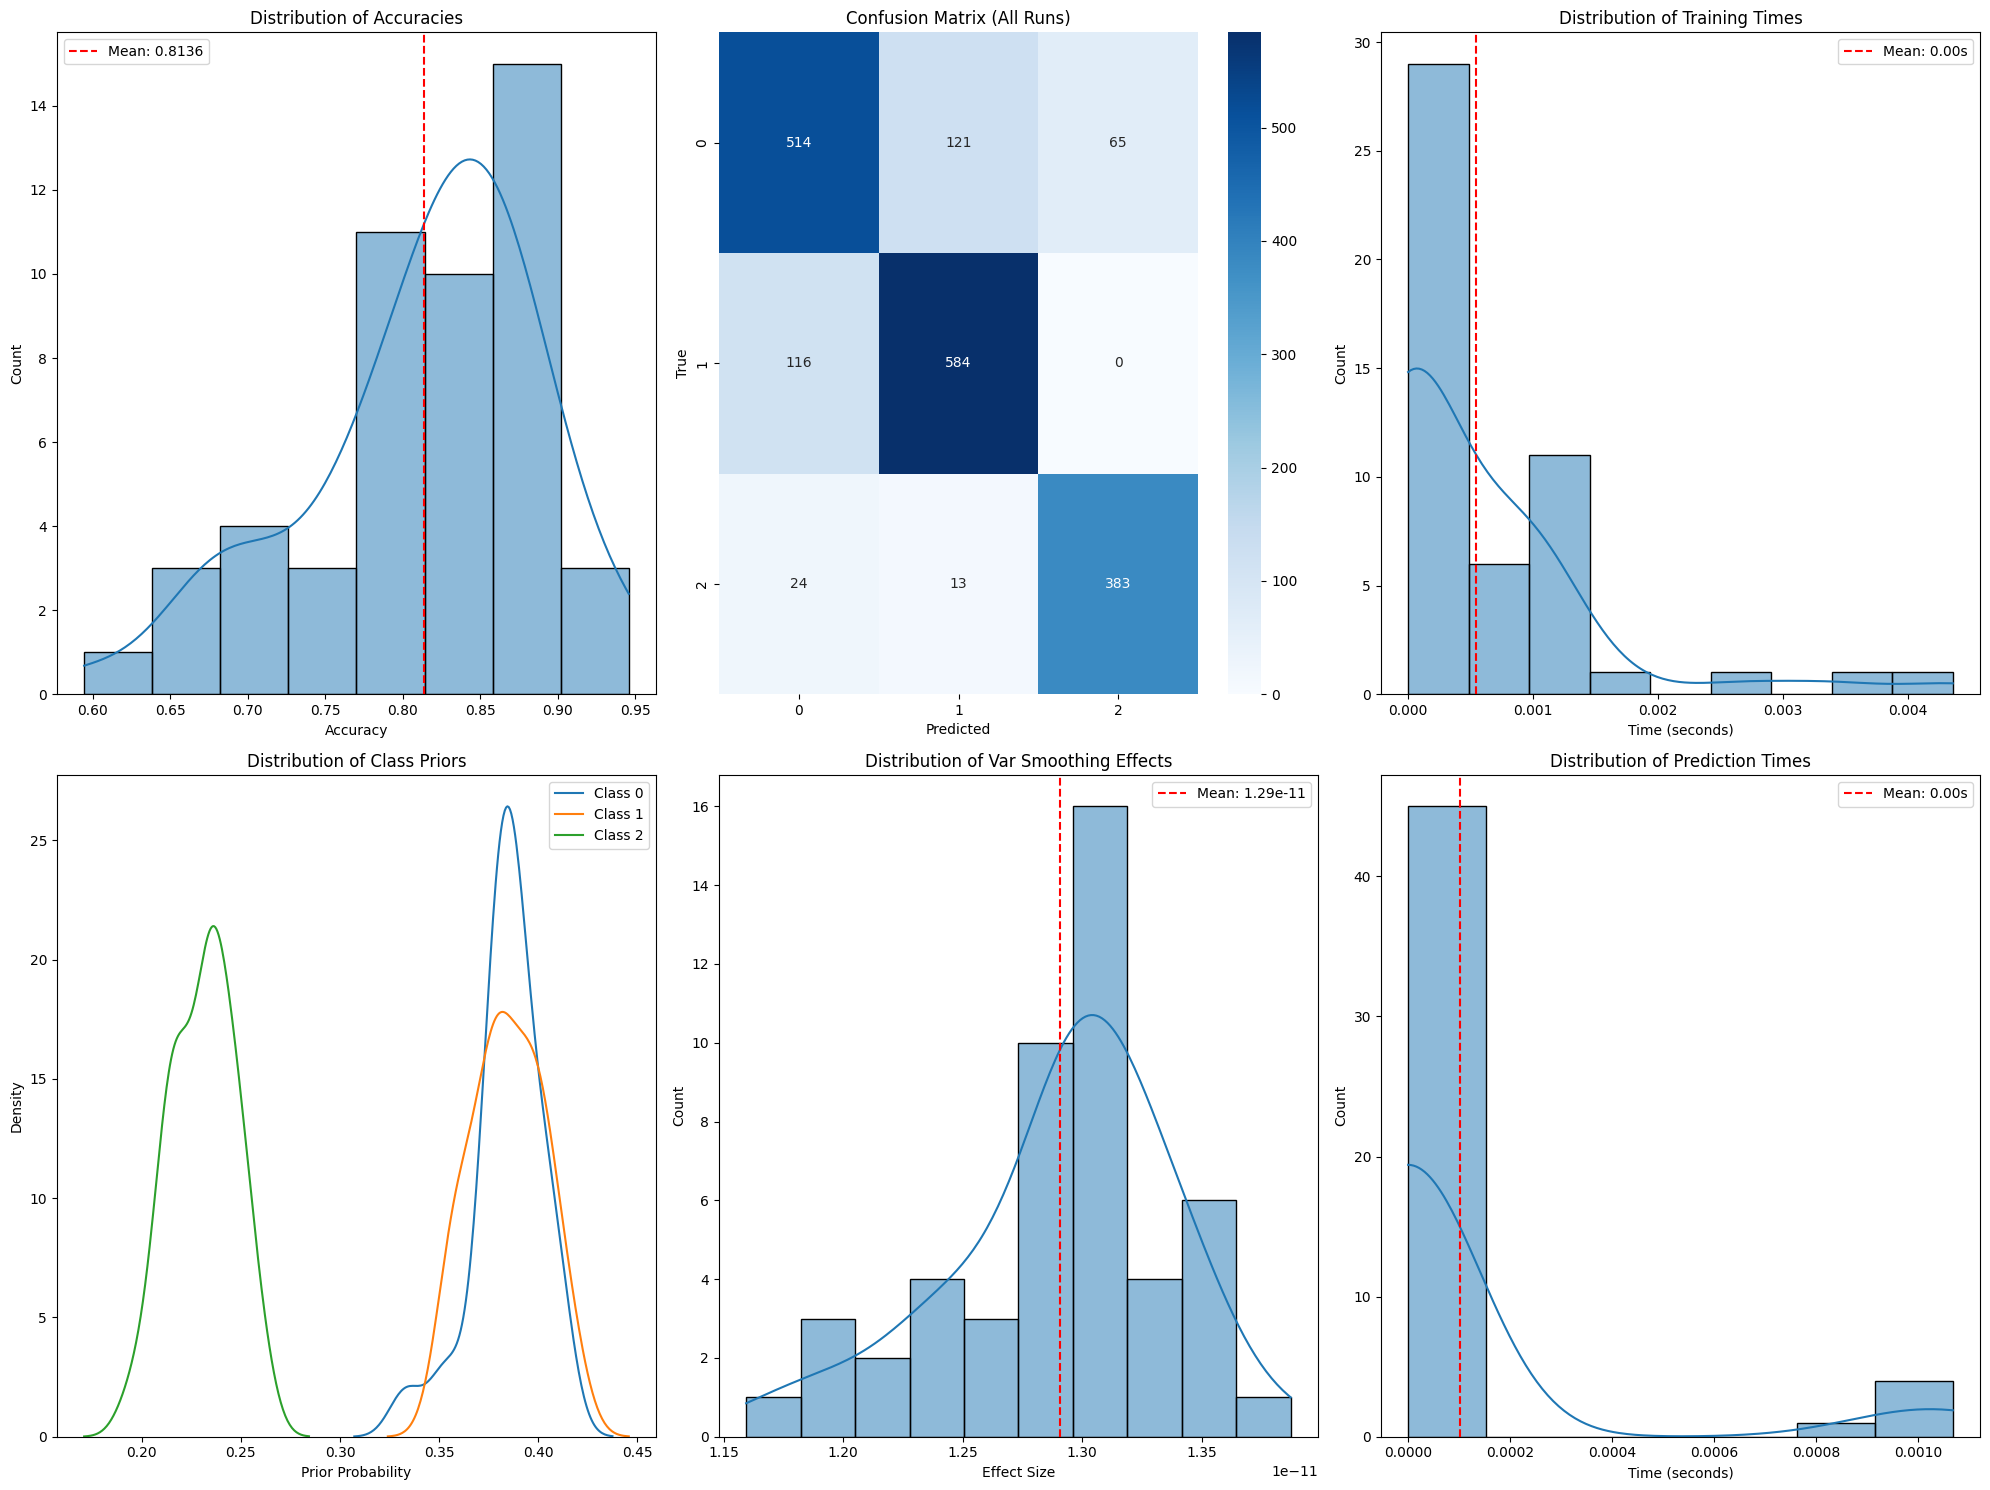


Resumen de Resultados:
Accuracy Media: 0.8136
Desviación Estándar: 0.0751
Intervalo de Confianza (95%): [0.6667, 0.9387]

Análisis de Estabilidad:
Coeficiente de Variación de Accuracy: 0.0923
Tiempo Medio de Entrenamiento: 0.00s
Tiempo Medio de Predicción: 0.00s

Análisis de Class Priors:
Clase 0: 0.3846 ± 0.0172
Clase 1: 0.3846 ± 0.0181
Clase 2: 0.2308 ± 0.0161

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       700
           1       0.81      0.83      0.82       700
           2       0.85      0.91      0.88       420

    accuracy                           0.81      1820
   macro avg       0.82      0.83      0.82      1820
weighted avg       0.81      0.81      0.81      1820


Resultados guardados en 'gnb_multiple_runs_results_SVMSMOTE.csv'

Tiempo total de ejecución: 0.02 minutos


In [53]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
from scipy import stats  

def train_evaluate_gnb_multiple_times(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo Naive Bayes Gaussiano múltiples veces usando validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(  
        n_splits=n_splits,  
        n_repeats=n_repeats,  
        random_state=42  
    )  

    # Listas para almacenar resultados  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
    class_priors = []  
    var_smoothing_effects = []  

    # Para cada fold en la validación cruzada  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        # Dividir los datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear y entrenar el modelo  
        gnb = GaussianNB()  

        # Medir tiempo de entrenamiento  
        train_start = time.time()  
        gnb.fit(X_train, y_train)  
        train_time = time.time() - train_start  

        # Medir tiempo de predicción  
        pred_start = time.time()  
        y_pred = gnb.predict(X_test)  
        pred_time = time.time() - pred_start  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  
        class_priors.append(gnb.class_prior_)  

        # Calcular efecto del var_smoothing  
        var_smoothing_effect = np.mean(gnb.var_) * gnb.epsilon_  
        var_smoothing_effects.append(var_smoothing_effect)  

        # Imprimir progreso  
        print(f'Fold {fold+1}/{n_splits*n_repeats} - Accuracy: {accuracy:.4f} - '  
              f'Training time: {train_time:.2f}s - Prediction time: {pred_time:.2f}s')  

    return (accuracies, all_predictions, all_true_values, training_times,   
            prediction_times, class_priors, var_smoothing_effects)  

def plot_results(accuracies, all_predictions, all_true_values, training_times,   
                prediction_times, class_priors, var_smoothing_effects):  
    """  
    Visualiza los resultados de las múltiples ejecuciones  
    """    
    fig = plt.figure(figsize=(20, 15))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Distribución de tiempos de entrenamiento  
    plt.subplot(2, 3, 3)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    # 4. Class priors por clase  
    plt.subplot(2, 3, 4)  
    class_priors_array = np.array(class_priors)  
    for i in range(class_priors_array.shape[1]):  
        sns.kdeplot(class_priors_array[:, i], label=f'Class {i}')  
    plt.title('Distribution of Class Priors')  
    plt.xlabel('Prior Probability')  
    plt.ylabel('Density')  
    plt.legend()  

    # 5. Var smoothing effects  
    plt.subplot(2, 3, 5)  
    sns.histplot(var_smoothing_effects, kde=True)  
    plt.axvline(np.mean(var_smoothing_effects), color='r', linestyle='--',  
                label=f'Mean: {np.mean(var_smoothing_effects):.2e}')  
    plt.title('Distribution of Var Smoothing Effects')  
    plt.xlabel('Effect Size')  
    plt.ylabel('Count')  
    plt.legend()  

    # 6. Prediction times  
    plt.subplot(2, 3, 6)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    plt.tight_layout()  
    plt.show()  

    # Imprimir estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  

    # Análisis de estabilidad  
    print("\nAnálisis de Estabilidad:")  
    print(f"Coeficiente de Variación de Accuracy: {stats.variation(accuracies):.4f}")  
    print(f"Tiempo Medio de Entrenamiento: {np.mean(training_times):.2f}s")  
    print(f"Tiempo Medio de Predicción: {np.mean(prediction_times):.2f}s")  

    # Análisis de class priors  
    print("\nAnálisis de Class Priors:")  
    class_priors_mean = np.mean(class_priors_array, axis=0)  
    class_priors_std = np.std(class_priors_array, axis=0)  
    for i in range(len(class_priors_mean)):  
        print(f"Clase {i}: {class_priors_mean[i]:.4f} ± {class_priors_std[i]:.4f}")  

    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  

# Realizar múltiples ejecuciones  
results = train_evaluate_gnb_multiple_times(X, y, n_splits=5, n_repeats=10)  
accuracies, all_predictions, all_true_values, training_times, prediction_times, class_priors, var_smoothing_effects = results  

# Visualizar resultados  
plot_results(accuracies, all_predictions, all_true_values, training_times,   
            prediction_times, class_priors, var_smoothing_effects)  

# Guardar resultados en un DataFrame  
results_df = pd.DataFrame({  
    'Fold': range(1, len(accuracies) + 1),  
    'Accuracy': accuracies,  
    'Training_Time': training_times,  
    'Prediction_Time': prediction_times,  
    'Var_Smoothing_Effect': var_smoothing_effects  
})  

# Añadir class priors al DataFrame  
class_priors_array = np.array(class_priors)  
for i in range(class_priors_array.shape[1]):  
    results_df[f'Class_Prior_{i}'] = class_priors_array[:, i]  

# Guardar resultados en CSV  
results_df.to_csv('gnb_multiple_runs_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'gnb_multiple_runs_results_SVMSMOTE.csv'")  

# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 4.1. Naive Bayes con hiperparámetros


Procesando fold 1/50
Accuracy del fold: 0.8649
Mejores parámetros: {'var_smoothing': np.float64(0.01)}
Tiempo del fold: 0.07s

Procesando fold 2/50
Accuracy del fold: 0.8108
Mejores parámetros: {'var_smoothing': np.float64(0.01)}
Tiempo del fold: 0.05s

Procesando fold 3/50
Accuracy del fold: 0.8611
Mejores parámetros: {'var_smoothing': np.float64(0.01)}
Tiempo del fold: 0.06s

Procesando fold 4/50
Accuracy del fold: 0.9167
Mejores parámetros: {'var_smoothing': np.float64(0.1)}
Tiempo del fold: 0.06s

Procesando fold 5/50
Accuracy del fold: 0.8333
Mejores parámetros: {'var_smoothing': np.float64(0.01)}
Tiempo del fold: 0.06s

Procesando fold 6/50
Accuracy del fold: 0.7297
Mejores parámetros: {'var_smoothing': np.float64(0.1)}
Tiempo del fold: 0.05s

Procesando fold 7/50
Accuracy del fold: 0.8649
Mejores parámetros: {'var_smoothing': np.float64(0.0001)}
Tiempo del fold: 0.06s

Procesando fold 8/50
Accuracy del fold: 0.8056
Mejores parámetros: {'var_smoothing': np.float64(0.1)}
Tiempo d

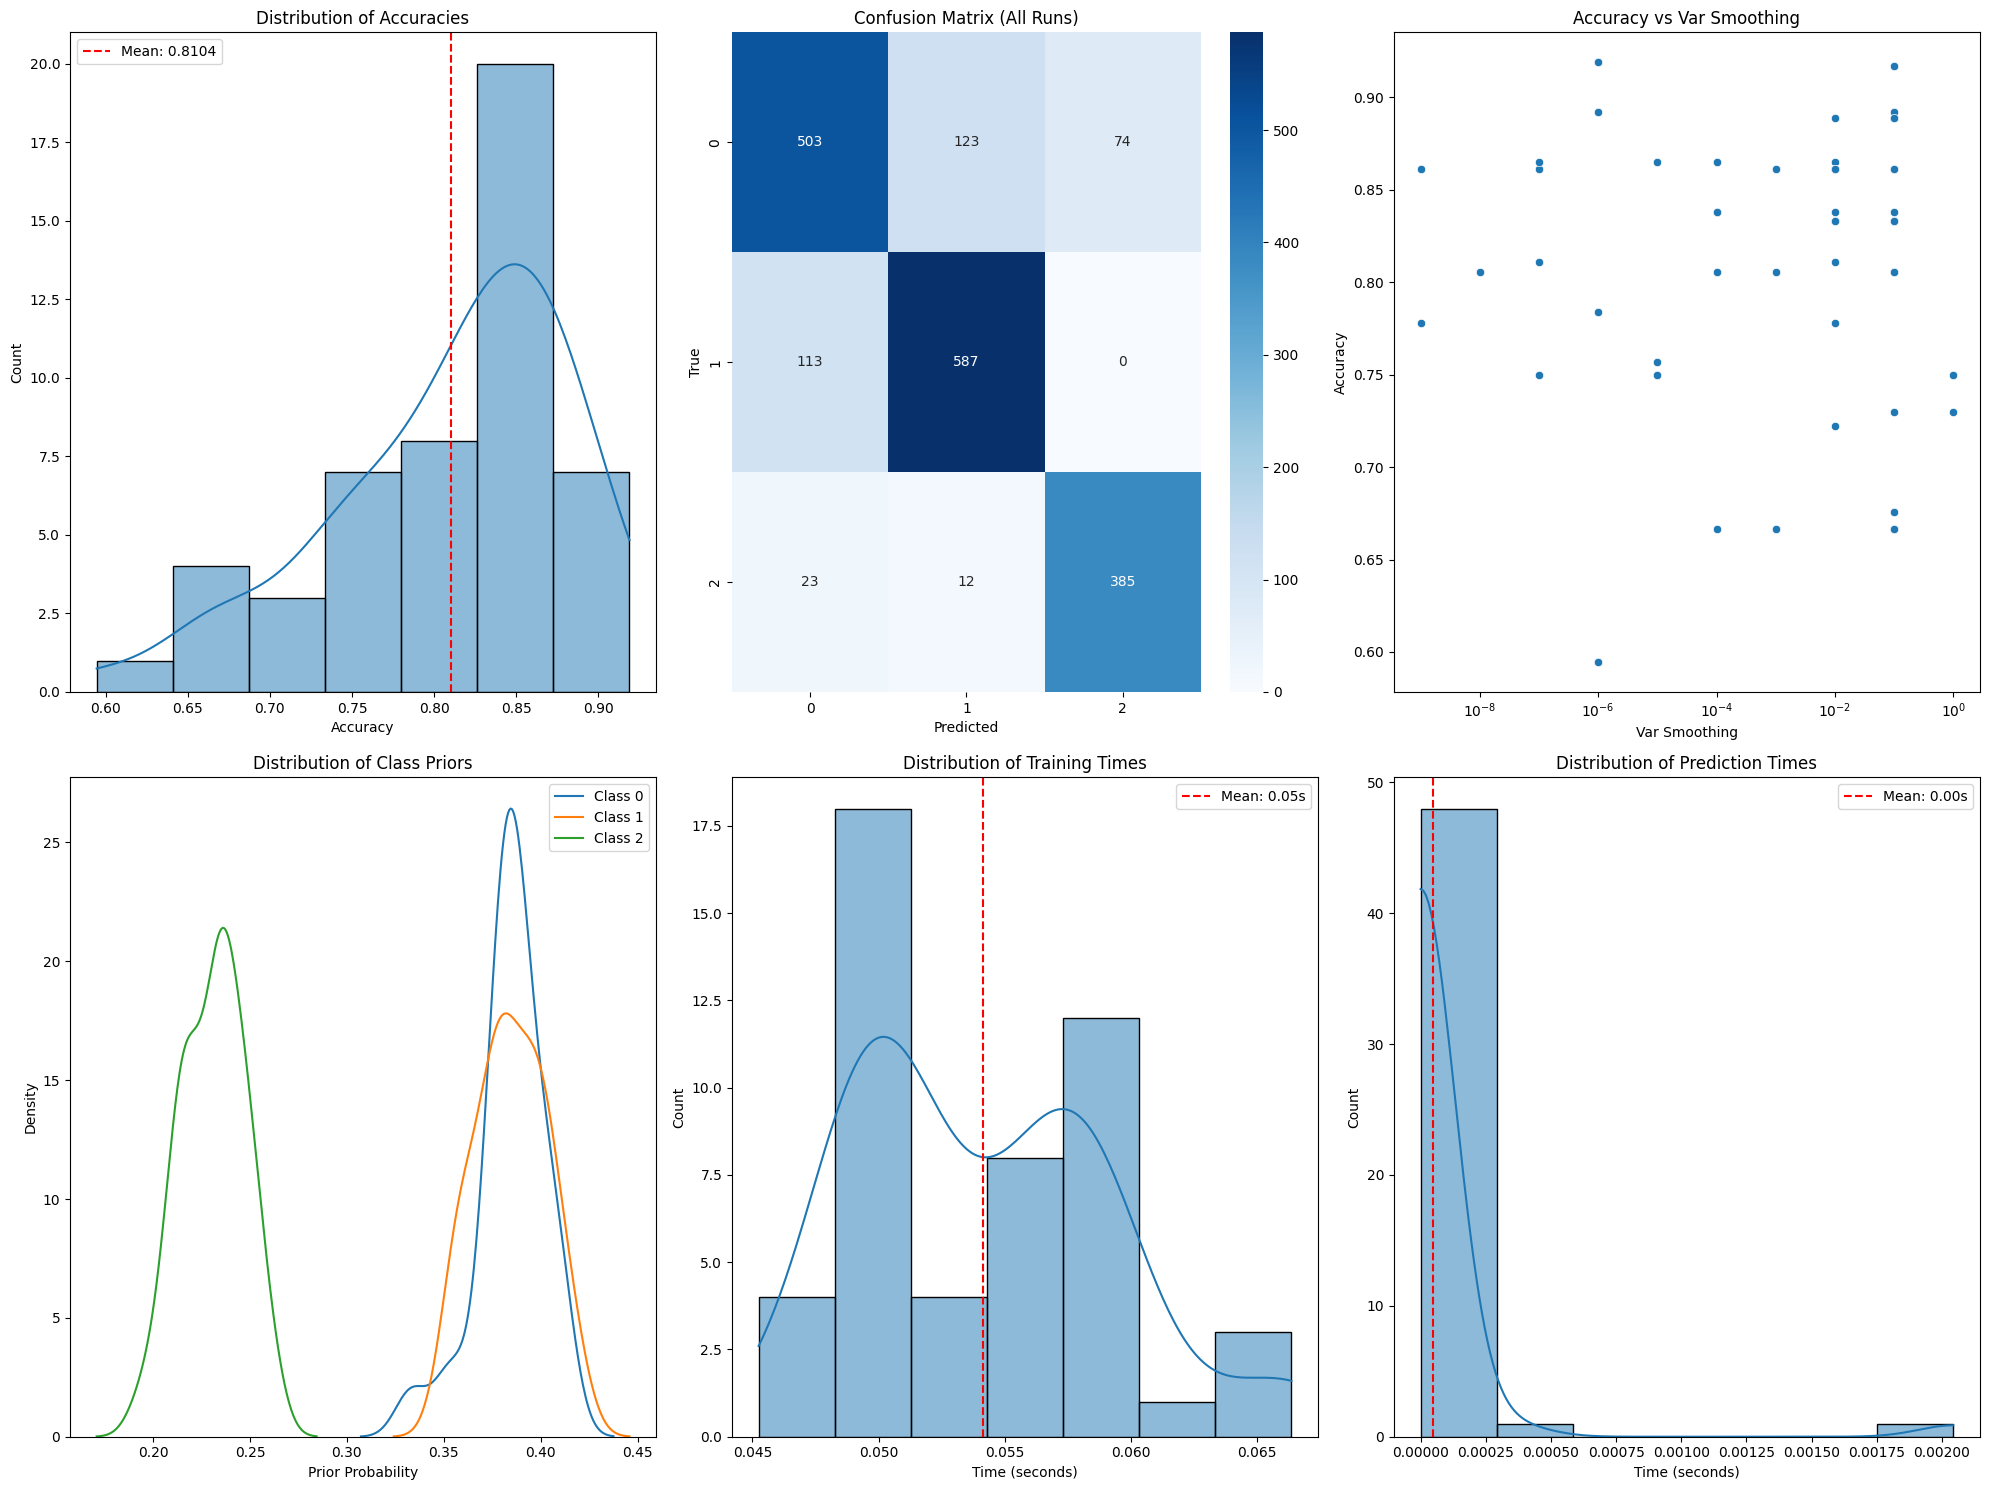


Análisis de Hiperparámetros más Frecuentes:

var_smoothing:
1.000000e-01    13
1.000000e-02    11
1.000000e-04     6
1.000000e-07     4
1.000000e-05     4
1.000000e-06     4
1.000000e-03     3
1.000000e+00     2
1.000000e-09     2
1.000000e-08     1
Name: count, dtype: int64

Resumen de Resultados:
Accuracy Media: 0.8104
Desviación Estándar: 0.0722
Intervalo de Confianza (95%): [0.6667, 0.9111]

Análisis de Estabilidad:
Coeficiente de Variación de Accuracy: 0.0891
Tiempo Medio de Entrenamiento: 0.05s
Tiempo Medio de Predicción: 0.00s

Análisis de Class Priors:
Clase 0: 0.3846 ± 0.0172
Clase 1: 0.3846 ± 0.0181
Clase 2: 0.2308 ± 0.0161

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       700
           1       0.81      0.84      0.83       700
           2       0.84      0.92      0.88       420

    accuracy                           0.81      1820
   macro avg       0.81      0.82      0.82      1820
weig

In [54]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import GridSearchCV, RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
from scipy import stats  

def create_param_grid():  
    """  
    Define el grid de hiperparámetros para Naive Bayes Gaussiano  
    """  
    return {  
        'var_smoothing': np.logspace(-9, 0, 10)  
    }  

def train_evaluate_gnb_with_hyperparams(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo Naive Bayes Gaussiano con búsqueda de hiperparámetros   
    y validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  

    # Listas para almacenar resultados  
    all_results = []  
    best_params_list = []  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
    class_priors = []  

    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  

        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear y configurar GridSearchCV  
        gnb = GaussianNB()  
        param_grid = create_param_grid()  

        grid_search = GridSearchCV(  
            gnb,  
            param_grid,  
            cv=5,  
            n_jobs=-1,  
            verbose=0,  
            scoring='accuracy'  
        )  

        # Entrenar  
        train_start = time.time()  
        grid_search.fit(X_train, y_train)  
        train_time = time.time() - train_start  

        # Predecir  
        pred_start = time.time()  
        y_pred = grid_search.predict(X_test)  
        pred_time = time.time() - pred_start  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        best_params_list.append(grid_search.best_params_)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  
        class_priors.append(grid_search.best_estimator_.class_prior_)  

        # Guardar resultados detallados  
        fold_results = {  
            'fold': fold + 1,  
            'accuracy': accuracy,  
            'training_time': train_time,  
            'prediction_time': pred_time,  
            'var_smoothing': grid_search.best_params_['var_smoothing']  
        }  
        all_results.append(fold_results)  

        fold_time = time.time() - fold_start_time  
        print(f"Accuracy del fold: {accuracy:.4f}")  
        print(f"Mejores parámetros: {grid_search.best_params_}")  
        print(f"Tiempo del fold: {fold_time:.2f}s")  

    return (pd.DataFrame(all_results), accuracies, all_predictions, all_true_values,   
            best_params_list, training_times, prediction_times, class_priors)  

def plot_results(results_df, accuracies, all_predictions, all_true_values,   
                best_params_list, training_times, prediction_times, class_priors):  
    """  
    Visualiza los resultados del análisis  
    """   
    fig = plt.figure(figsize=(20, 15))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Accuracy vs var_smoothing  
    plt.subplot(2, 3, 3)  
    sns.scatterplot(data=results_df, x='var_smoothing', y='accuracy')  
    plt.xscale('log')  
    plt.title('Accuracy vs Var Smoothing')  
    plt.xlabel('Var Smoothing')  
    plt.ylabel('Accuracy')  

    # 4. Class priors por clase  
    plt.subplot(2, 3, 4)  
    class_priors_array = np.array(class_priors)  
    for i in range(class_priors_array.shape[1]):  
        sns.kdeplot(class_priors_array[:, i], label=f'Class {i}')  
    plt.title('Distribution of Class Priors')  
    plt.xlabel('Prior Probability')  
    plt.ylabel('Density')  
    plt.legend()  

    # 5. Training times  
    plt.subplot(2, 3, 5)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    # 6. Prediction times  
    plt.subplot(2, 3, 6)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    plt.tight_layout()  
    plt.show()  

    # Análisis de hiperparámetros más frecuentes  
    print("\nAnálisis de Hiperparámetros más Frecuentes:")  
    var_smoothing_values = [params['var_smoothing'] for params in best_params_list]  
    value_counts = pd.Series(var_smoothing_values).value_counts()  
    print("\nvar_smoothing:")  
    print(value_counts)  

    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  

    # Análisis de estabilidad  
    print("\nAnálisis de Estabilidad:")  
    print(f"Coeficiente de Variación de Accuracy: {stats.variation(accuracies):.4f}")  
    print(f"Tiempo Medio de Entrenamiento: {np.mean(training_times):.2f}s")  
    print(f"Tiempo Medio de Predicción: {np.mean(prediction_times):.2f}s")  

    # Análisis de class priors  
    print("\nAnálisis de Class Priors:")  
    class_priors_mean = np.mean(class_priors_array, axis=0)  
    class_priors_std = np.std(class_priors_array, axis=0)  
    for i in range(len(class_priors_mean)):  
        print(f"Clase {i}: {class_priors_mean[i]:.4f} ± {class_priors_std[i]:.4f}")  

    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  

# Realizar el análisis  
results = train_evaluate_gnb_with_hyperparams(X, y, n_splits=5, n_repeats=10)  
results_df, accuracies, all_predictions, all_true_values, best_params_list, training_times, prediction_times, class_priors = results  

# Visualizar resultados  
plot_results(results_df, accuracies, all_predictions, all_true_values,   
            best_params_list, training_times, prediction_times, class_priors)  

# Guardar resultados  
results_df.to_csv('gnb_hyperparameter_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'gnb_hyperparameter_results_SVMSMOTE.csv'")  

# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 5. Random Forest sin hiperparámetros

Fold 1/50 - Accuracy: 0.8649 - OOB Score: 0.8414 - Training time: 0.09s - Prediction time: 0.00s
Fold 2/50 - Accuracy: 0.8649 - OOB Score: 0.8414 - Training time: 0.09s - Prediction time: 0.00s
Fold 3/50 - Accuracy: 0.8611 - OOB Score: 0.8904 - Training time: 0.12s - Prediction time: 0.00s
Fold 4/50 - Accuracy: 0.8889 - OOB Score: 0.9110 - Training time: 0.10s - Prediction time: 0.00s
Fold 5/50 - Accuracy: 0.9167 - OOB Score: 0.8562 - Training time: 0.09s - Prediction time: 0.00s
Fold 6/50 - Accuracy: 0.8378 - OOB Score: 0.8759 - Training time: 0.09s - Prediction time: 0.01s
Fold 7/50 - Accuracy: 0.8108 - OOB Score: 0.9034 - Training time: 0.09s - Prediction time: 0.01s
Fold 8/50 - Accuracy: 0.9167 - OOB Score: 0.8562 - Training time: 0.10s - Prediction time: 0.00s
Fold 9/50 - Accuracy: 0.9444 - OOB Score: 0.8767 - Training time: 0.10s - Prediction time: 0.00s
Fold 10/50 - Accuracy: 0.8889 - OOB Score: 0.8562 - Training time: 0.09s - Prediction time: 0.01s
Fold 11/50 - Accuracy: 0.9189

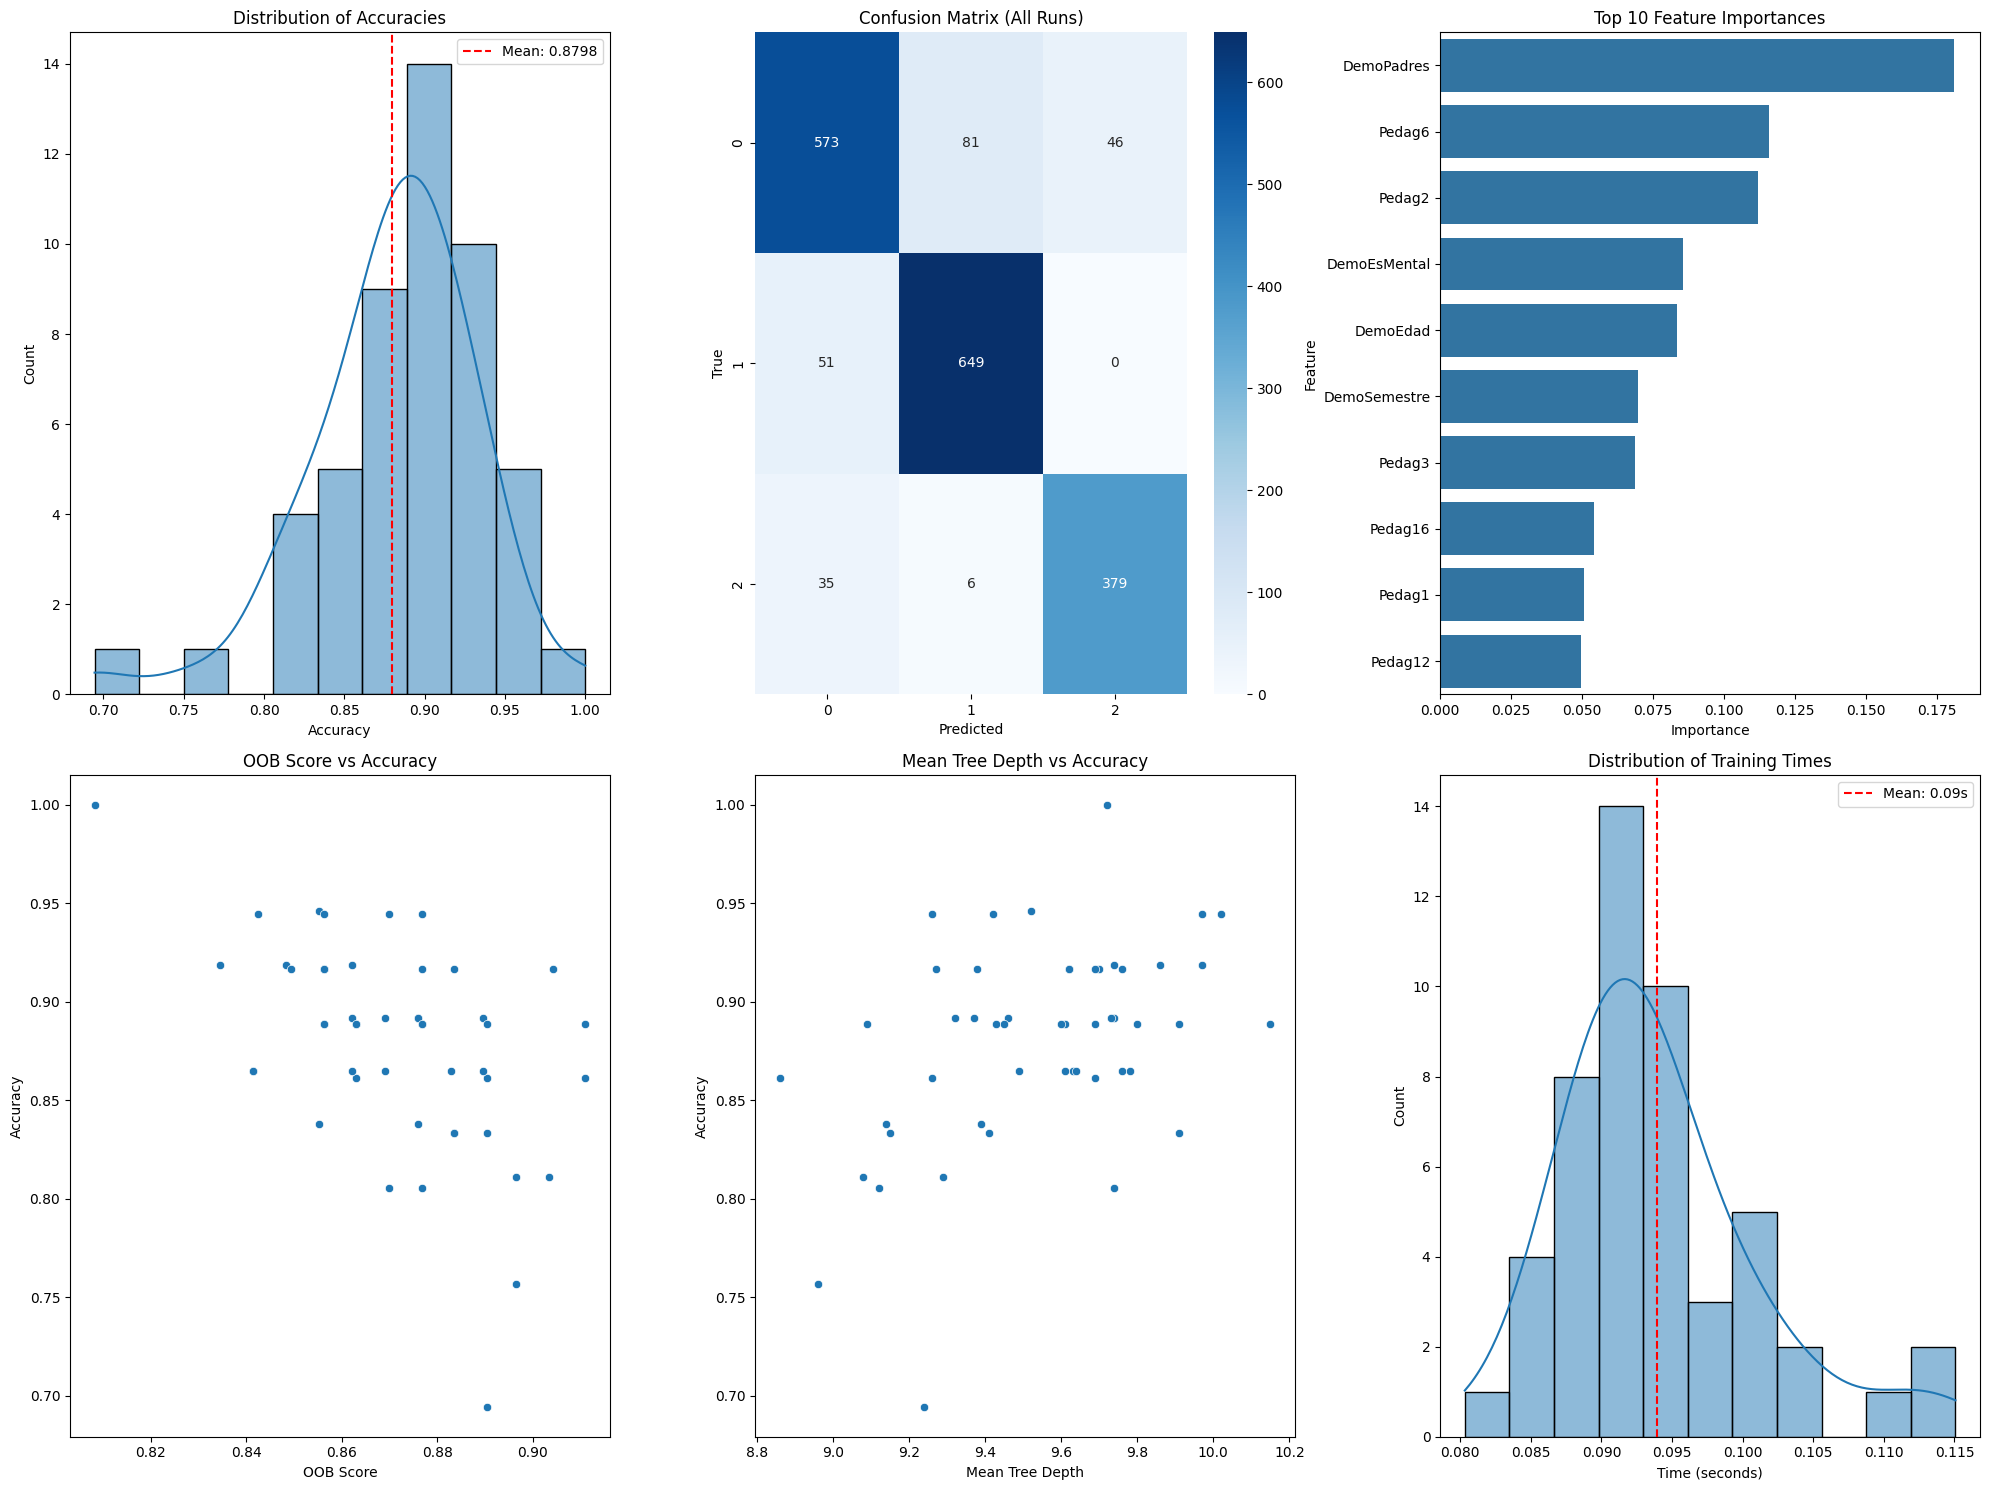


Resumen de Resultados:
Accuracy Media: 0.8798
Desviación Estándar: 0.0517
Intervalo de Confianza (95%): [0.7677, 0.9456]

Análisis de Estabilidad:
Coeficiente de Variación de Accuracy: 0.0587
OOB Score Medio: 0.8707
Profundidad Media de Árboles: 9.54
Tiempo Medio de Entrenamiento: 0.09s
Tiempo Medio de Predicción: 0.00s

Top 10 Características más Importantes:
         Feature  Importance       Std
4     DemoPadres    0.181175  0.016058
9         Pedag6    0.115748  0.013757
7         Pedag2    0.112134  0.012073
5   DemoEsMental    0.085408  0.012047
1       DemoEdad    0.083388  0.007903
3   DemoSemestre    0.069702  0.008117
8         Pedag3    0.068564  0.007185
12       Pedag16    0.054276  0.004968
6         Pedag1    0.050718  0.004992
10       Pedag12    0.049567  0.004361

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       700
           1       0.88      0.93      0.90       700
           2     

In [55]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
from scipy import stats  

def train_evaluate_rf_multiple_times(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo Random Forest múltiples veces usando validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(  
        n_splits=n_splits,  
        n_repeats=n_repeats,  
        random_state=42  
    )  

    # Listas para almacenar resultados  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
    feature_importances = []  
    oob_scores = []  
    tree_depths = []  

    # Para cada fold en la validación cruzada  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        # Dividir los datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear y entrenar el modelo  
        rf = RandomForestClassifier(  
            n_estimators=100,  
            oob_score=True,  
            random_state=42  
        )  

        # Medir tiempo de entrenamiento  
        train_start = time.time()  
        rf.fit(X_train, y_train)  
        train_time = time.time() - train_start  

        # Medir tiempo de predicción  
        pred_start = time.time()  
        y_pred = rf.predict(X_test)  
        pred_time = time.time() - pred_start  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  
        feature_importances.append(rf.feature_importances_)  
        oob_scores.append(rf.oob_score_)  

        # Calcular profundidad media de los árboles  
        tree_depths.append(np.mean([tree.get_depth() for tree in rf.estimators_]))  

        # Imprimir progreso  
        print(f'Fold {fold+1}/{n_splits*n_repeats} - Accuracy: {accuracy:.4f} - '  
              f'OOB Score: {rf.oob_score_:.4f} - '  
              f'Training time: {train_time:.2f}s - Prediction time: {pred_time:.2f}s')  

    return (accuracies, all_predictions, all_true_values, training_times,   
            prediction_times, feature_importances, oob_scores, tree_depths)  

def plot_results(accuracies, all_predictions, all_true_values, training_times,   
                prediction_times, feature_importances, oob_scores, tree_depths, feature_names=None):  
    """  
    Visualiza los resultados de las múltiples ejecuciones  
    """  
      
    fig = plt.figure(figsize=(20, 15))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Importancia de características  
    plt.subplot(2, 3, 3)  
    mean_importances = np.mean(feature_importances, axis=0)  
    std_importances = np.std(feature_importances, axis=0)  
    if feature_names is None:  
        feature_names = [f'Feature {i}' for i in range(len(mean_importances))]  

    importance_df = pd.DataFrame({  
        'Feature': feature_names,  
        'Importance': mean_importances,  
        'Std': std_importances  
    }).sort_values('Importance', ascending=False)  

    sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')  
    plt.title('Top 10 Feature Importances')  

    # 4. OOB Score vs Accuracy  
    plt.subplot(2, 3, 4)  
    sns.scatterplot(x=oob_scores, y=accuracies)  
    plt.title('OOB Score vs Accuracy')  
    plt.xlabel('OOB Score')  
    plt.ylabel('Accuracy')  

    # 5. Profundidad de árboles vs Accuracy  
    plt.subplot(2, 3, 5)  
    sns.scatterplot(x=tree_depths, y=accuracies)  
    plt.title('Mean Tree Depth vs Accuracy')  
    plt.xlabel('Mean Tree Depth')  
    plt.ylabel('Accuracy')  

    # 6. Tiempos de entrenamiento  
    plt.subplot(2, 3, 6)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    plt.tight_layout()  
    plt.show()  

    # Imprimir estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  

    # Análisis de estabilidad  
    print("\nAnálisis de Estabilidad:")  
    print(f"Coeficiente de Variación de Accuracy: {stats.variation(accuracies):.4f}")  
    print(f"OOB Score Medio: {np.mean(oob_scores):.4f}")  
    print(f"Profundidad Media de Árboles: {np.mean(tree_depths):.2f}")  
    print(f"Tiempo Medio de Entrenamiento: {np.mean(training_times):.2f}s")  
    print(f"Tiempo Medio de Predicción: {np.mean(prediction_times):.2f}s")  

    # Top 10 características más importantes  
    print("\nTop 10 Características más Importantes:")  
    print(importance_df.head(10))  

    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  

# Obtener nombres de características si están disponibles  
try:  
    feature_names = X_train_norm_SVMSMOTE.columns.tolist()  
except AttributeError:  
    feature_names = None  

# Realizar múltiples ejecuciones  
results = train_evaluate_rf_multiple_times(X, y, n_splits=5, n_repeats=10)  
accuracies, all_predictions, all_true_values, training_times, prediction_times, feature_importances, oob_scores, tree_depths = results  

# Visualizar resultados  
plot_results(accuracies, all_predictions, all_true_values, training_times,  prediction_times, feature_importances, oob_scores, tree_depths, feature_names)  

# Guardar resultados en un DataFrame  
results_df = pd.DataFrame({  
    'Fold': range(1, len(accuracies) + 1),  
    'Accuracy': accuracies,  
    'OOB_Score': oob_scores,  
    'Mean_Tree_Depth': tree_depths,  
    'Training_Time': training_times,  
    'Prediction_Time': prediction_times  
})  

# Guardar importancia de características  
feature_importance_df = pd.DataFrame(  
    feature_importances,  
    columns=feature_names if feature_names else [f'Feature_{i}' for i in range(X.shape[1])]  
)  

# Guardar resultados en CSV  
results_df.to_csv('rf_multiple_runs_results_SVMSMOTE.csv', index=False)  
feature_importance_df.to_csv('rf_feature_importances_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'rf_multiple_runs_results_SVMSMOTE.csv' y 'rf_feature_importances_SVMSMOTE.csv'")  

# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 5.1. Random Forest con hiperparámetros


Procesando fold 1/50
Accuracy del fold: 0.8919
Mejores parámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'oob_score': True}
Tiempo del fold: 17.00s

Procesando fold 2/50
Accuracy del fold: 0.8649
Mejores parámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'oob_score': True}
Tiempo del fold: 19.57s

Procesando fold 3/50
Accuracy del fold: 0.8611
Mejores parámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True}
Tiempo del fold: 18.72s

Procesando fold 4/50
Accuracy del fold: 0.8889
Mejores parámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'oob_score': True}
Tiempo del fold: 18.38s

Procesando fold 5/50
Accuracy del fold: 0.9167
Mejores parámetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'mi

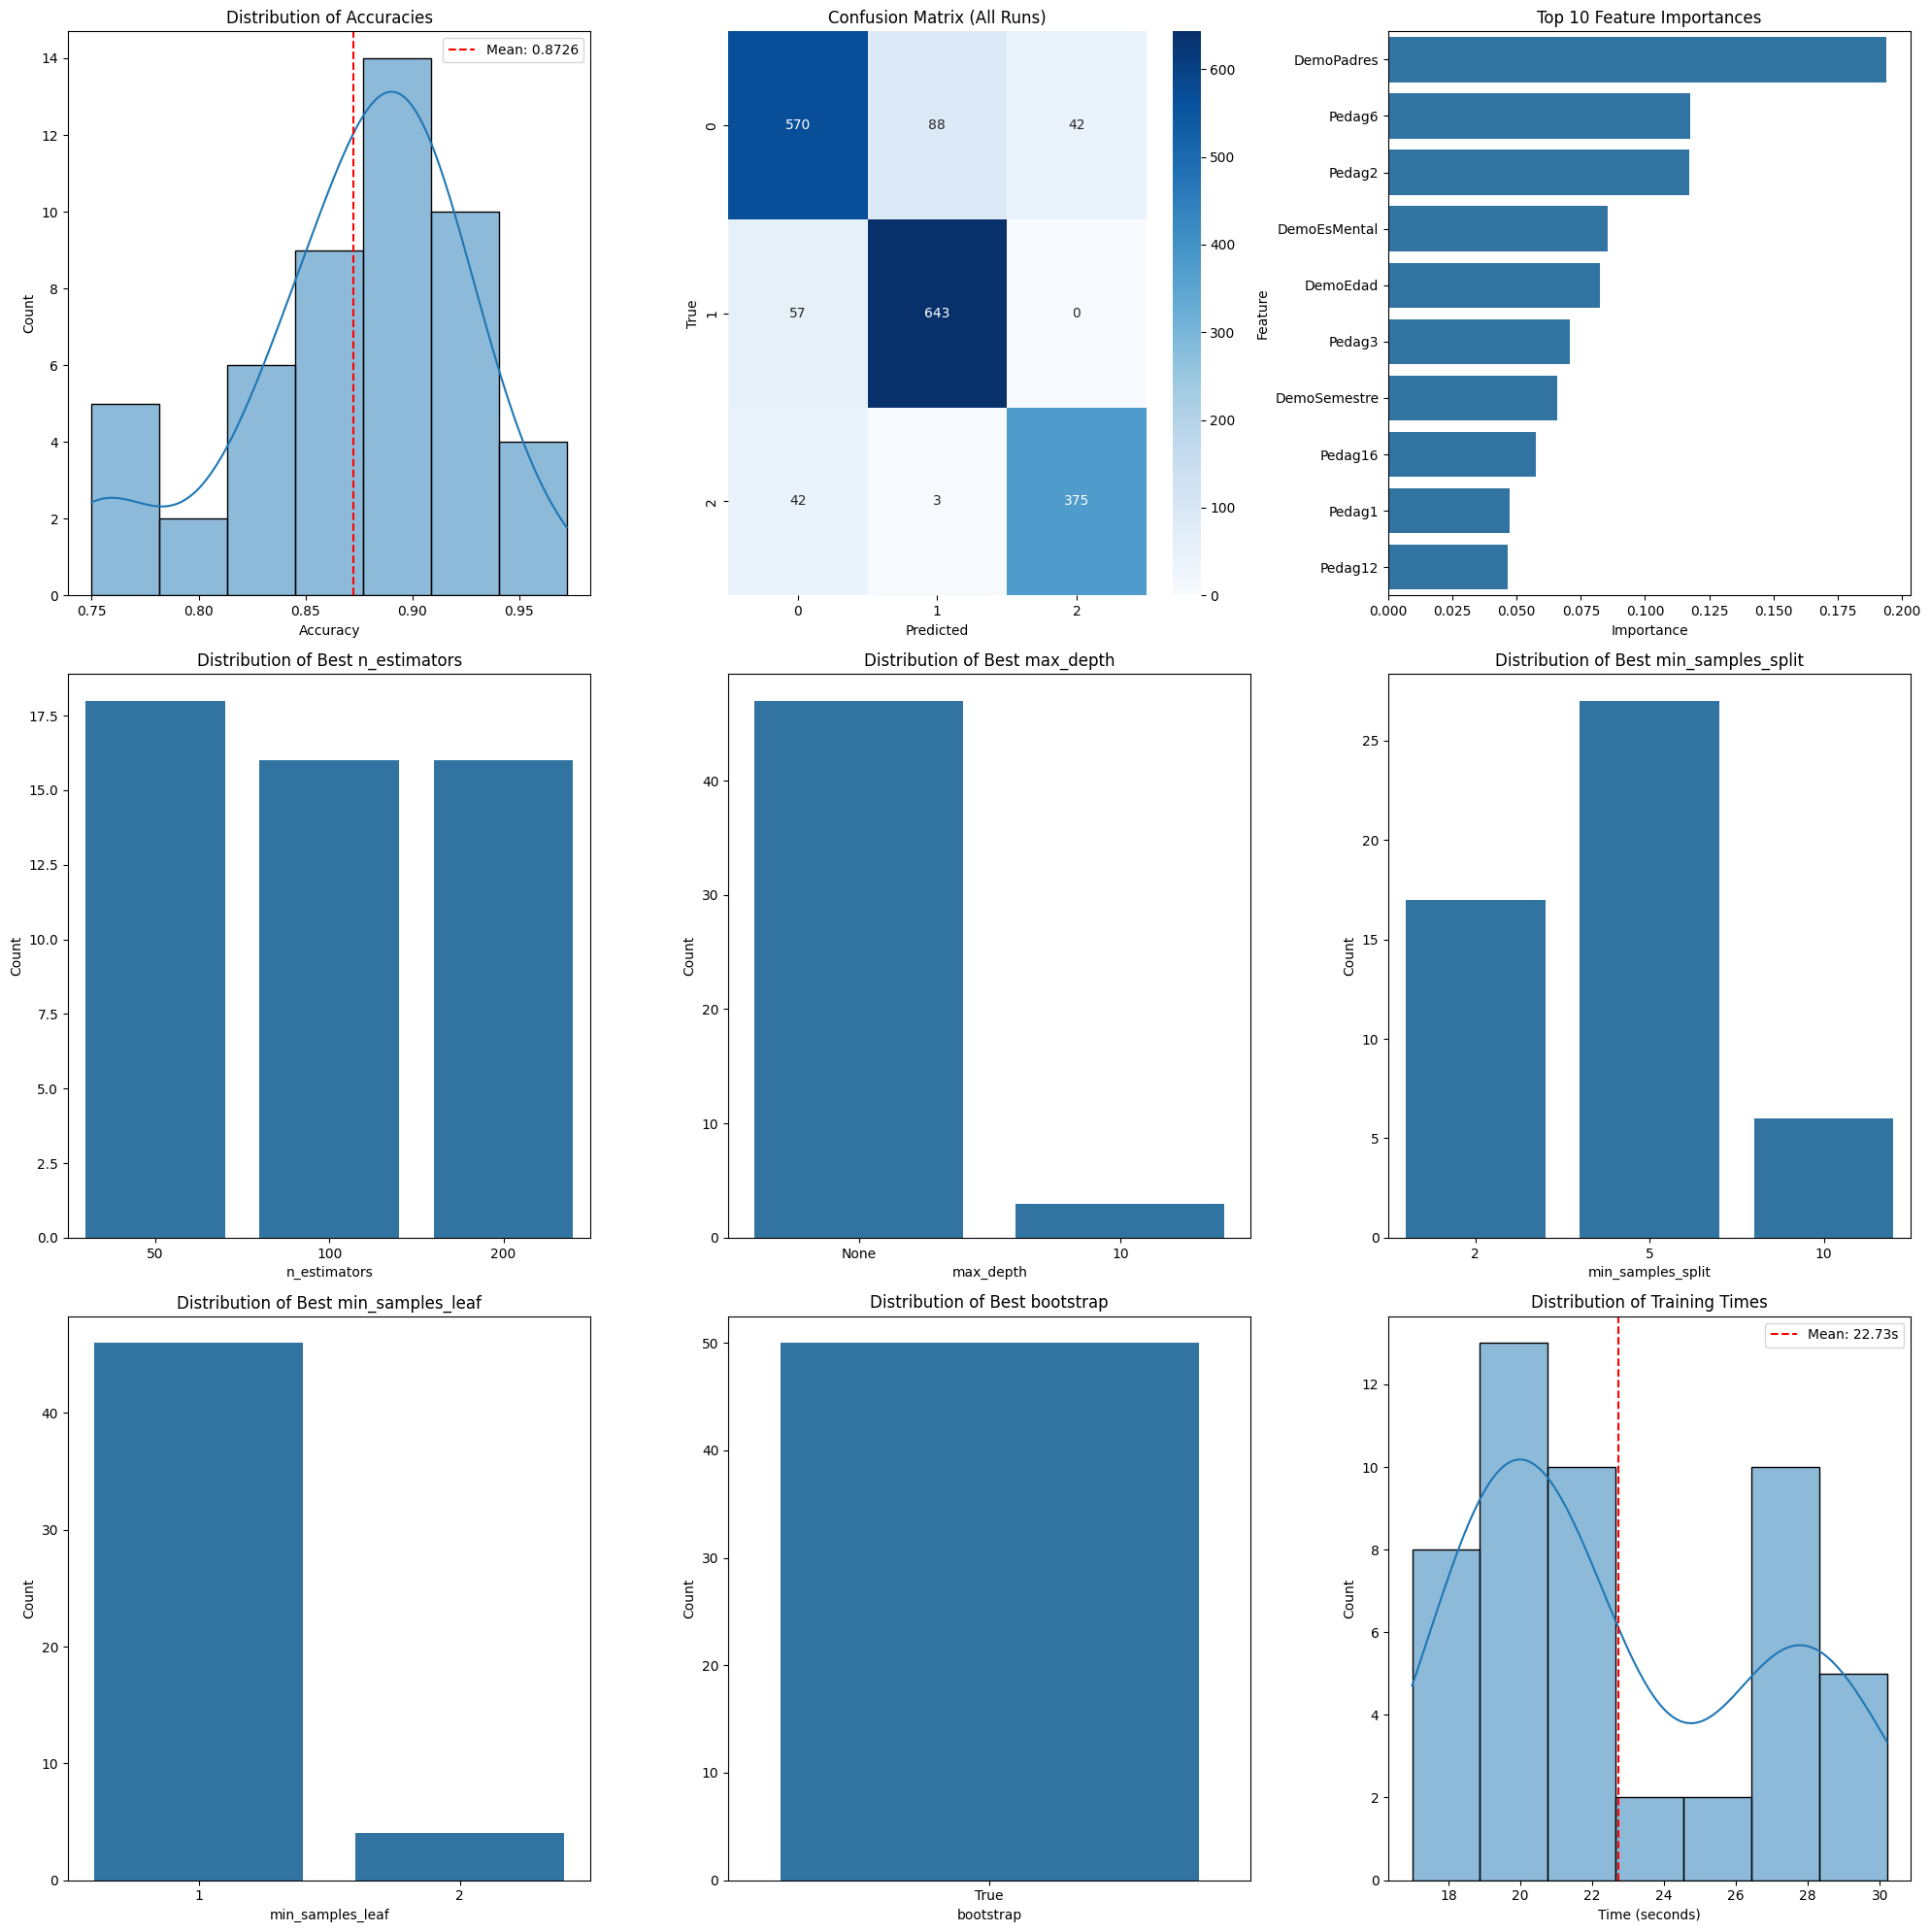


Análisis de Hiperparámetros más Frecuentes:

bootstrap:
True    50
Name: count, dtype: int64

max_depth:
10.0    3
Name: count, dtype: int64

min_samples_leaf:
1    46
2     4
Name: count, dtype: int64

min_samples_split:
5     27
2     17
10     6
Name: count, dtype: int64

n_estimators:
50     18
100    16
200    16
Name: count, dtype: int64

oob_score:
True    50
Name: count, dtype: int64

Resumen de Resultados:
Accuracy Media: 0.8726
Desviación Estándar: 0.0518
Intervalo de Confianza (95%): [0.7500, 0.9459]

Análisis de Estabilidad:
Coeficiente de Variación de Accuracy: 0.0594
OOB Score Medio: 0.8743
Tiempo Medio de Entrenamiento: 22.73s
Tiempo Medio de Predicción: 0.01s

Top 10 Características más Importantes:
         Feature  Importance       Std
4     DemoPadres    0.193905  0.020714
9         Pedag6    0.117617  0.015503
7         Pedag2    0.117107  0.013853
5   DemoEsMental    0.085410  0.013532
1       DemoEdad    0.082277  0.008497
8         Pedag3    0.070564  0.008029
3

In [56]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import GridSearchCV, RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
from scipy import stats  
  
def create_param_grid():  
    """  
    Define el grid de hiperparámetros para Random Forest  
    """  
    return {  
        'n_estimators': [50, 100, 200],  
        'max_depth': [None, 10, 20, 30],  
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4],  
        'bootstrap': [True, False],
        'oob_score': [True]  # Añadimos este parámetro  
    }  
  
def train_evaluate_rf_with_hyperparams(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo Random Forest con búsqueda de hiperparámetros   
    y validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  
      
    # Listas para almacenar resultados  
    all_results = []  
    best_params_list = []  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
    feature_importances = []  
    oob_scores = []  
      
    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  
          
        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  
          
        # Crear y configurar GridSearchCV  
        rf = RandomForestClassifier(random_state=42, oob_score=True)  
        param_grid = create_param_grid()  
          
        grid_search = GridSearchCV(  
            rf,  
            param_grid,  
            cv=5,  
            n_jobs=-1,  
            verbose=0,  
            scoring='accuracy'  
        )  
          
        # Entrenar  
        train_start = time.time()  
        grid_search.fit(X_train, y_train)  
        train_time = time.time() - train_start  
          
        # Predecir  
        pred_start = time.time()  
        y_pred = grid_search.predict(X_test)  
        pred_time = time.time() - pred_start  
          
        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        best_params_list.append(grid_search.best_params_)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  
        feature_importances.append(grid_search.best_estimator_.feature_importances_)  
          
        # Calcular OOB score si está disponible  
        if grid_search.best_params_['bootstrap']:  
            try:  
                oob_scores.append(grid_search.best_estimator_.oob_score_)  
            except AttributeError:  
                oob_scores.append(None)  
        else:  
            oob_scores.append(None) 
          
        # Guardar resultados detallados  
        fold_results = {  
            'fold': fold + 1,  
            'accuracy': accuracy,  
            'training_time': train_time,  
            'prediction_time': pred_time,  
            **grid_search.best_params_  
        }  
        all_results.append(fold_results)  
          
        fold_time = time.time() - fold_start_time  
        print(f"Accuracy del fold: {accuracy:.4f}")  
        print(f"Mejores parámetros: {grid_search.best_params_}")  
        print(f"Tiempo del fold: {fold_time:.2f}s")  
      
    return (pd.DataFrame(all_results), accuracies, all_predictions, all_true_values,   
            best_params_list, training_times, prediction_times, feature_importances, oob_scores)  
  
def plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list,   
                training_times, prediction_times, feature_importances, oob_scores, feature_names=None):  
    """  
    Visualiza los resultados del análisis  
    """  
     
    fig = plt.figure(figsize=(20, 20))  
      
    # 1. Distribución de accuracies  
    plt.subplot(3, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  
      
    # 2. Matriz de confusión  
    plt.subplot(3, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  
      
    # 3. Importancia de características  
    plt.subplot(3, 3, 3)  
    mean_importances = np.mean(feature_importances, axis=0)  
    std_importances = np.std(feature_importances, axis=0)  
    if feature_names is None:  
        feature_names = [f'Feature {i}' for i in range(len(mean_importances))]  
      
    importance_df = pd.DataFrame({  
        'Feature': feature_names,  
        'Importance': mean_importances,  
        'Std': std_importances  
    }).sort_values('Importance', ascending=False)  
      
    sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')  
    plt.title('Top 10 Feature Importances')  
      
    # 4. Distribución de n_estimators  
    plt.subplot(3, 3, 4)  
    n_estimators = [params['n_estimators'] for params in best_params_list]  
    sns.countplot(x=n_estimators)  
    plt.title('Distribution of Best n_estimators')  
    plt.xlabel('n_estimators')  
    plt.ylabel('Count')  
      
    # 5. Distribución de max_depth  
    plt.subplot(3, 3, 5)  
    max_depth = [str(params['max_depth']) for params in best_params_list]  
    sns.countplot(x=max_depth)  
    plt.title('Distribution of Best max_depth')  
    plt.xlabel('max_depth')  
    plt.ylabel('Count')  
      
    # 6. Distribución de min_samples_split  
    plt.subplot(3, 3, 6)  
    min_samples_split = [params['min_samples_split'] for params in best_params_list]  
    sns.countplot(x=min_samples_split)  
    plt.title('Distribution of Best min_samples_split')  
    plt.xlabel('min_samples_split')  
    plt.ylabel('Count')  
      
    # 7. Distribución de min_samples_leaf  
    plt.subplot(3, 3, 7)  
    min_samples_leaf = [params['min_samples_leaf'] for params in best_params_list]  
    sns.countplot(x=min_samples_leaf)  
    plt.title('Distribution of Best min_samples_leaf')  
    plt.xlabel('min_samples_leaf')  
    plt.ylabel('Count')  
      
    # 8. Distribución de bootstrap  
    plt.subplot(3, 3, 8)  
    bootstrap = [params['bootstrap'] for params in best_params_list]  
    sns.countplot(x=bootstrap)  
    plt.title('Distribution of Best bootstrap')  
    plt.xlabel('bootstrap')  
    plt.ylabel('Count')  
      
    # 9. Tiempos de entrenamiento  
    plt.subplot(3, 3, 9)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  
      
    plt.tight_layout()  
    plt.show()  
      
    # Análisis de hiperparámetros más frecuentes  
    print("\nAnálisis de Hiperparámetros más Frecuentes:")  
    for param in best_params_list[0].keys():  
        values = [params[param] for params in best_params_list]  
        value_counts = pd.Series(values).value_counts()  
        print(f"\n{param}:")  
        print(value_counts)  
      
    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  
      
    # Análisis de estabilidad  
    print("\nAnálisis de Estabilidad:")  
    print(f"Coeficiente de Variación de Accuracy: {stats.variation(accuracies):.4f}")  
    if any(score is not None for score in oob_scores):  
        valid_oob_scores = [score for score in oob_scores if score is not None]  
        print(f"OOB Score Medio: {np.mean(valid_oob_scores):.4f}")  
    print(f"Tiempo Medio de Entrenamiento: {np.mean(training_times):.2f}s")  
    print(f"Tiempo Medio de Predicción: {np.mean(prediction_times):.2f}s")  
      
    # Top 10 características más importantes  
    print("\nTop 10 Características más Importantes:")  
    print(importance_df.head(10))  
      
    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  
  
# Ejecutar el análisis  
start_time = time.time()  
  
# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  
  
# Obtener nombres de características si están disponibles  
try:  
    feature_names = X_train_norm_SVMSMOTE.columns.tolist()  
except AttributeError:  
    feature_names = None  
  
# Realizar el análisis  
results = train_evaluate_rf_with_hyperparams(X, y, n_splits=5, n_repeats=10)  
results_df, accuracies, all_predictions, all_true_values, best_params_list, training_times, prediction_times, feature_importances, oob_scores = results  
  
# Visualizar resultados  
plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list,  
            training_times, prediction_times, feature_importances, oob_scores, feature_names)  
  
# Guardar resultados  
results_df.to_csv('rf_hyperparameter_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'rf_hyperparameter_results_SVMSMOTE.csv'")  
  
# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 6. XGBoost sin hiperparámetros


Procesando fold 1/50
Accuracy del fold: 0.8378
Tiempo del fold: 0.13s

Procesando fold 2/50
Accuracy del fold: 0.8919
Tiempo del fold: 0.10s

Procesando fold 3/50
Accuracy del fold: 0.8333
Tiempo del fold: 0.07s

Procesando fold 4/50
Accuracy del fold: 0.8333
Tiempo del fold: 0.08s

Procesando fold 5/50
Accuracy del fold: 0.8889
Tiempo del fold: 0.15s

Procesando fold 6/50
Accuracy del fold: 0.8919
Tiempo del fold: 0.10s

Procesando fold 7/50
Accuracy del fold: 0.8108
Tiempo del fold: 0.09s

Procesando fold 8/50
Accuracy del fold: 0.8611
Tiempo del fold: 0.13s

Procesando fold 9/50
Accuracy del fold: 0.9167
Tiempo del fold: 0.09s

Procesando fold 10/50
Accuracy del fold: 0.9167
Tiempo del fold: 0.08s

Procesando fold 11/50
Accuracy del fold: 0.9730
Tiempo del fold: 0.10s

Procesando fold 12/50
Accuracy del fold: 0.8919
Tiempo del fold: 0.09s

Procesando fold 13/50
Accuracy del fold: 0.9167
Tiempo del fold: 0.11s

Procesando fold 14/50
Accuracy del fold: 0.7222
Tiempo del fold: 0.08s



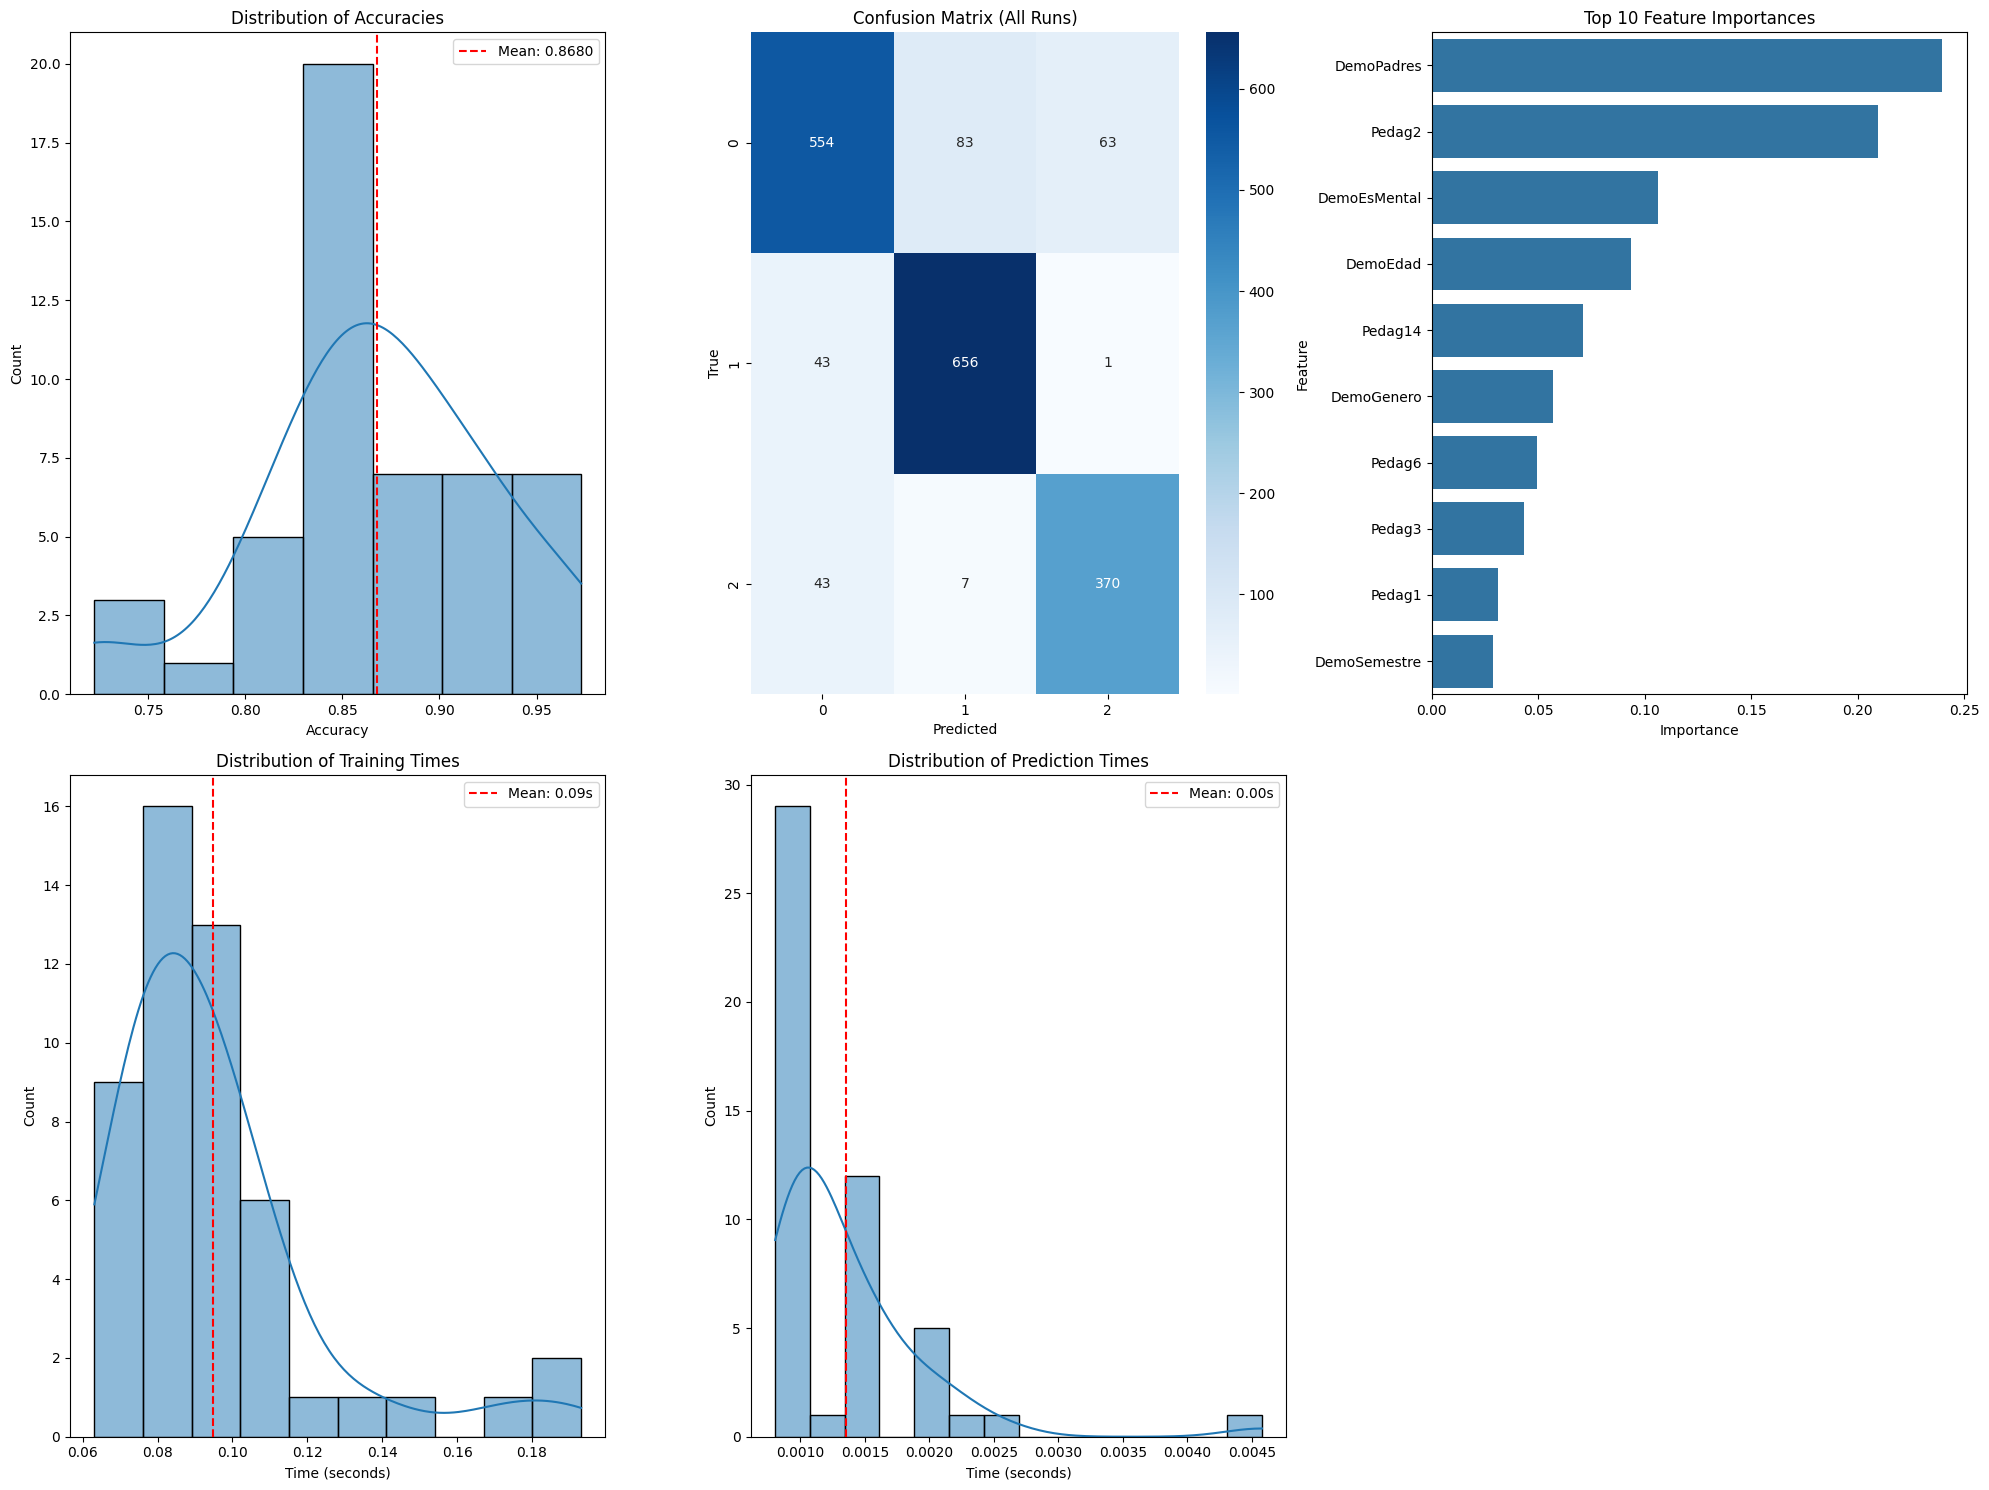


Resumen de Resultados:
Accuracy Media: 0.8680
Desviación Estándar: 0.0601
Intervalo de Confianza (95%): [0.7222, 0.9728]

Top 10 Características más Importantes:
         Feature  Importance       Std
4     DemoPadres    0.239362  0.038711
7         Pedag2    0.209543  0.038926
5   DemoEsMental    0.106166  0.021756
1       DemoEdad    0.093509  0.019708
11       Pedag14    0.071260  0.031691
2     DemoGenero    0.057133  0.020194
9         Pedag6    0.049382  0.028853
8         Pedag3    0.043131  0.013779
6         Pedag1    0.031037  0.009658
3   DemoSemestre    0.028964  0.008543

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       700
           1       0.88      0.94      0.91       700
           2       0.85      0.88      0.87       420

    accuracy                           0.87      1820
   macro avg       0.87      0.87      0.87      1820
weighted avg       0.87      0.87      0.87      1820



In [57]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import xgboost as xgb  
from sklearn.model_selection import RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
from scipy import stats  

def train_evaluate_xgb(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo XGBoost con validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  

    # Listas para almacenar resultados  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
    feature_importances = []  

    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  

        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear el modelo  
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)  

        # Entrenar  
        train_start = time.time()  
        model.fit(X_train, y_train)  
        train_time = time.time() - train_start  

        # Predecir  
        pred_start = time.time()  
        y_pred = model.predict(X_test)  
        pred_time = time.time() - pred_start  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  
        feature_importances.append(model.feature_importances_)  

        fold_time = time.time() - fold_start_time  
        print(f"Accuracy del fold: {accuracy:.4f}")  
        print(f"Tiempo del fold: {fold_time:.2f}s")  

    return (accuracies, all_predictions, all_true_values, training_times, prediction_times, feature_importances)  

def plot_results(accuracies, all_predictions, all_true_values, training_times,   
                prediction_times, feature_importances, feature_names=None):  
    """  
    Visualiza los resultados del análisis  
    """    
    fig = plt.figure(figsize=(20, 15))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Importancia de características  
    plt.subplot(2, 3, 3)  
    mean_importances = np.mean(feature_importances, axis=0)  
    std_importances = np.std(feature_importances, axis=0)  
    if feature_names is None:  
        feature_names = [f'Feature {i}' for i in range(len(mean_importances))]  

    importance_df = pd.DataFrame({  
        'Feature': feature_names,  
        'Importance': mean_importances,  
        'Std': std_importances  
    }).sort_values('Importance', ascending=False)  

    sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')  
    plt.title('Top 10 Feature Importances')  

    # 4. Tiempos de entrenamiento  
    plt.subplot(2, 3, 4)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    # 5. Tiempos de predicción  
    plt.subplot(2, 3, 5)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    plt.tight_layout()  
    plt.show()  

    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  

    # Top 10 características más importantes  
    print("\nTop 10 Características más Importantes:")  
    print(importance_df.head(10))  

    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  

# Obtener nombres de características si están disponibles  
try:  
    feature_names = X_train_norm_SVMSMOTE.columns.tolist()  
except AttributeError:  
    feature_names = None  

# Realizar el análisis  
results = train_evaluate_xgb(X, y, n_splits=5, n_repeats=10)  
accuracies, all_predictions, all_true_values, training_times, prediction_times, feature_importances = results  

# Visualizar resultados  
plot_results(accuracies, all_predictions, all_true_values, training_times,   
            prediction_times, feature_importances, feature_names)  

# Guardar resultados  
results_df = pd.DataFrame({  
    'Fold': range(1, len(accuracies) + 1),  
    'Accuracy': accuracies,  
    'Training_Time': training_times,  
    'Prediction_Time': prediction_times  
})  
results_df.to_csv('xgb_cv_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'xgb_cv_results_SVMSMOTE.csv'")  

# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 6.1.  XGBoost con hiperparámetros


Procesando fold 1/50
Accuracy del fold: 0.8919
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Tiempo del fold: 7.96s

Procesando fold 2/50
Accuracy del fold: 0.8649
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Tiempo del fold: 5.60s

Procesando fold 3/50
Accuracy del fold: 0.8333
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Tiempo del fold: 6.97s

Procesando fold 4/50
Accuracy del fold: 0.8611
Mejores parámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Tiempo del fold: 6.47s

Procesando fold 5/50
Accuracy del fold: 0.8889
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Tiempo del fold: 6.66s

Procesando fold 6/50
Accuracy de

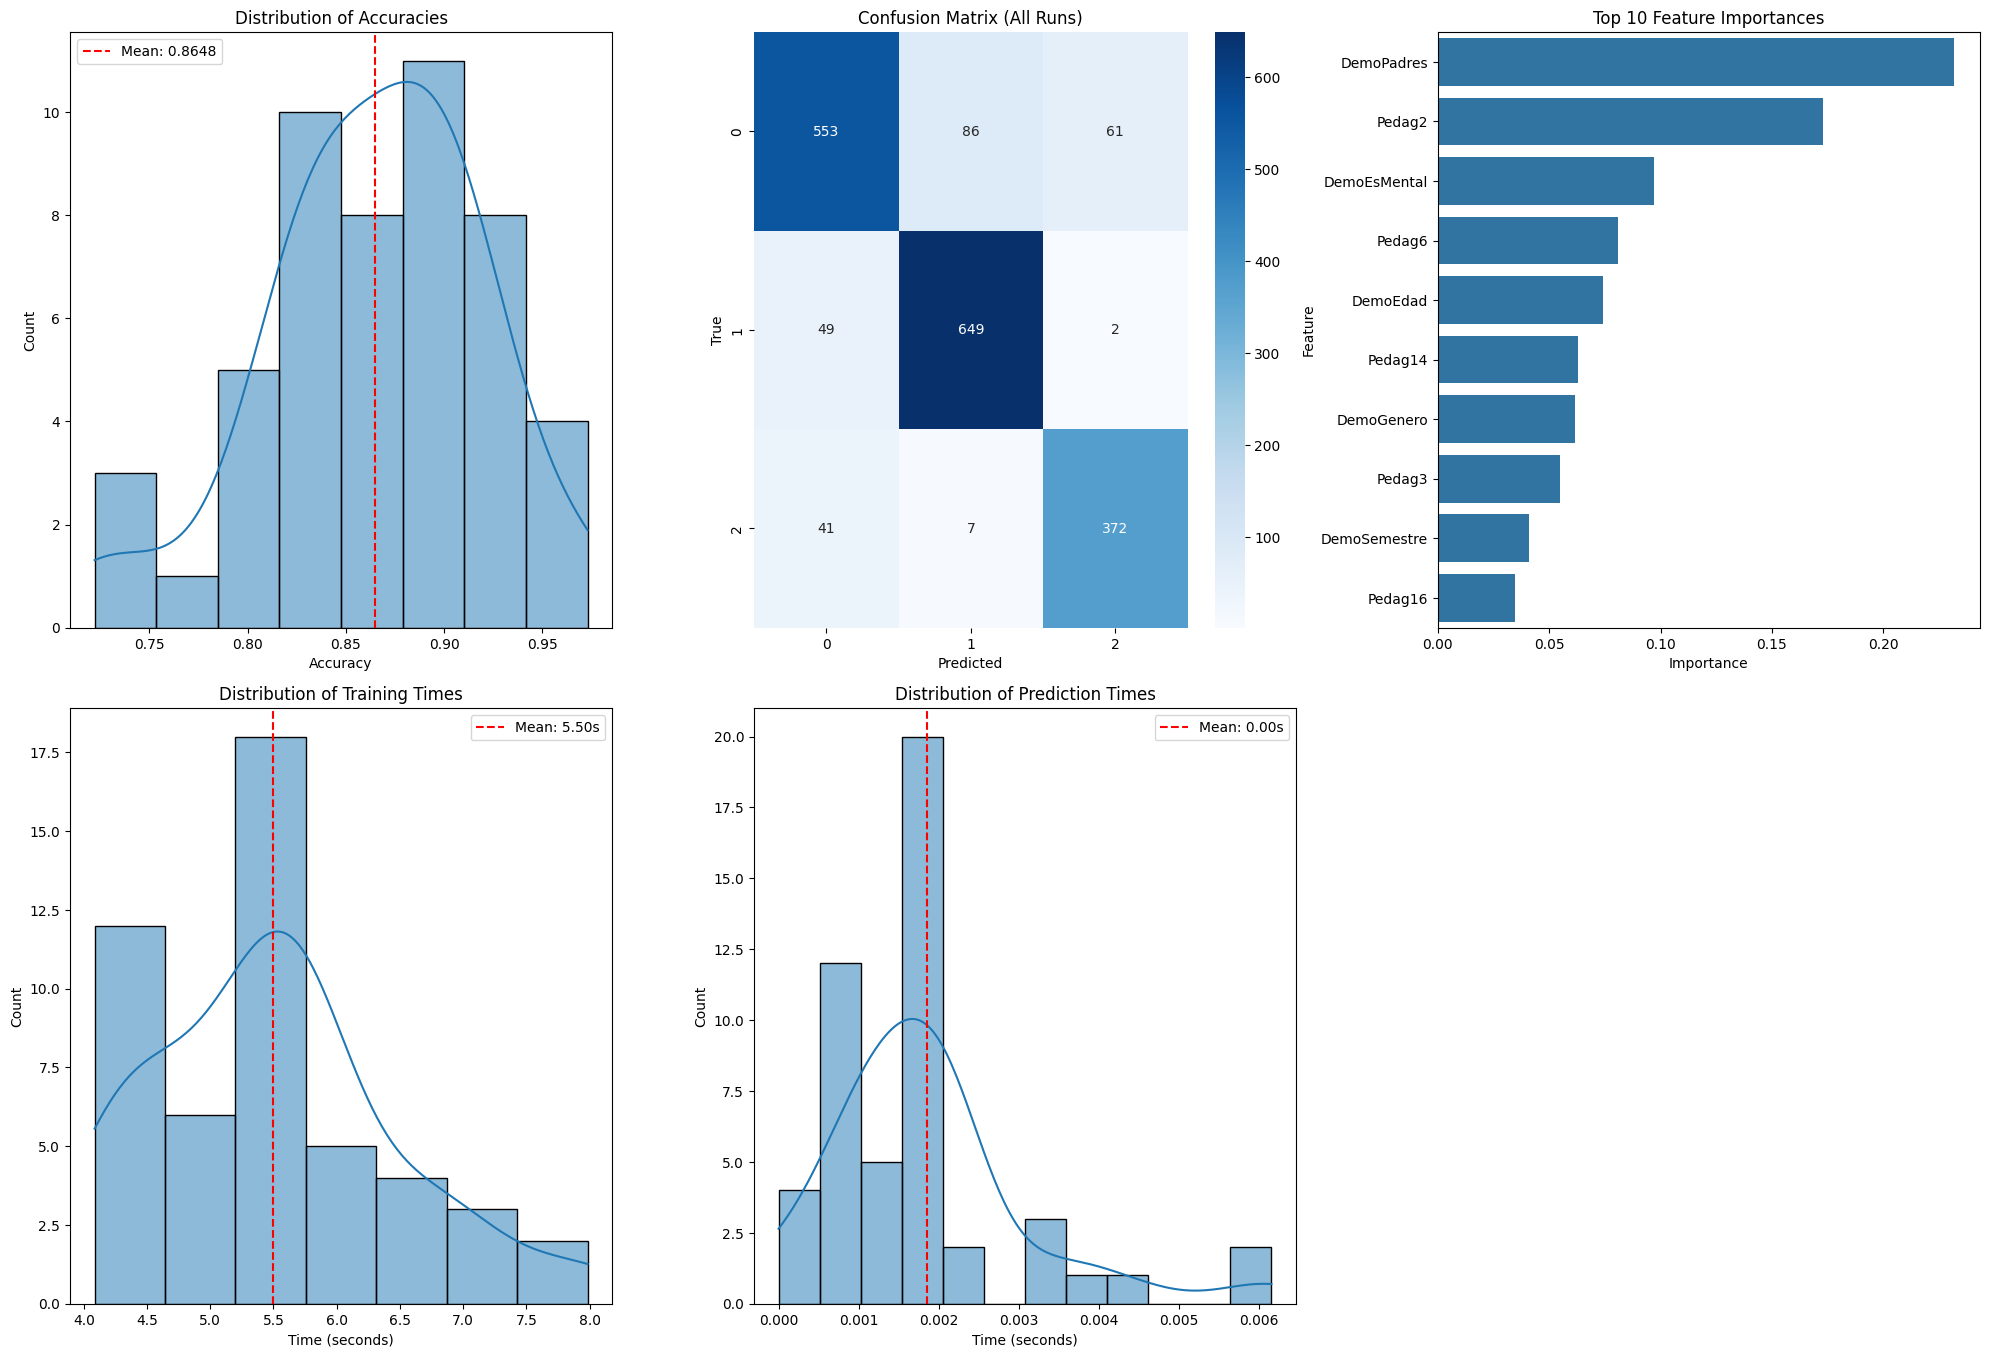


Análisis de Hiperparámetros más Frecuentes:

colsample_bytree:
0.8    37
1.0    13
Name: count, dtype: int64

learning_rate:
0.10    27
0.20    13
0.01    10
Name: count, dtype: int64

max_depth:
3    26
5    15
7     9
Name: count, dtype: int64

n_estimators:
50     26
100    13
200    11
Name: count, dtype: int64

subsample:
1.0    34
0.8    16
Name: count, dtype: int64

Resumen de Resultados:
Accuracy Media: 0.8648
Desviación Estándar: 0.0550
Intervalo de Confianza (95%): [0.7285, 0.9660]

Top 10 Características más Importantes:
         Feature  Importance       Std
4     DemoPadres    0.231800  0.044703
7         Pedag2    0.172750  0.036332
5   DemoEsMental    0.097137  0.020670
9         Pedag6    0.080923  0.030105
1       DemoEdad    0.074011  0.014357
11       Pedag14    0.062820  0.020013
2     DemoGenero    0.061484  0.014712
8         Pedag3    0.054996  0.011881
3   DemoSemestre    0.041051  0.011123
12       Pedag16    0.034546  0.013998

Reporte de Clasificación:
     

In [58]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import xgboost as xgb  
from sklearn.model_selection import GridSearchCV, RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
  
# Definir el grid de hiperparámetros  
param_grid = {  
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  
}  
  
def train_evaluate_xgb_with_hyperparams(X, y, param_grid, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo XGBoost con búsqueda de hiperparámetros  
    y validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  
      
    # Listas para almacenar resultados  
    all_results = []  
    best_params_list = []  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
    feature_importances = []  
      
    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  
          
        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  
          
        # Crear y configurar GridSearchCV  
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)  
          
        grid_search = GridSearchCV(  
            estimator=model,  
            param_grid=param_grid,  
            cv=5,  
            n_jobs=-1,  
            verbose=0,  
            scoring='accuracy'  
        )  
          
        # Entrenar  
        train_start = time.time()  
        grid_search.fit(X_train, y_train)  
        train_time = time.time() - train_start  
          
        # Predecir  
        pred_start = time.time()  
        y_pred = grid_search.predict(X_test)  
        pred_time = time.time() - pred_start  
          
        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        best_params_list.append(grid_search.best_params_)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  
        feature_importances.append(grid_search.best_estimator_.feature_importances_)  
          
        # Guardar resultados detallados  
        fold_results = {  
            'fold': fold + 1,  
            'accuracy': accuracy,  
            'training_time': train_time,  
            'prediction_time': pred_time,  
            **grid_search.best_params_  
        }  
        all_results.append(fold_results)  
          
        fold_time = time.time() - fold_start_time  
        print(f"Accuracy del fold: {accuracy:.4f}")  
        print(f"Mejores parámetros: {grid_search.best_params_}")  
        print(f"Tiempo del fold: {fold_time:.2f}s")  
      
    return (pd.DataFrame(all_results), accuracies, all_predictions, all_true_values,   
            best_params_list, training_times, prediction_times, feature_importances)  
  
def plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list,   
                training_times, prediction_times, feature_importances, feature_names=None):  
    """  
    Visualiza los resultados del análisis  
    """  
     
    fig = plt.figure(figsize=(20, 20))  
      
    # 1. Distribución de accuracies  
    plt.subplot(3, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  
      
    # 2. Matriz de confusión  
    plt.subplot(3, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  
      
    # 3. Importancia de características  
    plt.subplot(3, 3, 3)  
    mean_importances = np.mean(feature_importances, axis=0)  
    std_importances = np.std(feature_importances, axis=0)  
    if feature_names is None:  
        feature_names = [f'Feature {i}' for i in range(len(mean_importances))]  
      
    importance_df = pd.DataFrame({  
        'Feature': feature_names,  
        'Importance': mean_importances,  
        'Std': std_importances  
    }).sort_values('Importance', ascending=False)  
      
    sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')  
    plt.title('Top 10 Feature Importances')  
      
    # 4. Tiempos de entrenamiento  
    plt.subplot(3, 3, 4)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  
      
    # 5. Tiempos de predicción  
    plt.subplot(3, 3, 5)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  
      
    plt.tight_layout()  
    plt.show()  
      
    # Análisis de hiperparámetros más frecuentes  
    print("\nAnálisis de Hiperparámetros más Frecuentes:")  
    for param in best_params_list[0].keys():  
        values = [params[param] for params in best_params_list]  
        value_counts = pd.Series(values).value_counts()  
        print(f"\n{param}:")  
        print(value_counts)  
      
    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  
      
    # Top 10 características más importantes  
    print("\nTop 10 Características más Importantes:")  
    print(importance_df.head(10))  
      
    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  
  
# Ejecutar el análisis  
start_time = time.time()  
  
# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_SVMSMOTE)  
y = np.array(y_train_res_svmsmote)  
  
# Obtener nombres de características si están disponibles  
try:  
    feature_names = X_train_norm_SVMSMOTE.columns.tolist()  
except AttributeError:  
    feature_names = None  
  
# Realizar el análisis  
results = train_evaluate_xgb_with_hyperparams(X, y, param_grid, n_splits=5, n_repeats=10)  
results_df, accuracies, all_predictions, all_true_values, best_params_list, training_times, prediction_times, feature_importances = results  
  
# Visualizar resultados  
plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list,  
            training_times, prediction_times, feature_importances, feature_names)  
  
# Guardar resultados  
results_df.to_csv('xgb_hyperparameter_results_SVMSMOTE.csv', index=False)  
print("\nResultados guardados en 'xgb_hyperparameter_results_SVMSMOTE.csv'")  
  
# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 7.  GBM sin hiperparámetros


Procesando fold 1/50
Accuracy del fold: 0.9302
Tiempo del fold: 0.19s

Procesando fold 2/50
Accuracy del fold: 0.8095
Tiempo del fold: 0.17s

Procesando fold 3/50
Accuracy del fold: 0.8333
Tiempo del fold: 0.19s

Procesando fold 4/50
Accuracy del fold: 0.9286
Tiempo del fold: 0.18s

Procesando fold 5/50
Accuracy del fold: 0.8810
Tiempo del fold: 0.19s

Procesando fold 6/50
Accuracy del fold: 0.9302
Tiempo del fold: 0.18s

Procesando fold 7/50
Accuracy del fold: 0.7619
Tiempo del fold: 0.19s

Procesando fold 8/50
Accuracy del fold: 0.8333
Tiempo del fold: 0.17s

Procesando fold 9/50
Accuracy del fold: 0.9048
Tiempo del fold: 0.18s

Procesando fold 10/50
Accuracy del fold: 0.9524
Tiempo del fold: 0.20s

Procesando fold 11/50
Accuracy del fold: 0.9302
Tiempo del fold: 0.23s

Procesando fold 12/50
Accuracy del fold: 0.9524
Tiempo del fold: 0.21s

Procesando fold 13/50
Accuracy del fold: 0.8810
Tiempo del fold: 0.22s

Procesando fold 14/50
Accuracy del fold: 0.8095
Tiempo del fold: 0.18s



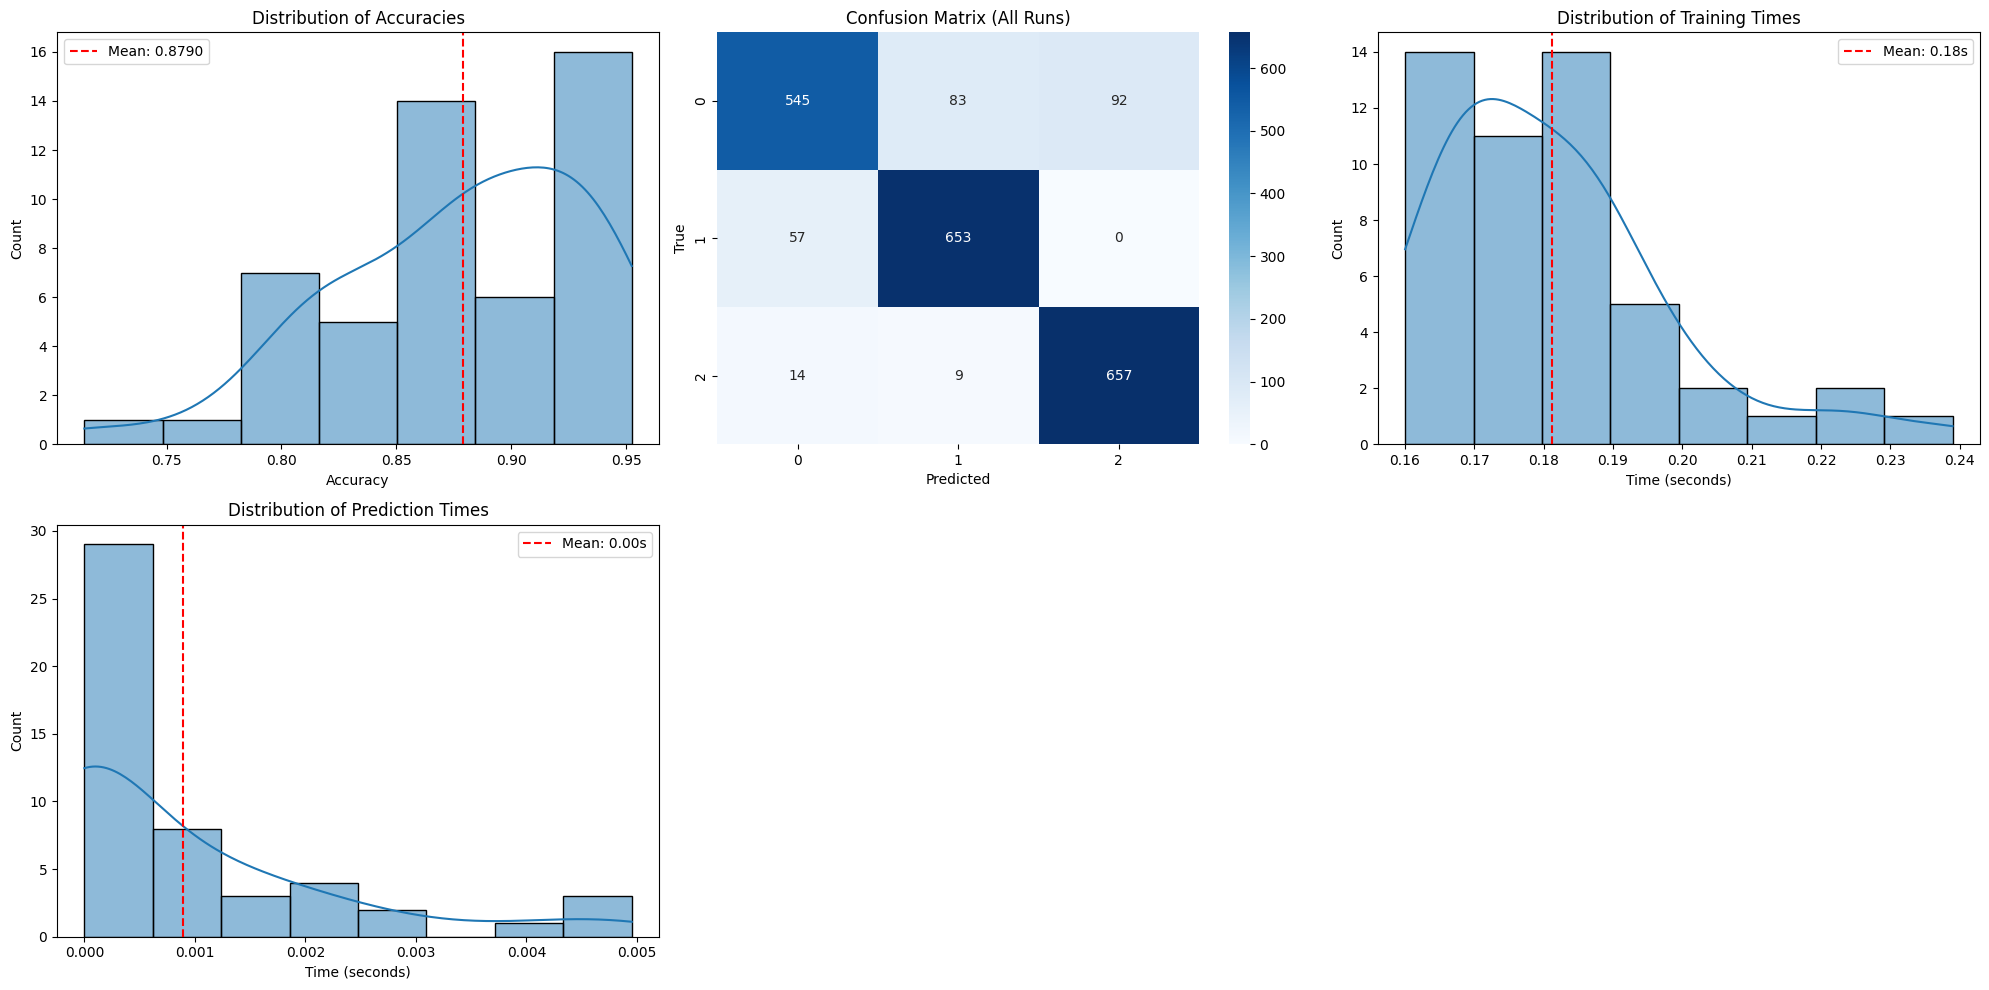


Resumen de Resultados:
Accuracy Media: 0.8790
Desviación Estándar: 0.0546
Intervalo de Confianza (95%): [0.7673, 0.9524]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       720
           1       0.88      0.92      0.90       710
           2       0.88      0.97      0.92       680

    accuracy                           0.88      2110
   macro avg       0.88      0.88      0.88      2110
weighted avg       0.88      0.88      0.88      2110


Resultados guardados en 'gbm_cv_results_adasyn.csv'

Tiempo total de ejecución: 0.16 minutos


In [62]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  

def train_evaluate_gbm(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo GradientBoostingClassifier con validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  

    # Listas para almacenar resultados  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  

    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  

        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear el modelo  
        model = GradientBoostingClassifier(random_state=42)  

        # Entrenar  
        train_start = time.time()  
        model.fit(X_train, y_train)  
        train_time = time.time() - train_start  

        # Predecir  
        pred_start = time.time()  
        y_pred = model.predict(X_test)  
        pred_time = time.time() - pred_start  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  

        fold_time = time.time() - fold_start_time  
        print(f"Accuracy del fold: {accuracy:.4f}")  
        print(f"Tiempo del fold: {fold_time:.2f}s")  

    return (accuracies, all_predictions, all_true_values, training_times, prediction_times)  

def plot_results(accuracies, all_predictions, all_true_values, training_times, prediction_times):  
    """  
    Visualiza los resultados del análisis  
    """    
    fig = plt.figure(figsize=(20, 10))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Tiempos de entrenamiento  
    plt.subplot(2, 3, 3)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    # 4. Tiempos de predicción  
    plt.subplot(2, 3, 4)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    plt.tight_layout()  
    plt.show()  

    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  

    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_ADASYN)  
y = np.array(y_train_res_Adasyn)  

# Realizar el análisis  
results = train_evaluate_gbm(X, y, n_splits=5, n_repeats=10)  
accuracies, all_predictions, all_true_values, training_times, prediction_times = results  

# Visualizar resultados  
plot_results(accuracies, all_predictions, all_true_values, training_times, prediction_times)  

# Guardar resultados  
results_df = pd.DataFrame({  
    'Fold': range(1, len(accuracies) + 1),  
    'Accuracy': accuracies,  
    'Training_Time': training_times,  
    'Prediction_Time': prediction_times  
})  
results_df.to_csv('gbm_cv_results_adasyn.csv', index=False)  
print("\nResultados guardados en 'gbm_cv_results_adasyn.csv'")  

# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 7.1.  GBM con hiperparámetros


Procesando fold 1/50
Accuracy del fold: 0.8605
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Tiempo del fold: 21.76s

Procesando fold 2/50
Accuracy del fold: 0.8333
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Tiempo del fold: 16.71s

Procesando fold 3/50
Accuracy del fold: 0.8571
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Tiempo del fold: 15.05s

Procesando fold 4/50
Accuracy del fold: 0.9524
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Tiempo del fold: 19.31s

Procesando fold 5/50
Accuracy del fold: 0.8571
Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Tiempo del fold: 24.31s

Procesando fold 6/50
Accuracy del fold: 0.8837
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Tiempo del fold: 17.06s

Procesando fold 7/50
Accuracy del fold: 0.8095
Mejores parámetros: {'learning_rate': 0.2,

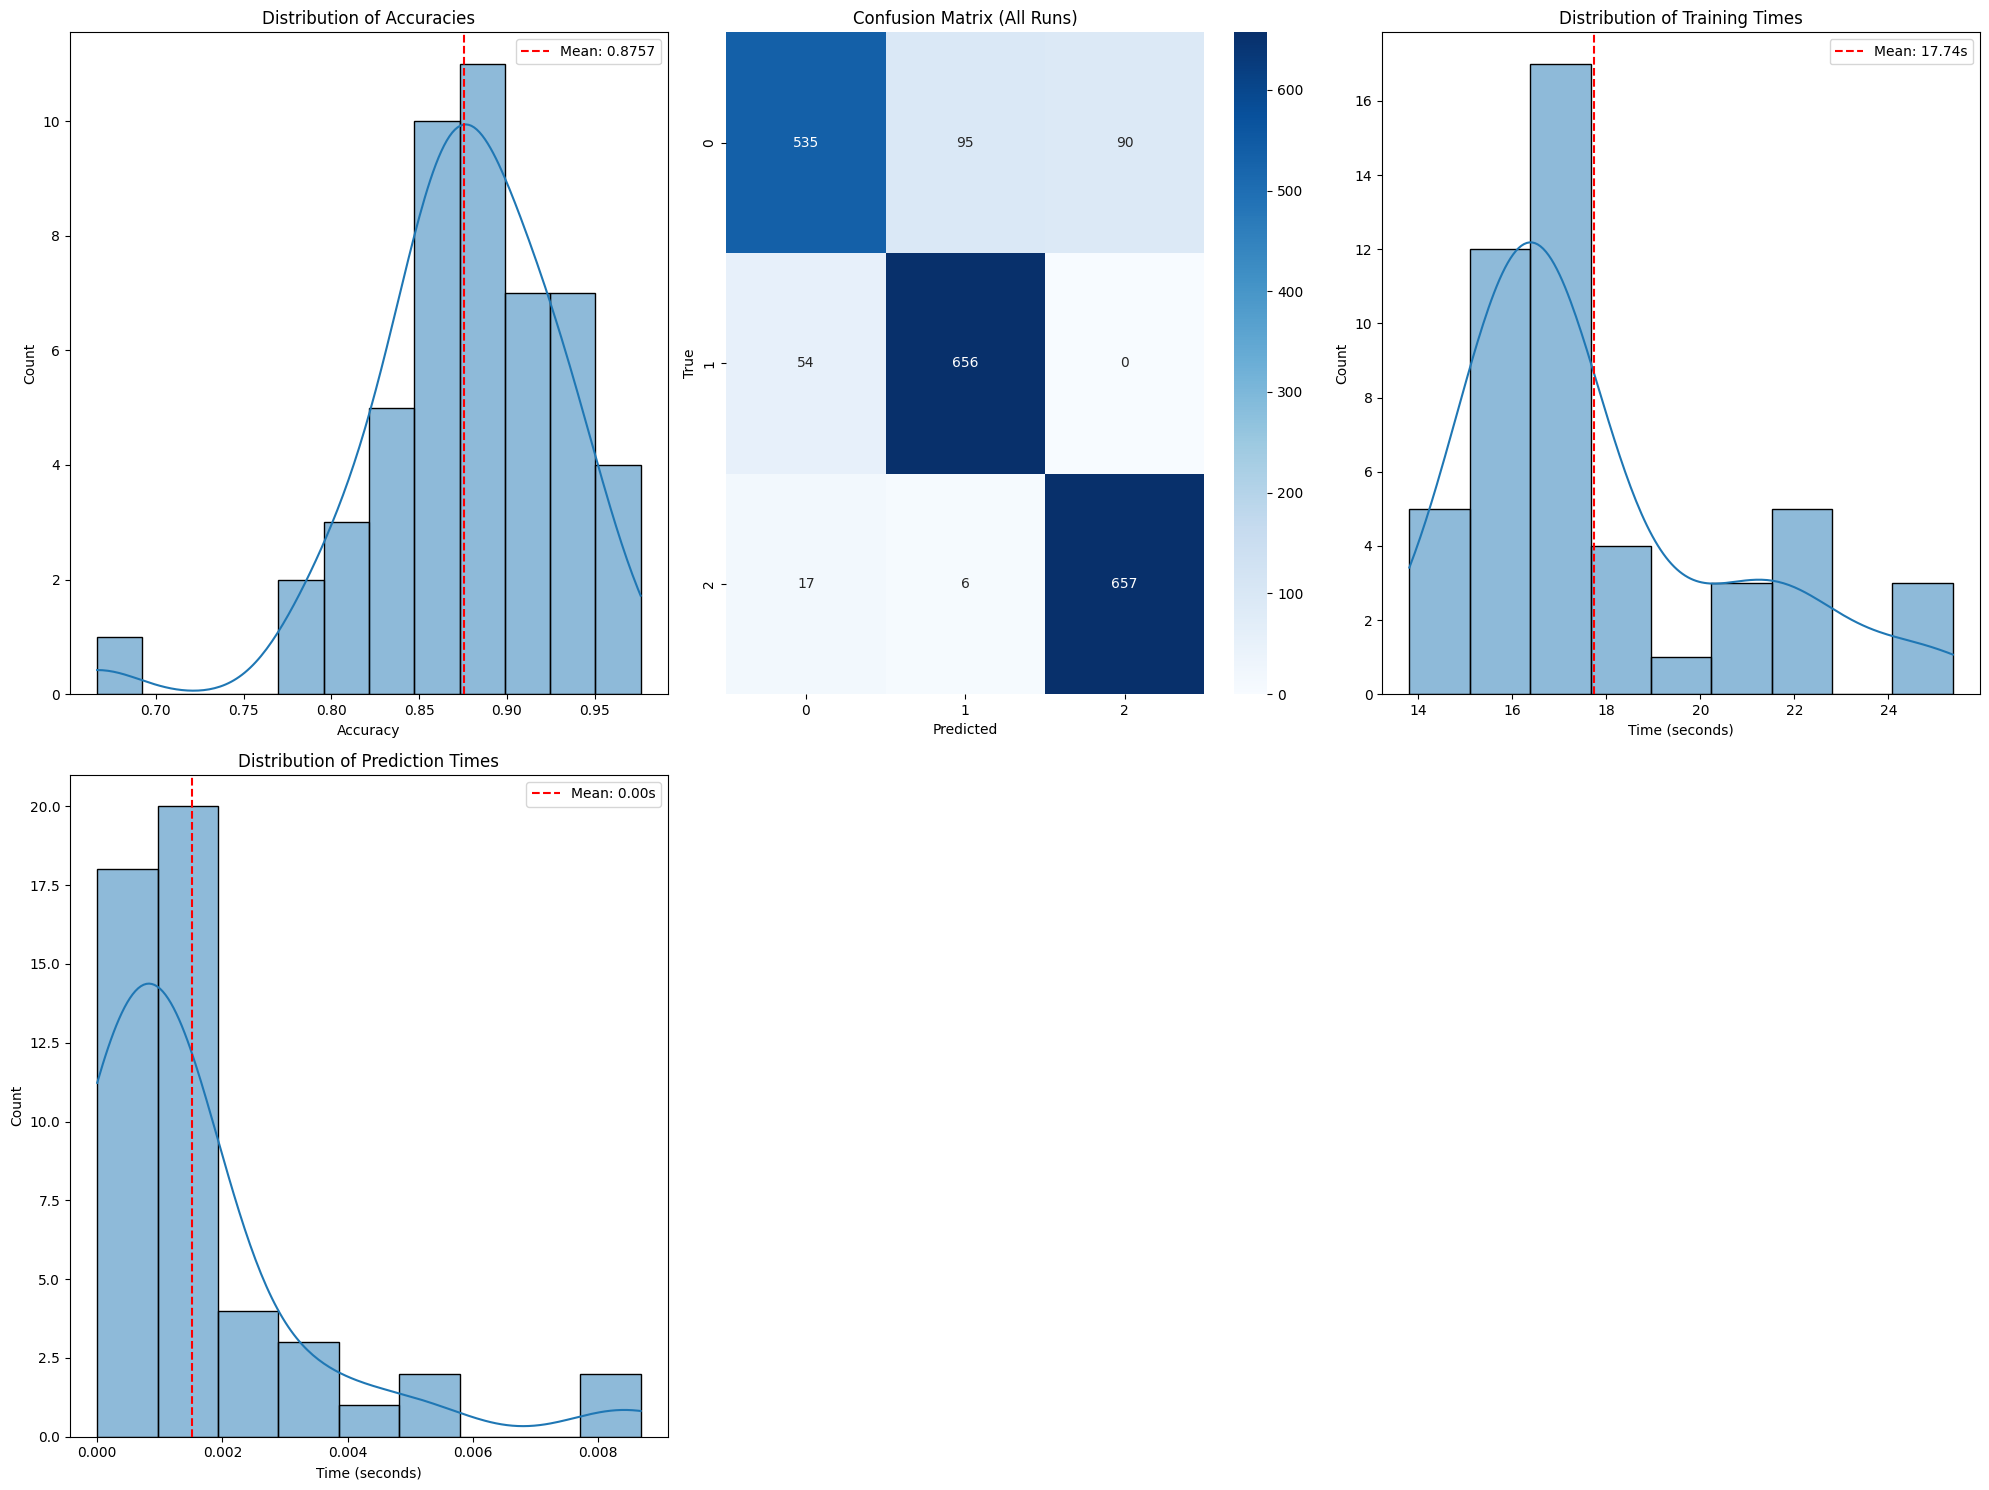


Análisis de Hiperparámetros más Frecuentes:

learning_rate:
0.10    26
0.20    16
0.01     8
Name: count, dtype: int64

max_depth:
3    25
5    19
7     6
Name: count, dtype: int64

n_estimators:
50     19
200    18
100    13
Name: count, dtype: int64

Resumen de Resultados:
Accuracy Media: 0.8757
Desviación Estándar: 0.0528
Intervalo de Confianza (95%): [0.7857, 0.9524]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       720
           1       0.87      0.92      0.89       710
           2       0.88      0.97      0.92       680

    accuracy                           0.88      2110
   macro avg       0.88      0.88      0.87      2110
weighted avg       0.88      0.88      0.87      2110


Resultados guardados en 'gbm_hyperparameter_results_adasyn.csv'

Tiempo total de ejecución: 14.80 minutos


In [63]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV, RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  

# Definir el grid de hiperparámetros  
param_grid = {  
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7]
}  

def train_evaluate_gbm_with_hyperparams(X, y, param_grid, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo GradientBoostingClassifier con búsqueda de hiperparámetros  
    y validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  

    # Listas para almacenar resultados  
    all_results = []  
    best_params_list = []  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  

    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  

        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear y configurar GridSearchCV  
        model = GradientBoostingClassifier(random_state=42)  

        grid_search = GridSearchCV(  
            estimator=model,  
            param_grid=param_grid,  
            cv=5,  
            n_jobs=-1,  
            verbose=0,  
            scoring='accuracy'  
        )  

        # Entrenar  
        train_start = time.time()  
        grid_search.fit(X_train, y_train)  
        train_time = time.time() - train_start  

        # Predecir  
        pred_start = time.time()  
        y_pred = grid_search.predict(X_test)  
        pred_time = time.time() - pred_start  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        best_params_list.append(grid_search.best_params_)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  

        # Guardar resultados detallados  
        fold_results = {  
            'fold': fold + 1,  
            'accuracy': accuracy,  
            'training_time': train_time,  
            'prediction_time': pred_time,  
            **grid_search.best_params_  
        }  
        all_results.append(fold_results)  

        fold_time = time.time() - fold_start_time  
        print(f"Accuracy del fold: {accuracy:.4f}")  
        print(f"Mejores parámetros: {grid_search.best_params_}")  
        print(f"Tiempo del fold: {fold_time:.2f}s")  

    return (pd.DataFrame(all_results), accuracies, all_predictions, all_true_values,   
            best_params_list, training_times, prediction_times)  

def plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list,   
                training_times, prediction_times):  
    """  
    Visualiza los resultados del análisis  
    """   
    fig = plt.figure(figsize=(20, 15))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Tiempos de entrenamiento  
    plt.subplot(2, 3, 3)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    # 4. Tiempos de predicción  
    plt.subplot(2, 3, 4)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    plt.tight_layout()  
    plt.show()  

    # Análisis de hiperparámetros más frecuentes  
    print("\nAnálisis de Hiperparámetros más Frecuentes:")  
    for param in best_params_list[0].keys():  
        values = [params[param] for params in best_params_list]  
        value_counts = pd.Series(values).value_counts()  
        print(f"\n{param}:")  
        print(value_counts)  

    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  

    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_ADASYN)  
y = np.array(y_train_res_Adasyn)  

# Realizar el análisis  
results = train_evaluate_gbm_with_hyperparams(X, y, param_grid, n_splits=5, n_repeats=10)  
results_df, accuracies, all_predictions, all_true_values, best_params_list, training_times, prediction_times = results  

# Visualizar resultados  
plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list,  
            training_times, prediction_times)  

# Guardar resultados  
results_df.to_csv('gbm_hyperparameter_results_adasyn.csv', index=False)  
print("\nResultados guardados en 'gbm_hyperparameter_results_adasyn.csv'")  

# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 8. Redes Neuronales sin hiperparámetros


Procesando fold 1/50
Accuracy del fold: 0.8605
Tiempo del fold: 0.17s

Procesando fold 2/50
Accuracy del fold: 0.8810
Tiempo del fold: 0.19s

Procesando fold 3/50
Accuracy del fold: 0.7381
Tiempo del fold: 0.19s

Procesando fold 4/50
Accuracy del fold: 0.8095
Tiempo del fold: 0.18s

Procesando fold 5/50
Accuracy del fold: 0.9048
Tiempo del fold: 0.19s

Procesando fold 6/50
Accuracy del fold: 0.9302
Tiempo del fold: 0.18s

Procesando fold 7/50
Accuracy del fold: 0.7381
Tiempo del fold: 0.19s

Procesando fold 8/50
Accuracy del fold: 0.8333
Tiempo del fold: 0.18s

Procesando fold 9/50
Accuracy del fold: 0.8333
Tiempo del fold: 0.19s

Procesando fold 10/50
Accuracy del fold: 0.9048
Tiempo del fold: 0.17s

Procesando fold 11/50
Accuracy del fold: 0.8837
Tiempo del fold: 0.18s

Procesando fold 12/50
Accuracy del fold: 0.8571
Tiempo del fold: 0.17s

Procesando fold 13/50
Accuracy del fold: 0.8571
Tiempo del fold: 0.19s

Procesando fold 14/50
Accuracy del fold: 0.8571
Tiempo del fold: 0.18s



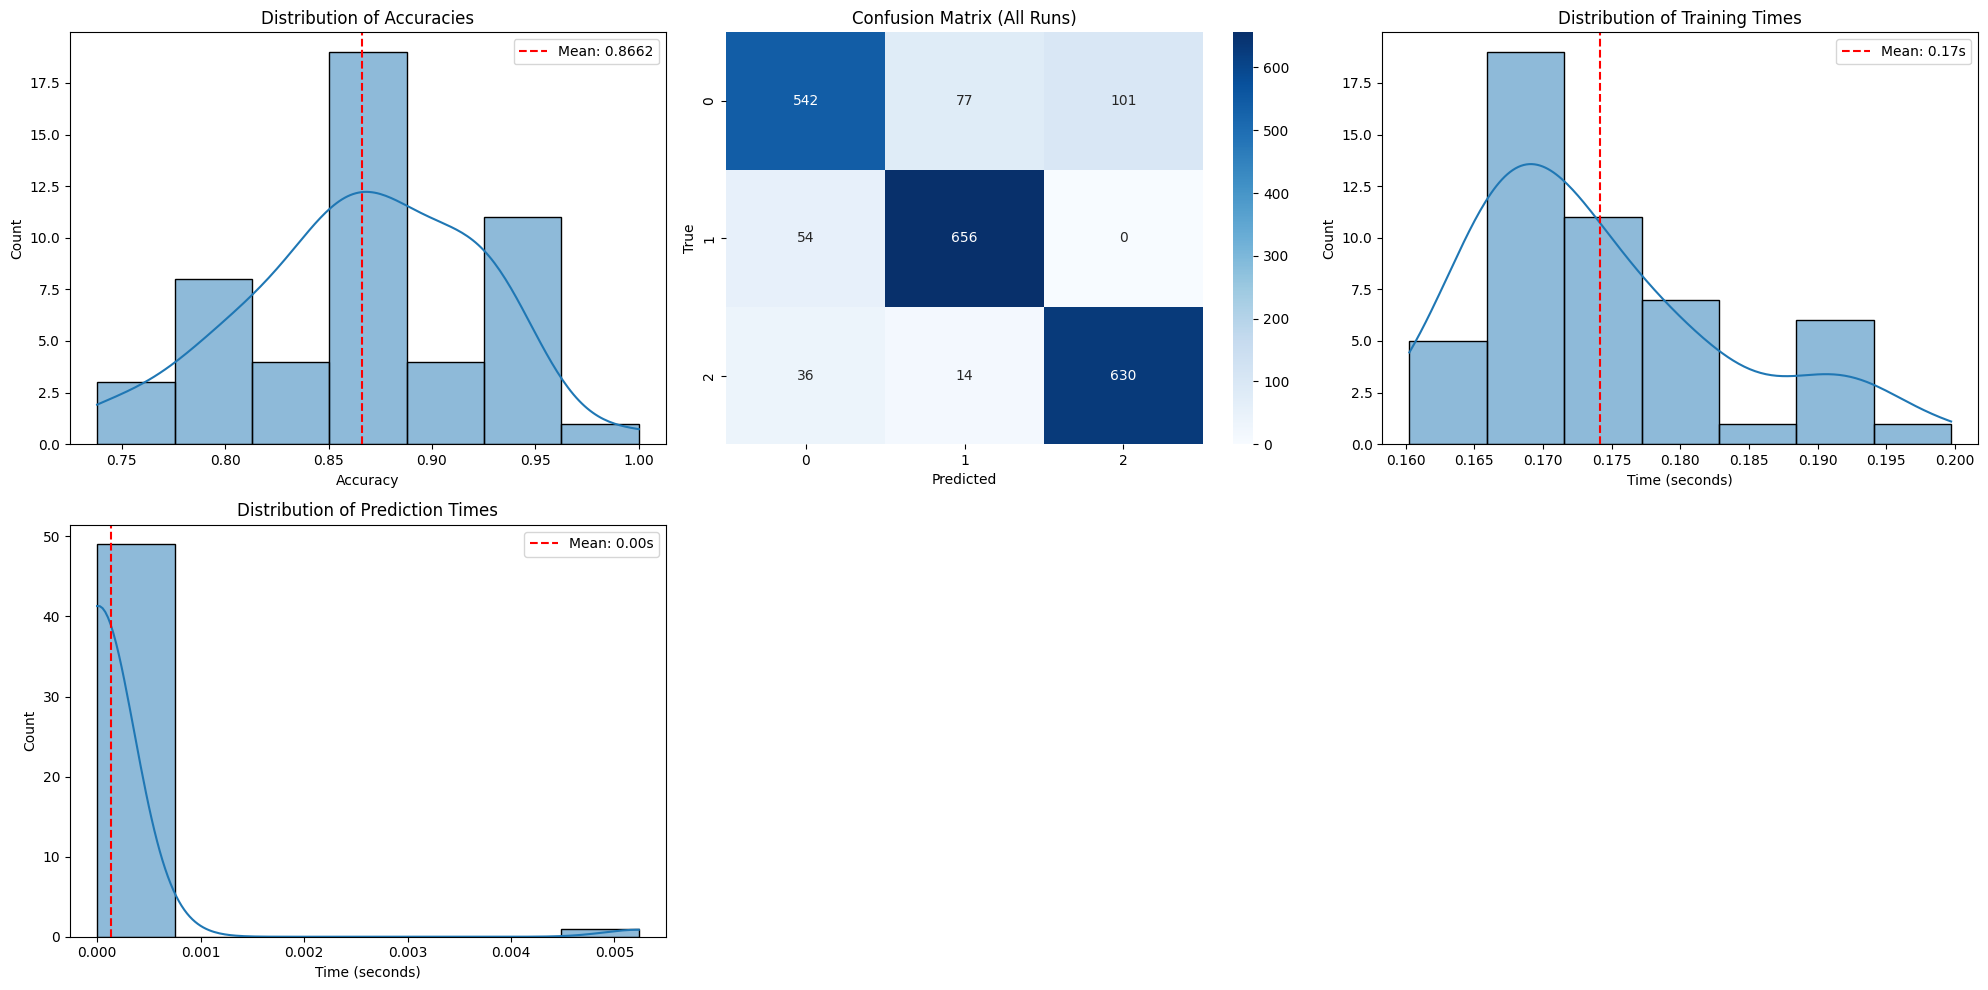


Resumen de Resultados:
Accuracy Media: 0.8662
Desviación Estándar: 0.0555
Intervalo de Confianza (95%): [0.7435, 0.9302]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       720
           1       0.88      0.92      0.90       710
           2       0.86      0.93      0.89       680

    accuracy                           0.87      2110
   macro avg       0.87      0.87      0.87      2110
weighted avg       0.87      0.87      0.86      2110


Resultados guardados en 'mlp_cv_results_adasyn.csv'

Tiempo total de ejecución: 0.15 minutos


In [64]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  
  
def train_evaluate_mlp(X, y, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo MLPClassifier con validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  
      
    # Listas para almacenar resultados  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  
      
    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  
          
        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  
          
        # Crear el modelo  
        model = MLPClassifier(random_state=42, max_iter=500)  
          
        # Entrenar  
        train_start = time.time()  
        model.fit(X_train, y_train)  
        train_time = time.time() - train_start  
          
        # Predecir  
        pred_start = time.time()  
        y_pred = model.predict(X_test)  
        pred_time = time.time() - pred_start  
          
        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  
          
        fold_time = time.time() - fold_start_time  
        print(f"Accuracy del fold: {accuracy:.4f}")  
        print(f"Tiempo del fold: {fold_time:.2f}s")  
      
    return (accuracies, all_predictions, all_true_values, training_times, prediction_times)  
  
def plot_results(accuracies, all_predictions, all_true_values, training_times, prediction_times):  
    """  
    Visualiza los resultados del análisis  
    """  
     
    fig = plt.figure(figsize=(20, 10))  
      
    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  
      
    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  
      
    # 3. Tiempos de entrenamiento  
    plt.subplot(2, 3, 3)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  
      
    # 4. Tiempos de predicción  
    plt.subplot(2, 3, 4)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  
      
    plt.tight_layout()  
    plt.show()  
      
    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  
      
    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  
  
# Ejecutar el análisis  
start_time = time.time()  
  
# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_ADASYN)  
y = np.array(y_train_res_Adasyn)  
  
# Realizar el análisis  
results = train_evaluate_mlp(X, y, n_splits=5, n_repeats=10)  
accuracies, all_predictions, all_true_values, training_times, prediction_times = results  
  
# Visualizar resultados  
plot_results(accuracies, all_predictions, all_true_values, training_times, prediction_times)  
  
# Guardar resultados  
results_df = pd.DataFrame({  
    'Fold': range(1, len(accuracies) + 1),  
    'Accuracy': accuracies,  
    'Training_Time': training_times,  
    'Prediction_Time': prediction_times  
})  
results_df.to_csv('mlp_cv_results_adasyn.csv', index=False)  
print("\nResultados guardados en 'mlp_cv_results_adasyn.csv'")  
  
# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  

### 8.1. Redes Neuronales con hiperparámetros


Procesando fold 1/50
Accuracy del fold: 0.6744
Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Tiempo del fold: 5.13s

Procesando fold 2/50
Accuracy del fold: 0.6905
Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Tiempo del fold: 2.20s

Procesando fold 3/50
Accuracy del fold: 0.6190
Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Tiempo del fold: 2.30s

Procesando fold 4/50
Accuracy del fold: 0.7143
Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Tiempo del fold: 2.14s

Procesando fold 5/50
Accuracy del fold: 0.8095
Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 5

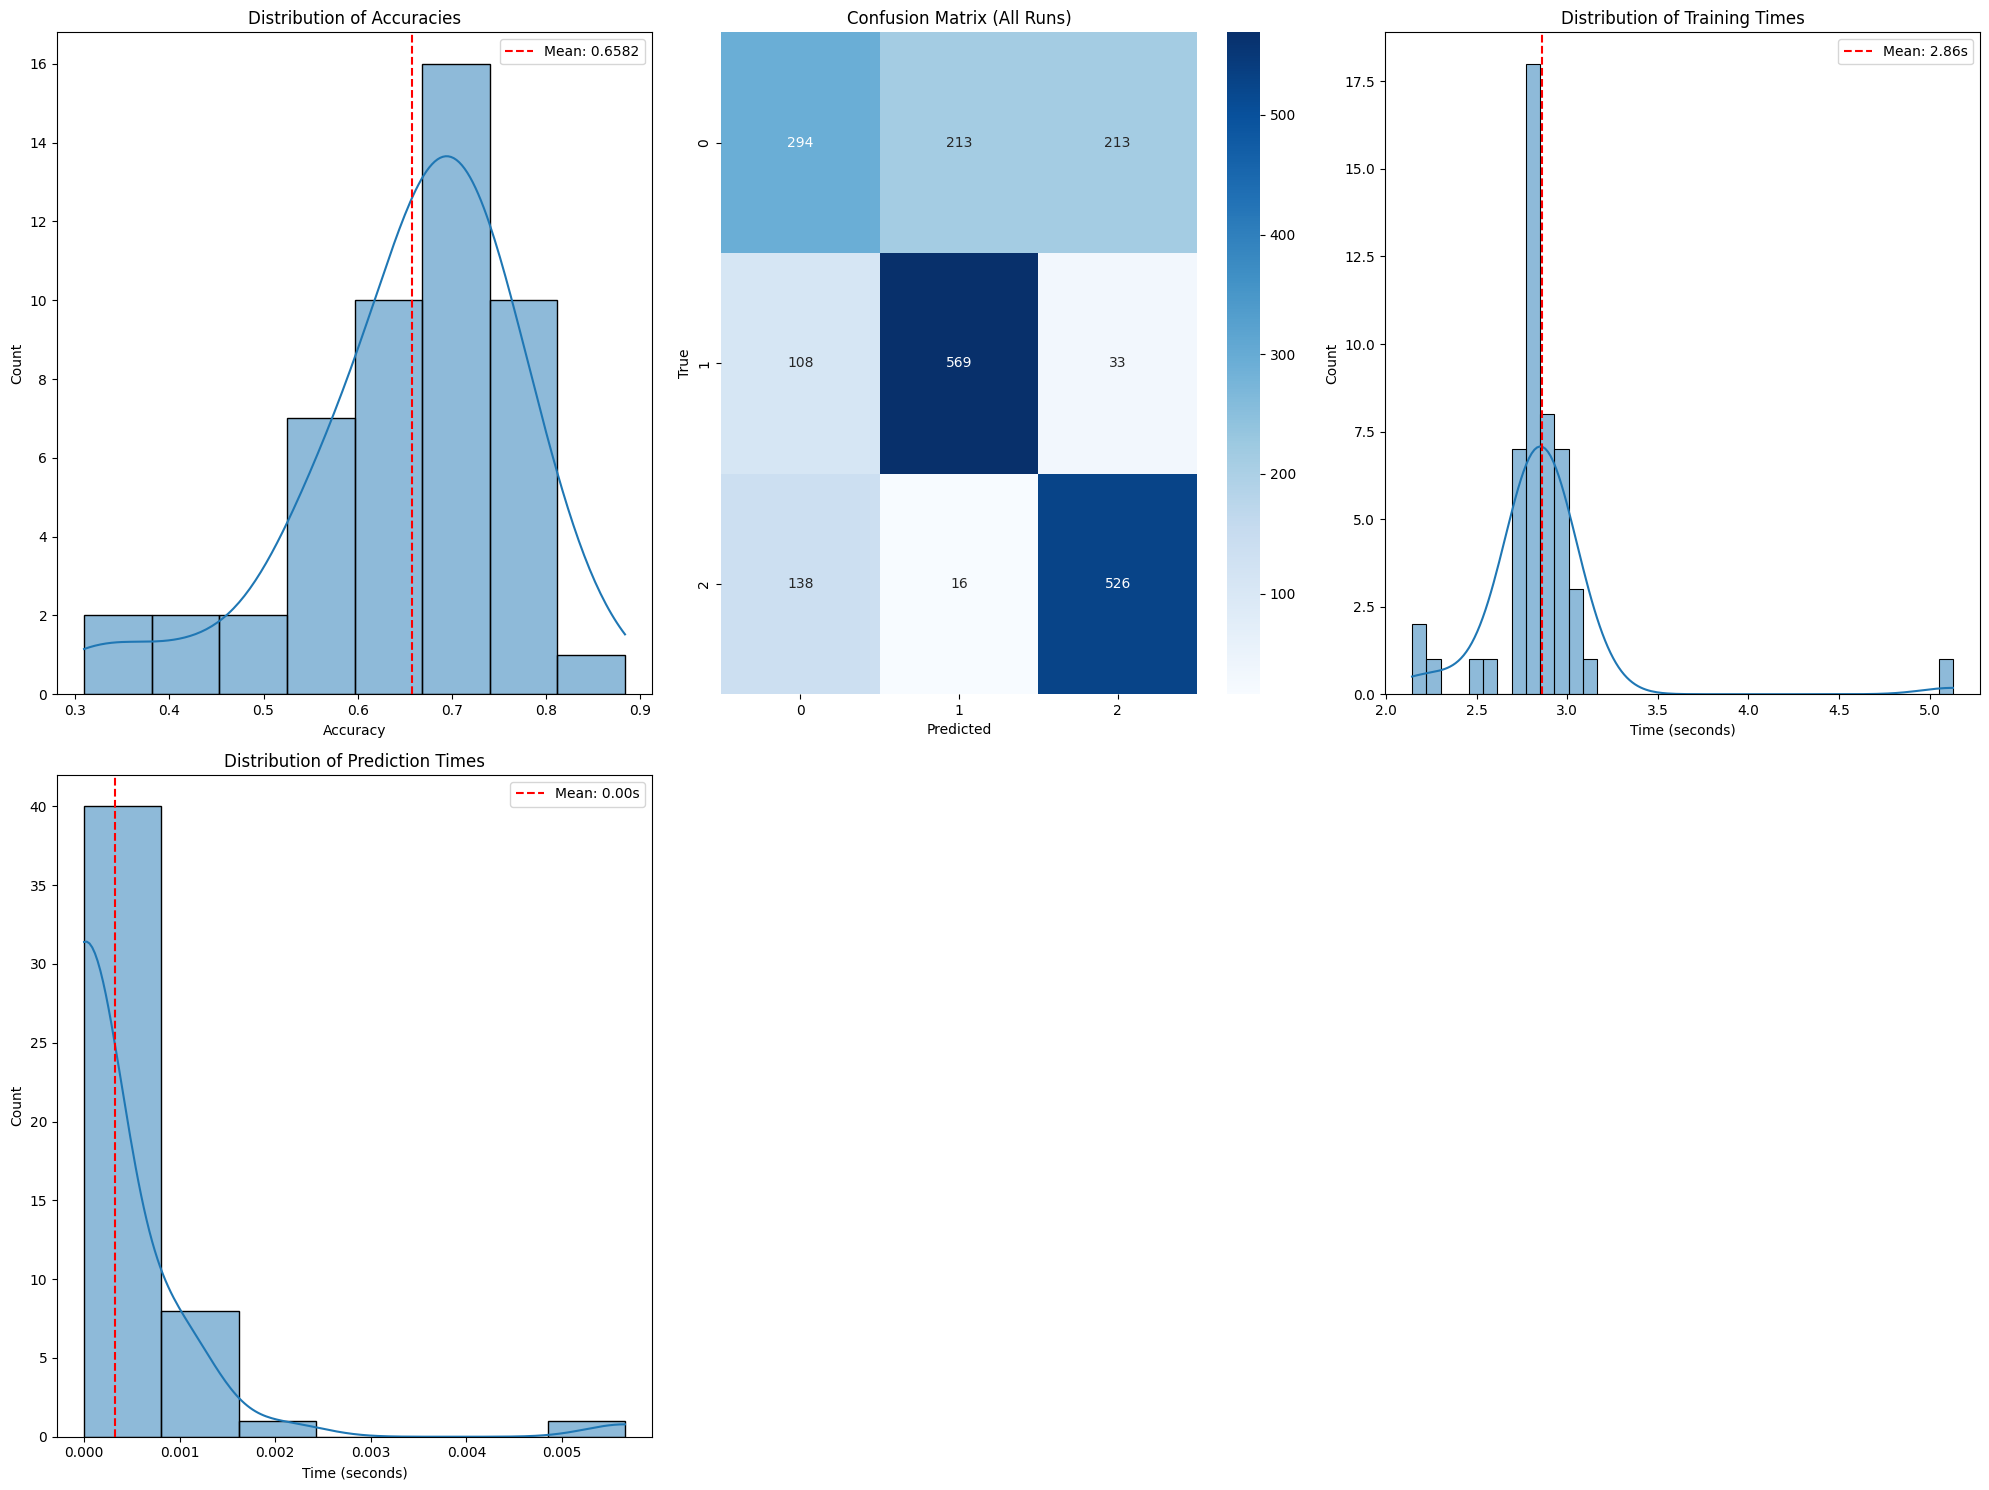


Análisis de Hiperparámetros más Frecuentes:

activation:
tanh    39
relu    11
Name: count, dtype: int64

alpha:
0.0001    42
0.0500     8
Name: count, dtype: int64

hidden_layer_sizes:
(50, 100, 50)    35
(50, 50, 50)     15
Name: count, dtype: int64

learning_rate:
constant    50
Name: count, dtype: int64

solver:
adam    50
Name: count, dtype: int64

Resumen de Resultados:
Accuracy Media: 0.6582
Desviación Estándar: 0.1155
Intervalo de Confianza (95%): [0.3494, 0.8095]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.54      0.41      0.47       720
           1       0.71      0.80      0.75       710
           2       0.68      0.77      0.72       680

    accuracy                           0.66      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.65      0.66      0.65      2110


Resultados guardados en 'mlp_hyperparameter_results_adasyn.csv'

Tiempo total de ejecución: 2.40 minutos


In [65]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import GridSearchCV, RepeatedKFold  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import time  

# Definir el grid de hiperparámetros  
param_grid = {  
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],  
    'activation': ['tanh', 'relu'],  
    'solver': ['sgd', 'adam'],  
    'alpha': [0.0001, 0.05],  
    'learning_rate': ['constant', 'adaptive'],  
}  

def train_evaluate_mlp_with_hyperparams(X, y, param_grid, n_splits=5, n_repeats=10):  
    """  
    Entrena y evalúa el modelo MLPClassifier con búsqueda de hiperparámetros  
    y validación cruzada repetida  
    """  
    # Configurar la validación cruzada repetida  
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)  

    # Listas para almacenar resultados  
    all_results = []  
    best_params_list = []  
    accuracies = []  
    all_predictions = []  
    all_true_values = []  
    training_times = []  
    prediction_times = []  

    # Para cada fold  
    for fold, (train_index, test_index) in enumerate(rkf.split(X)):  
        fold_start_time = time.time()  
        print(f"\nProcesando fold {fold+1}/{n_splits*n_repeats}")  

        # Dividir datos  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  

        # Crear y configurar GridSearchCV  
        model = MLPClassifier(random_state=42, early_stopping=True, max_iter=500)  

        grid_search = GridSearchCV(  
            estimator=model,  
            param_grid=param_grid,  
            cv=5,  
            n_jobs=-1,  
            verbose=0,  
            scoring='accuracy'  
        )  

        # Entrenar  
        train_start = time.time()  
        grid_search.fit(X_train, y_train)  
        train_time = time.time() - train_start  

        # Predecir  
        pred_start = time.time()  
        y_pred = grid_search.predict(X_test)  
        pred_time = time.time() - pred_start  

        # Guardar resultados  
        accuracy = accuracy_score(y_test, y_pred)  
        accuracies.append(accuracy)  
        all_predictions.extend(y_pred)  
        all_true_values.extend(y_test)  
        best_params_list.append(grid_search.best_params_)  
        training_times.append(train_time)  
        prediction_times.append(pred_time)  

        # Guardar resultados detallados  
        fold_results = {  
            'fold': fold + 1,  
            'accuracy': accuracy,  
            'training_time': train_time,  
            'prediction_time': pred_time,  
            **grid_search.best_params_  
        }  
        all_results.append(fold_results)  

        fold_time = time.time() - fold_start_time  
        print(f"Accuracy del fold: {accuracy:.4f}")  
        print(f"Mejores parámetros: {grid_search.best_params_}")  
        print(f"Tiempo del fold: {fold_time:.2f}s")  

    return (pd.DataFrame(all_results), accuracies, all_predictions, all_true_values,   
            best_params_list, training_times, prediction_times)  

def plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list,   
                training_times, prediction_times):  
    """  
    Visualiza los resultados del análisis  
    """   
    fig = plt.figure(figsize=(20, 15))  

    # 1. Distribución de accuracies  
    plt.subplot(2, 3, 1)  
    sns.histplot(accuracies, kde=True)  
    plt.axvline(np.mean(accuracies), color='r', linestyle='--',  
                label=f'Mean: {np.mean(accuracies):.4f}')  
    plt.title('Distribution of Accuracies')  
    plt.xlabel('Accuracy')  
    plt.ylabel('Count')  
    plt.legend()  

    # 2. Matriz de confusión  
    plt.subplot(2, 3, 2)  
    cm = confusion_matrix(all_true_values, all_predictions)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
    plt.title('Confusion Matrix (All Runs)')  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  

    # 3. Tiempos de entrenamiento  
    plt.subplot(2, 3, 3)  
    sns.histplot(training_times, kde=True)  
    plt.axvline(np.mean(training_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(training_times):.2f}s')  
    plt.title('Distribution of Training Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    # 4. Tiempos de predicción  
    plt.subplot(2, 3, 4)  
    sns.histplot(prediction_times, kde=True)  
    plt.axvline(np.mean(prediction_times), color='r', linestyle='--',  
                label=f'Mean: {np.mean(prediction_times):.2f}s')  
    plt.title('Distribution of Prediction Times')  
    plt.xlabel('Time (seconds)')  
    plt.ylabel('Count')  
    plt.legend()  

    plt.tight_layout()  
    plt.show()  

    # Análisis de hiperparámetros más frecuentes  
    print("\nAnálisis de Hiperparámetros más Frecuentes:")  
    for param in best_params_list[0].keys():  
        values = [params[param] for params in best_params_list]  
        value_counts = pd.Series(values).value_counts()  
        print(f"\n{param}:")  
        print(value_counts)  

    # Estadísticas resumidas  
    print("\nResumen de Resultados:")  
    print(f"Accuracy Media: {np.mean(accuracies):.4f}")  
    print(f"Desviación Estándar: {np.std(accuracies):.4f}")  
    print(f"Intervalo de Confianza (95%): [{np.percentile(accuracies, 2.5):.4f}, "  
          f"{np.percentile(accuracies, 97.5):.4f}]")  

    # Reporte de clasificación  
    print("\nReporte de Clasificación:")  
    print(classification_report(all_true_values, all_predictions))  

# Ejecutar el análisis  
start_time = time.time()  

# Convertir datos a numpy arrays si no lo están ya  
X = np.array(X_train_norm_ADASYN)  
y = np.array(y_train_res_Adasyn)  

# Realizar el análisis  
results = train_evaluate_mlp_with_hyperparams(X, y, param_grid, n_splits=5, n_repeats=10)  
results_df, accuracies, all_predictions, all_true_values, best_params_list, training_times, prediction_times = results  

# Visualizar resultados  
plot_results(results_df, accuracies, all_predictions, all_true_values, best_params_list,  
            training_times, prediction_times)  

# Guardar resultados  
results_df.to_csv('mlp_hyperparameter_results_adasyn.csv', index=False)  
print("\nResultados guardados en 'mlp_hyperparameter_results_adasyn.csv'")  

# Tiempo total de ejecución  
execution_time = time.time() - start_time  
print(f"\nTiempo total de ejecución: {execution_time/60:.2f} minutos")  